## <font color=blue>Importing Libraries </font>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.gridspec as gridspec
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report, ConfusionMatrixDisplay

## <font color=blue>Loading and diplaying Data  </font>

In [2]:
df = pd.read_csv('bcw_data.csv')

In [3]:
with open('bcw_data.csv','r') as file:
    x=file.readline()
x

'"id","diagnosis","radius_mean","texture_mean","perimeter_mean","area_mean","smoothness_mean","compactness_mean","concavity_mean","concave points_mean","symmetry_mean","fractal_dimension_mean","radius_se","texture_se","perimeter_se","area_se","smoothness_se","compactness_se","concavity_se","concave points_se","symmetry_se","fractal_dimension_se","radius_worst","texture_worst","perimeter_worst","area_worst","smoothness_worst","compactness_worst","concavity_worst","concave points_worst","symmetry_worst","fractal_dimension_worst",\n'

In [4]:
df

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0    ...          17.33           184.60      2019.0           0.16220   
1    ...          23.41           158.80      1956.0           0.12380   
2    ...          25.53           152.50      1709.0           0.14440   
3    ...          26.50            98.87       567.7           0.20980   
4    ...          16.67           152.20      1575.0           0.13740   
..   ...            ...              ...         ...               ...   
564  ...          26.40           166.10      2027.0           0.14100   
565  ...          38.25           155.00      1731.0           0.11660   
566  ...          34.12           126.70      1124.0           0.11390   
567  ...          39.42           184.60      1821.0           0.16500   
568  ...          30.37            59.16       268.6           0.08996   

     compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0              0.66560           0.7119                0.2654          0.4601   
1              0.18660           0.2416                0.1860          0.2750   
2              0.42450           0.4504                0.2430          0.3613   
3              0.86630           0.6869                0.2575          0.6638   
4              0.20500           0.4000                0.1625          0.2364   
..                 ...              ...                   ...             ...   
564            0.21130           0.4107                0.2216          0.2060   
565            0.19220           0.3215                0.1628          0.2572   
566            0.30940           0.3403                0.1418          0.2218   
567            0.86810           0.9387                0.2650          0.4087   
568            0.06444           0.0000                0.0000          0.2871   

     fractal_dimension_worst  Unnamed: 32  
0                    0.11890          NaN  
1                    0.08902          NaN  
2                    0.08758          NaN  
3                    0.17300          NaN  
4      

In [4]:
df = df.drop(columns=['Unnamed: 32'])

In [6]:
df

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0    ...        25.380          17.33           184.60      2019.0   
1    ...        24.990          23.41           158.80      1956.0   
2    ...        23.570          25.53           152.50      1709.0   
3    ...        14.910          26.50            98.87       567.7   
4    ...        22.540          16.67           152.20      1575.0   
..   ...           ...            ...              ...         ...   
564  ...        25.450          26.40           166.10      2027.0   
565  ...        23.690          38.25           155.00      1731.0   
566  ...        18.980          34.12           126.70      1124.0   
567  ...        25.740          39.42           184.60      1821.0   
568  ...         9.456          30.37            59.16       268.6   

     smoothness_worst  compactness_worst  concavity_worst  \
0             0.16220            0.66560           0.7119   
1             0.12380            0.18660           0.2416   
2             0.14440            0.42450           0.4504   
3             0.20980            0.86630           0.6869   
4             0.13740            0.20500           0.4000   
..                ...                ...              ...   
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    ...             ...                      ...  
564                0.2216       

## <font color=blue> Data Understanding and Preparation </font>

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [8]:
df.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
count     569.000000  ...    569.000000     569.000000       569.000000   
mean        0.181162  ...     16.269190      25.677223       107.261213   
std         0.027414  ...      4.833242       6.146258        33.602542   
min         0.106000  ...      7.930000      12.020000        50.410000   
25%         0.161900  ...     13.010000      21.080000        84.110000   
50%         0.179200  ...     14.970000      25.410000        97.660000   
75%         0.195700  ...     18.790000      29.720000       125.400000   
max         0.304000  ...     36.040000      49.540000       251.200000   

        area_worst  smoothness_worst  compactness_worst  concavity_worst  \
count   569.000000        569.000000         569.000000       569.000000   
mean    880.583128          0.132369           0.254265         0.272188   
std     569.356993          0.022832           0.157336         0.208624   
min     185.200000          0.071170           0.027290         0.000000   
25%     515.300000          0.116600           0.147200         0.114500   
50%     686.500000          0.131300           0.211900         0.226700   
75%    1084.000000          0.146000           0.339100         0.382900   
max    4254.000000          0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  
count            569.000000      569.000000               569.000000  
mean               0.114606        0.290076                 0.083946  
std                0.065732        0.061867                 0.018061  
min                0.000000        0.156500                 0.055040  
25%                0.064930        0.250400                 0.071460  
50%                0.099930        0.282200                 0.080040  
75%                0.161400        0.317900                 0.092080  
max                0.291000        0.663800                 0.207500  

[8 rows x 31 columns]

In [9]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [10]:
df.isnull().sum()#checking for null values

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [5]:
df.duplicated().sum()#checking for duplicated values

np.int64(0)

In [6]:
df = df.drop(columns=['id'])

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(20, 20))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Add title
plt.title('Correlation Map')

# Show the plot
plt.show()

ValueError: could not convert string to float: 'M'

In [8]:


# Get pairs of features with correlation values
high_corr_pairs = correlation_matrix.unstack().reset_index()
high_corr_pairs.columns = ['FeatureX', 'FeatureY', 'Correlation']

# Filter for correlations > 0.9, including 1.0, but exclude self-correlations
high_corr_pairs = high_corr_pairs[(high_corr_pairs['Correlation'] > 0.9)]
high_corr_pairs = high_corr_pairs[high_corr_pairs['FeatureX'] != high_corr_pairs['FeatureY']]

# Drop duplicate pairs (keep unique pairs like (FeatureX, FeatureY) and remove (FeatureY, FeatureX))
high_corr_pairs['Pair'] = high_corr_pairs.apply(lambda row: tuple(sorted([row['FeatureX'], row['FeatureY']])), axis=1)
high_corr_pairs = high_corr_pairs.drop_duplicates(subset='Pair').drop(columns='Pair')

# Print the result
print(high_corr_pairs)


NameError: name 'correlation_matrix' is not defined

In [ ]:
len(high_corr_pairs)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Number of plots
num_plots = len(high_corr_pairs)

# Calculate the number of rows and columns for the subplots
cols = 3  # You can change this to any number of columns you prefer
rows = math.ceil(num_plots / cols)

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 5))
axes = axes.flatten()  # Flatten to iterate easily

# Iterate over the rows of high_corr_pairs and plot each one in a subplot
for i, (_, row) in enumerate(high_corr_pairs.iterrows()):
    xx = row['FeatureX']
    yy = row['FeatureY']
    
    sns.scatterplot(data=df, x=xx, y=yy, ax=axes[i])
    axes[i].set_title(f'Scatter Plot: {xx} vs {yy}')
    axes[i].set_xlabel(xx)
    axes[i].set_ylabel(yy)

# Remove any unused subplots
for i in range(num_plots, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


## <font color=blue> Data Transformation </font>

In [10]:
from sklearn.preprocessing import LabelEncoder



le = LabelEncoder()
df_encoded=df.copy()

df_encoded['diagnosis'] = le.fit_transform(df_encoded['diagnosis'])

In [11]:
df_encoded.describe()

diagnosis  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  569.000000   569.000000    569.000000      569.000000   569.000000   
mean     0.372583    14.127292     19.289649       91.969033   654.889104   
std      0.483918     3.524049      4.301036       24.298981   351.914129   
min      0.000000     6.981000      9.710000       43.790000   143.500000   
25%      0.000000    11.700000     16.170000       75.170000   420.300000   
50%      0.000000    13.370000     18.840000       86.240000   551.100000   
75%      1.000000    15.780000     21.800000      104.100000   782.700000   
max      1.000000    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
count     569.000000  ...    569.000000     569.000000       569.000000   
mean        0.181162  ...     16.269190      25.677223       107.261213   
std         0.027414  ...      4.833242       6.146258        33.602542   
min         0.106000  ...      7.930000      12.020000        50.410000   
25%         0.161900  ...     13.010000      21.080000        84.110000   
50%         0.179200  ...     14.970000      25.410000        97.660000   
75%         0.195700  ...     18.790000      29.720000       125.400000   
max         0.304000  ...     36.040000      49.540000       251.200000   

        area_worst  smoothness_worst  compactness_worst  concavity_worst  \
count   569.000000        569.000000         569.000000       569.000000   
mean    880.583128          0.132369           0.254265         0.272188   
std     569.356993          0.022832           0.157336         0.208624   
min     185.200000          0.071170           0.027290         0.000000   
25%     515.300000          0.116600           0.147200         0.114500   
50%     686.500000          0.131300           0.211900         0.226700   
75%    1084.000000          0.146000           0.339100         0.382900   
max    4254.000000          0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  
count            569.000000      569.000000               569.000000  
mean               0.114606        0.290076                 0.083946  
std                0.065732        0.061867                 0.018061  
min                0.000000        0.156500                 0.055040  
25%                0.064930        0.250400                 0.071460  
50%                0.099930        0.282200                 0.080040  
75%                0.161400        0.317900                 0.092080  
max                0.291000        0.663800                 0.207500  

[8 rows x 31 columns]

In [17]:
df_encoded

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0            1        17.99         10.38          122.80     1001.0   
1            1        20.57         17.77          132.90     1326.0   
2            1        19.69         21.25          130.00     1203.0   
3            1        11.42         20.38           77.58      386.1   
4            1        20.29         14.34          135.10     1297.0   
..         ...          ...           ...             ...        ...   
564          1        21.56         22.39          142.00     1479.0   
565          1        20.13         28.25          131.20     1261.0   
566          1        16.60         28.08          108.30      858.1   
567          1        20.60         29.33          140.10     1265.0   
568          0         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0           0.2419  ...        25.380          17.33           184.60   
1           0.1812  ...        24.990          23.41           158.80   
2           0.2069  ...        23.570          25.53           152.50   
3           0.2597  ...        14.910          26.50            98.87   
4           0.1809  ...        22.540          16.67           152.20   
..             ...  ...           ...            ...              ...   
564         0.1726  ...        25.450          26.40           166.10   
565         0.1752  ...        23.690          38.25           155.00   
566         0.1590  ...        18.980          34.12           126.70   
567         0.2397  ...        25.740          39.42           184.60   
568         0.1587  ...         9.456          30.37            59.16   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0        2019.0           0.16220            0.66560           0.7119   
1        1956.0           0.12380            0.18660           0.2416   
2        1709.0           0.14440            0.42450           0.4504   
3         567.7           0.20980            0.86630           0.6869   
4        1575.0           0.13740            0.20500           0.4000   
..          ...               ...                ...              ...   
564      2027.0           0.14100            0.21130           0.4107   
565      1731.0           0.11660            0.19220           0.3215   
566      1124.0           0.11390            0.30940           0.3403   
567      1821.0           0.16500            0.86810           0.9387   
568       268.6           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    .

In [12]:
df_n=df_encoded.copy()

In [13]:
# # apply the min-max scaling
def min_max_scaling(df_n):

    df_norm = df_n.copy()
    for column in df_norm.columns[0:32]:
        df_norm[column] = (df_norm[column] - df_norm[column].min()) / (df_norm[column].max() - df_norm[column].min())
    return df_norm
df_normalized = min_max_scaling(df_n)

df_normalized

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1.0     0.521037      0.022658        0.545989   0.363733   
1          1.0     0.643144      0.272574        0.615783   0.501591   
2          1.0     0.601496      0.390260        0.595743   0.449417   
3          1.0     0.210090      0.360839        0.233501   0.102906   
4          1.0     0.629893      0.156578        0.630986   0.489290   
..         ...          ...           ...             ...        ...   
564        1.0     0.690000      0.428813        0.678668   0.566490   
565        1.0     0.622320      0.626987        0.604036   0.474019   
566        1.0     0.455251      0.621238        0.445788   0.303118   
567        1.0     0.644564      0.663510        0.665538   0.475716   
568        0.0     0.036869      0.501522        0.028540   0.015907   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0           0.593753          0.792037        0.703140             0.731113   
1           0.289880          0.181768        0.203608             0.348757   
2           0.514309          0.431017        0.462512             0.635686   
3           0.811321          0.811361        0.565604             0.522863   
4           0.430351          0.347893        0.463918             0.518390   
..               ...               ...             ...                  ...   
564         0.526948          0.296055        0.571462             0.690358   
565         0.407782          0.257714        0.337395             0.486630   
566         0.288165          0.254340        0.216753             0.263519   
567         0.588336          0.790197        0.823336             0.755467   
568         0.000000          0.074351        0.000000             0.000000   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.686364  ...      0.620776       0.141525         0.668310   
1         0.379798  ...      0.606901       0.303571         0.539818   
2         0.509596  ...      0.556386       0.360075         0.508442   
3         0.776263  ...      0.248310       0.385928         0.241347   
4         0.378283  ...      0.519744       0.123934         0.506948   
..             ...  ...           ...            ...              ...   
564       0.336364  ...      0.623266       0.383262         0.576174   
565       0.349495  ...      0.560655       0.699094         0.520892   
566       0.267677  ...      0.393099       0.589019         0.379949   
567       0.675253  ...      0.633582       0.730277         0.668310   
568       0.266162  ...      0.054287       0.489072         0.043578   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      0.450698          0.601136           0.619292         0.568610   
1      0.435214          0.347553           0.154563         0.192971   
2      0.374508          0.483590           0.385375         0.359744   
3      0.094008          0.915472           0.814012         0.548642   
4      0.341575          0.437364           0.172415         0.319489   
..          ...               ...                ...              ...   
564    0.452664          0.461137           0.178527         0.328035   
565    0.379915          0.300007           0.159997         0.256789   
566    0.230731          0.282177           0.273705         0.271805   
567    0.402035          0.619626           0.815758         0.749760   
568    0.020497          0.124084           0.036043         0.000000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.912027        0.598462                 0.418864  
1                0.639175        0.233590                 0.222878  
2                0.835052        0.403706                 0.213433  
3                0.884880        1.000000                 0.773711  
4                0.558419        0.157500                 0.142595  
..                    .

In [20]:
df_normalized.describe()

diagnosis  radius_mean  texture_mean  perimeter_mean   area_mean  \
count  569.000000   569.000000    569.000000      569.000000  569.000000   
mean     0.372583     0.338222      0.323965        0.332935    0.216920   
std      0.483918     0.166787      0.145453        0.167915    0.149274   
min      0.000000     0.000000      0.000000        0.000000    0.000000   
25%      0.000000     0.223342      0.218465        0.216847    0.117413   
50%      0.000000     0.302381      0.308759        0.293345    0.172895   
75%      1.000000     0.416442      0.408860        0.416765    0.271135   
max      1.000000     1.000000      1.000000        1.000000    1.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.394785          0.260601        0.208058             0.243137   
std           0.126967          0.161992        0.186785             0.192857   
min           0.000000          0.000000        0.000000             0.000000   
25%           0.304595          0.139685        0.069260             0.100944   
50%           0.390358          0.224679        0.144189             0.166501   
75%           0.475490          0.340531        0.306232             0.367793   
max           1.000000          1.000000        1.000000             1.000000   

       symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
count     569.000000  ...    569.000000     569.000000       569.000000   
mean        0.379605  ...      0.296663       0.363998         0.283138   
std         0.138456  ...      0.171940       0.163813         0.167352   
min         0.000000  ...      0.000000       0.000000         0.000000   
25%         0.282323  ...      0.180719       0.241471         0.167837   
50%         0.369697  ...      0.250445       0.356876         0.235320   
75%         0.453030  ...      0.386339       0.471748         0.373475   
max         1.000000  ...      1.000000       1.000000         1.000000   

       area_worst  smoothness_worst  compactness_worst  concavity_worst  \
count  569.000000        569.000000         569.000000       569.000000   
mean     0.170906          0.404138           0.220212         0.217403   
std      0.139932          0.150779           0.152649         0.166633   
min      0.000000          0.000000           0.000000         0.000000   
25%      0.081130          0.300007           0.116337         0.091454   
50%      0.123206          0.397081           0.179110         0.181070   
75%      0.220901          0.494156           0.302520         0.305831   
max      1.000000          1.000000           1.000000         1.000000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  
count            569.000000      569.000000               569.000000  
mean               0.393836        0.263307                 0.189596  
std                0.225884        0.121954                 0.118466  
min                0.000000        0.000000                 0.000000  
25%                0.223127        0.185098                 0.107700  
50%                0.343402        0.247782                 0.163977  
75%                0.554639        0.318155                 0.242949  
max                1.000000        1.000000                 1.000000  

[8 rows x 31 columns]

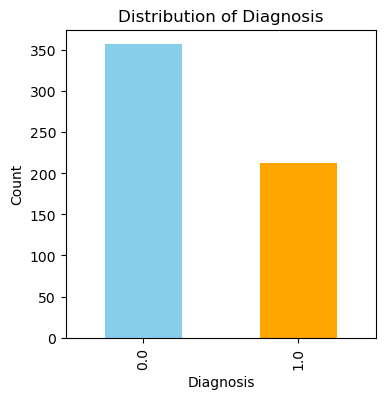

In [29]:
counts = df_normalized['diagnosis'].value_counts()

# Plot
colors = ['skyblue', 'orange', 'green', 'red']
plt.figure(figsize=(4, 4))
counts.plot(kind='bar',color=colors)
plt.title('Distribution of Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

In [22]:
def plotting_3_chart(df_normalized, feature):
    style.use('fivethirtyeight')
    fig = plt.figure(constrained_layout=True, figsize=(15,10))
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)

    ax1 = fig.add_subplot(grid[0, :2])
    ax1.set_title('Histogram')
    sns.distplot(df_normalized.loc[:,feature], norm_hist=True, ax = ax1)

    ax2 = fig.add_subplot(grid[1, :2])

    ax2.set_title('QQ_plot')
    stats.probplot(df_normalized.loc[:,feature], plot = ax2)

    ax3 = fig.add_subplot(grid[:, 2])
    ax3.set_title('Box Plot')
    sns.boxplot(df_normalized.loc[:,feature], orient='v', ax = ax3 );

In [15]:
dataset= df_normalized.copy()

## <font color=blue>Distribution visualisation </font>


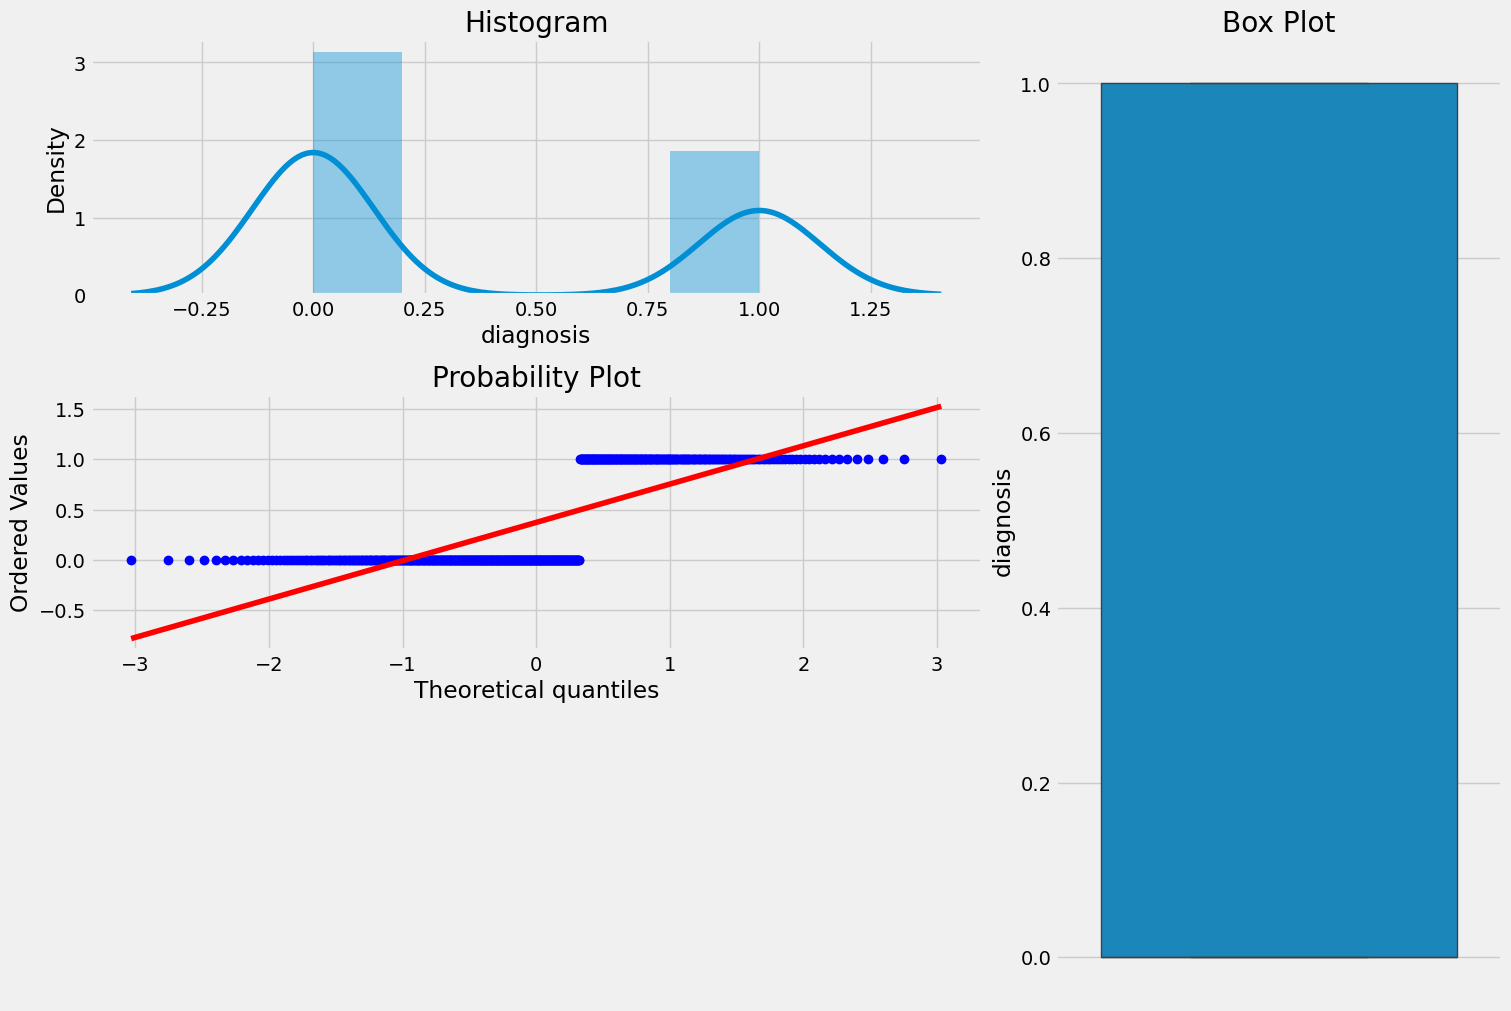

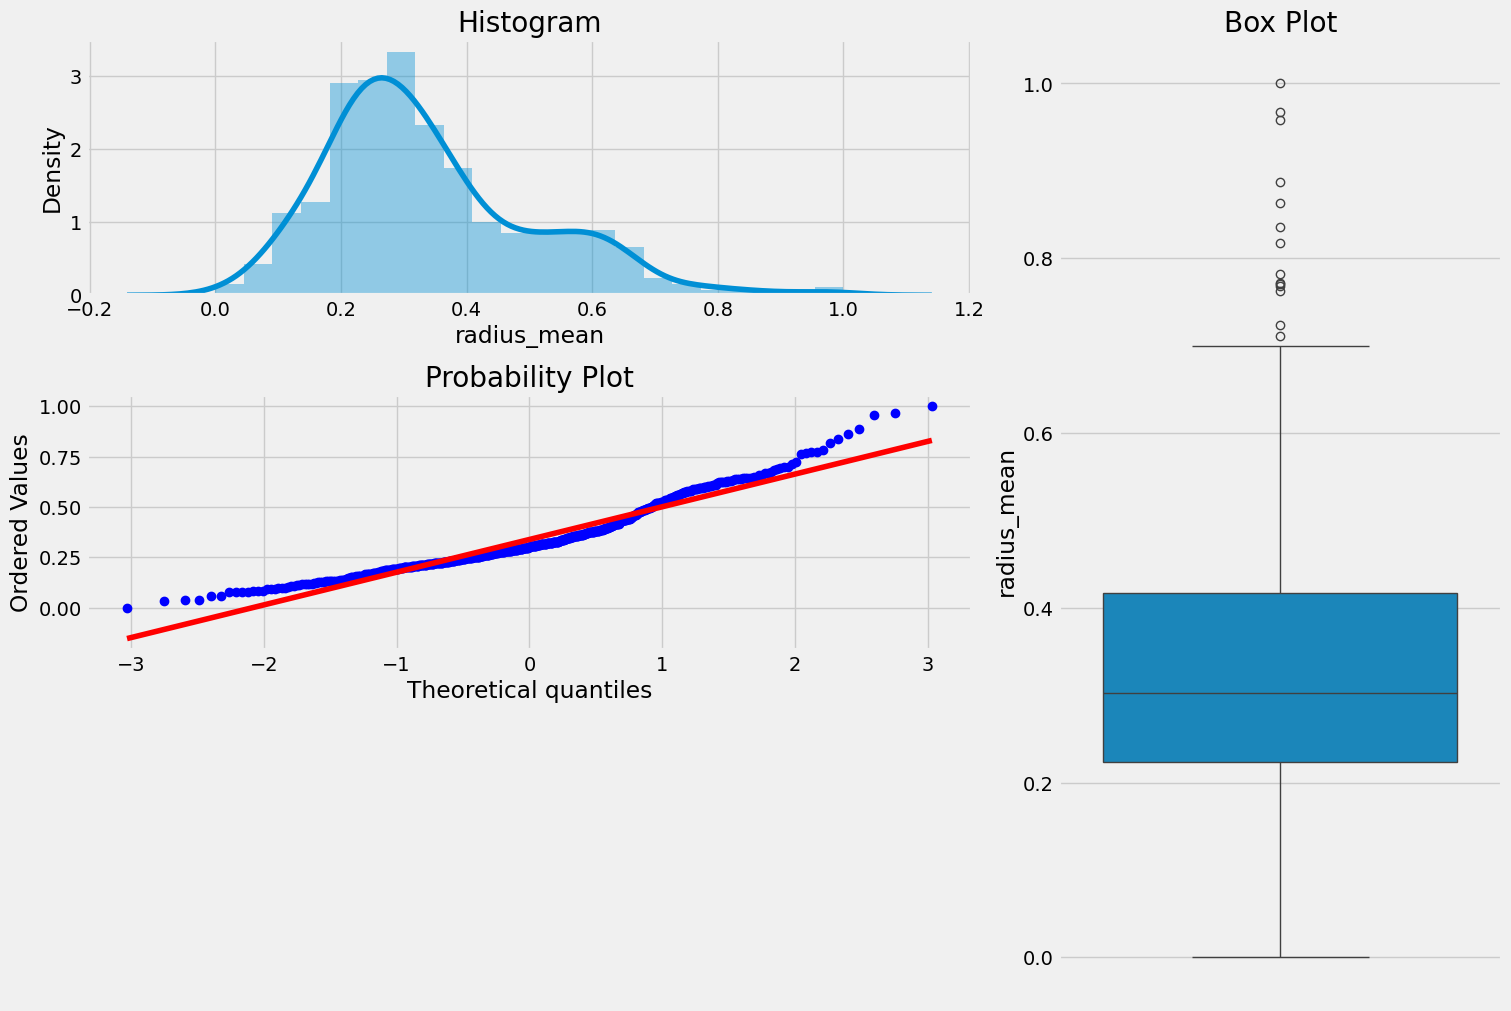

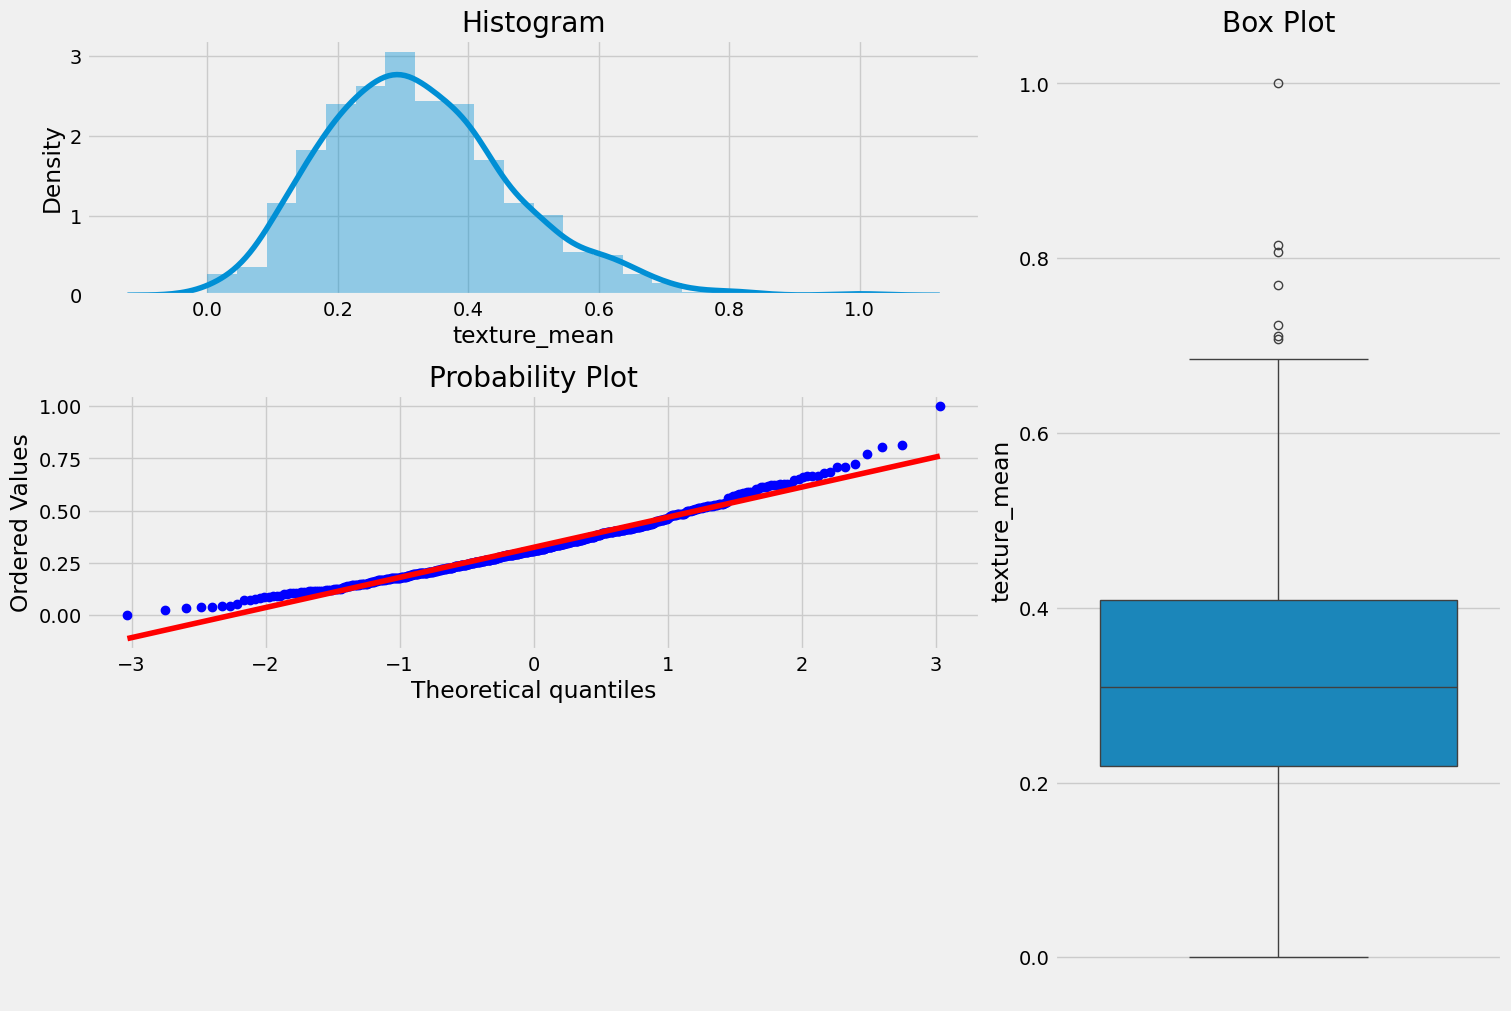

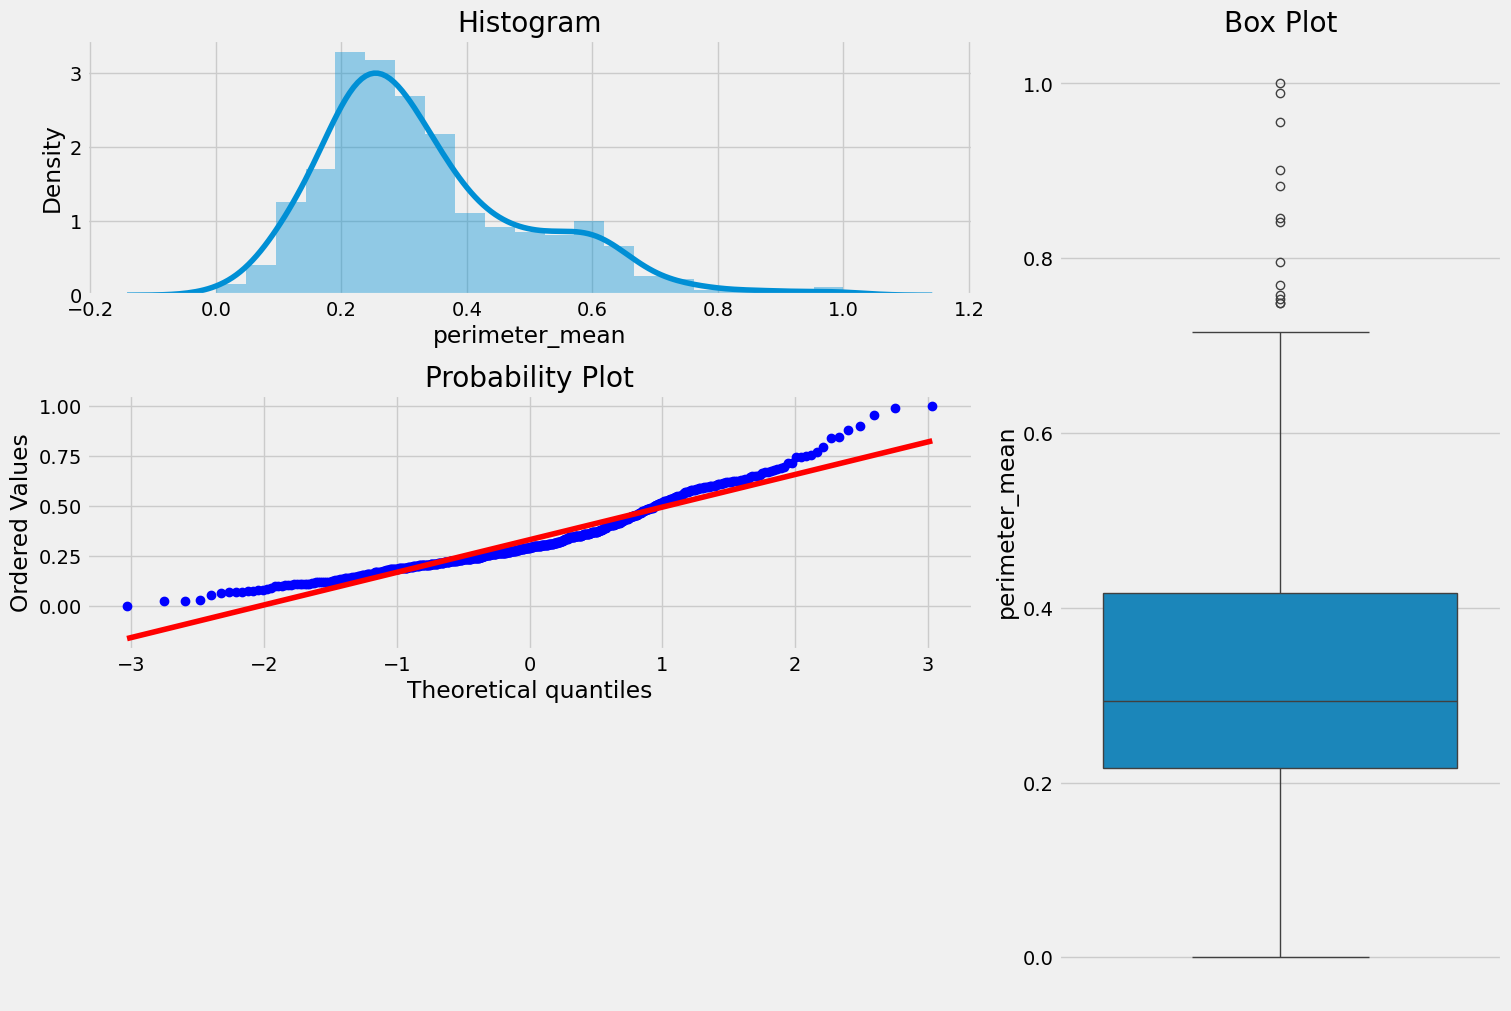

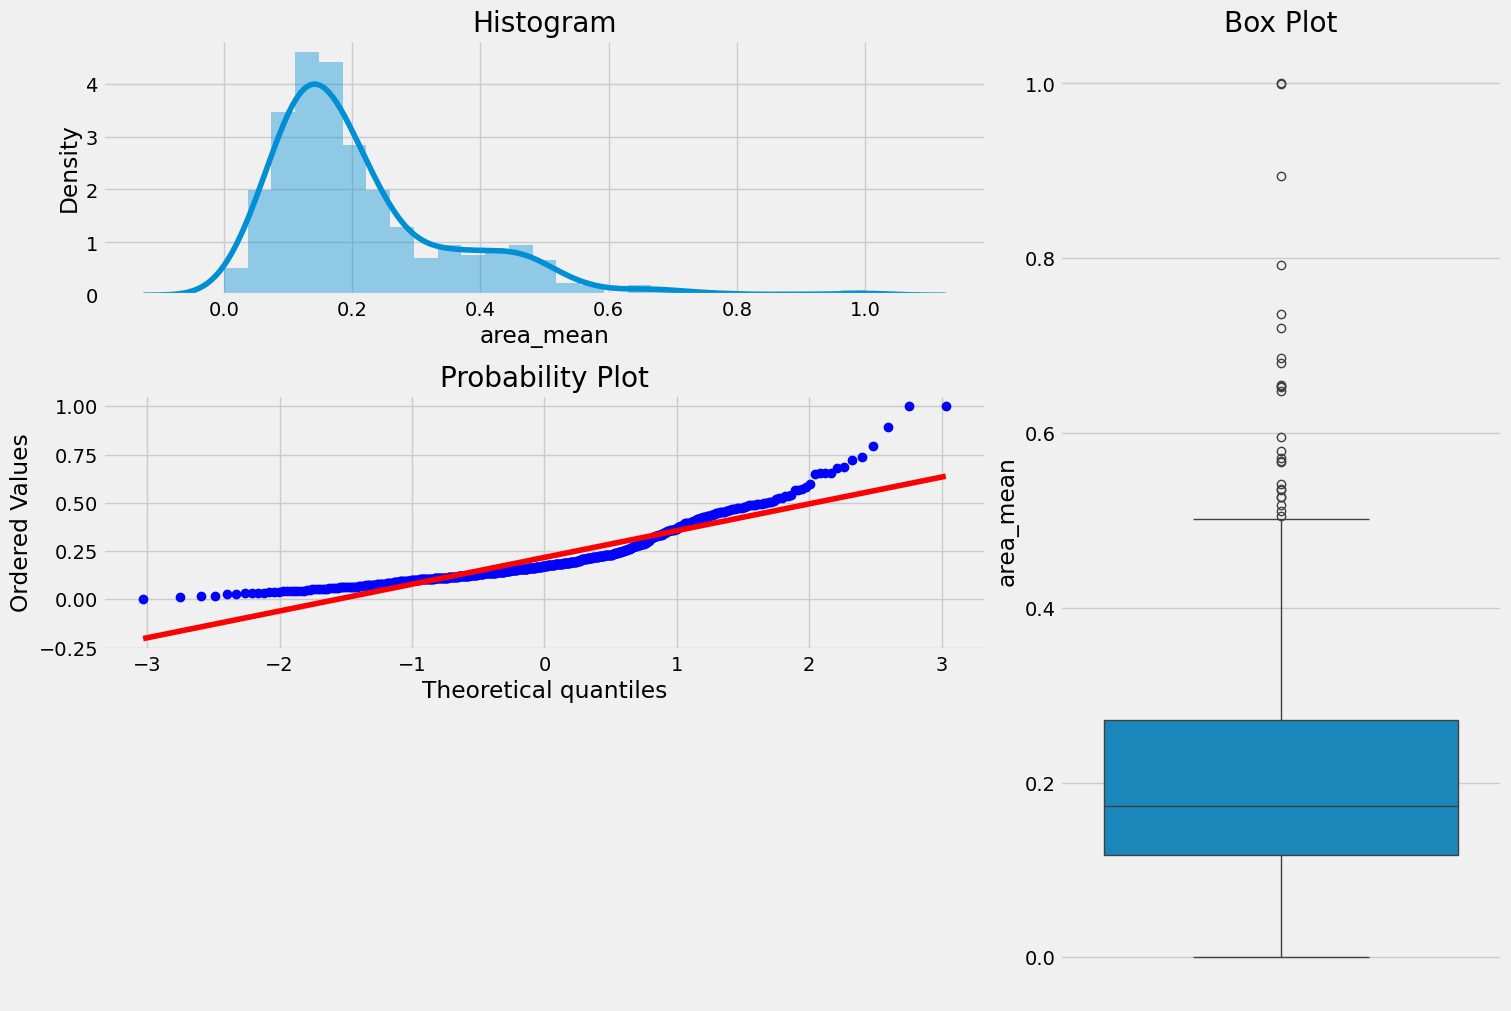

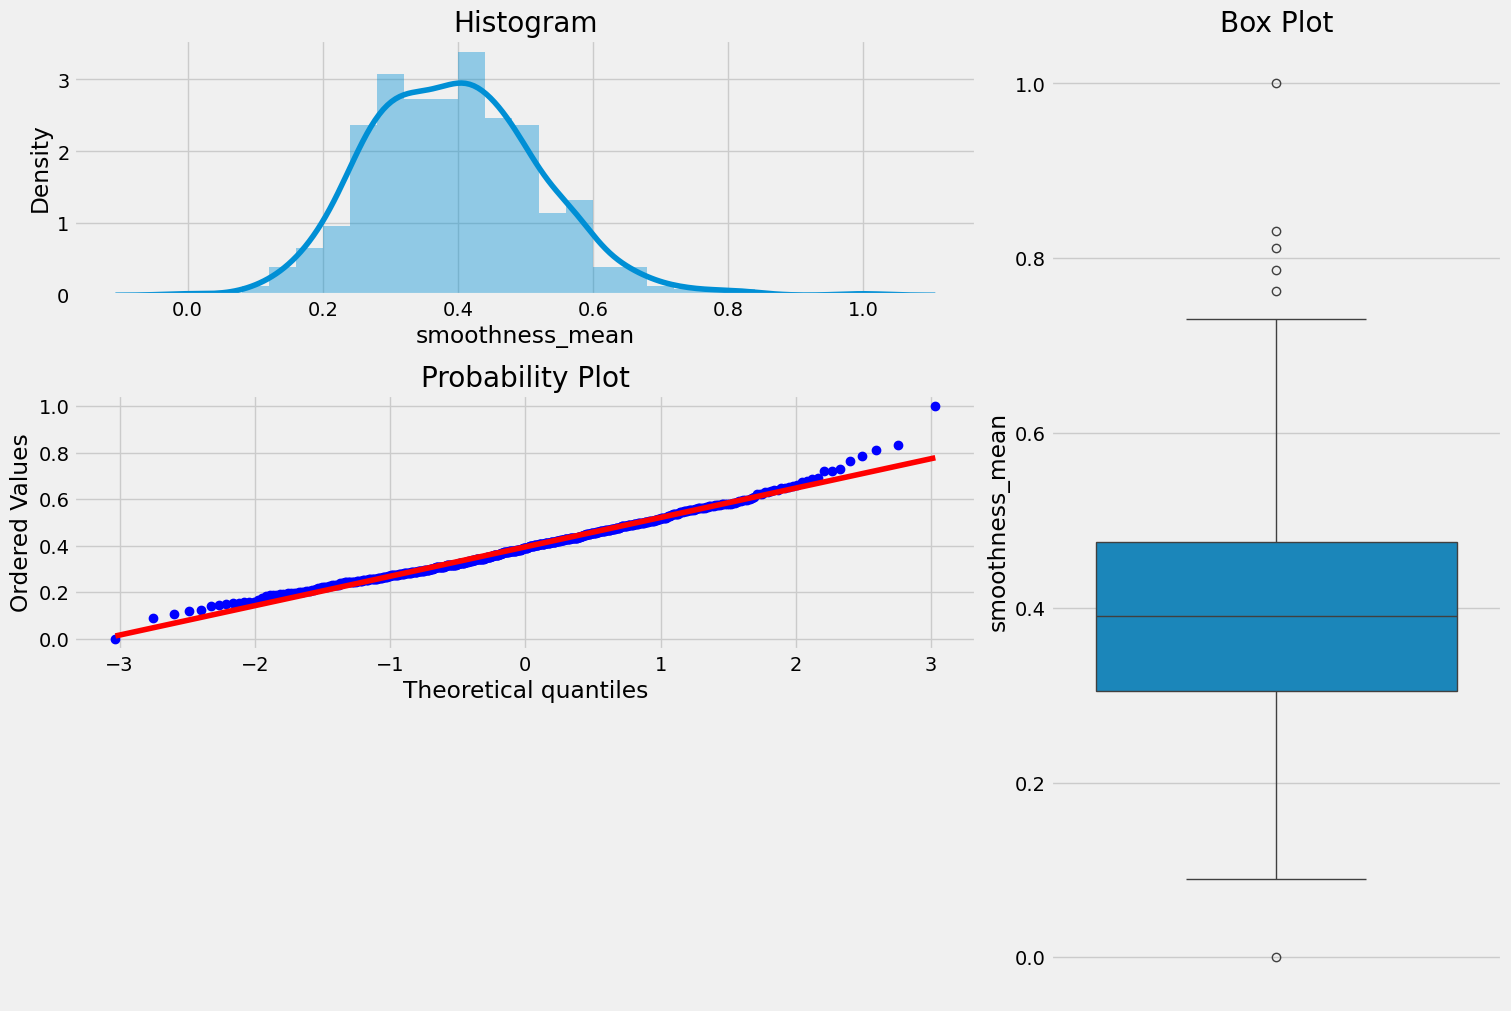

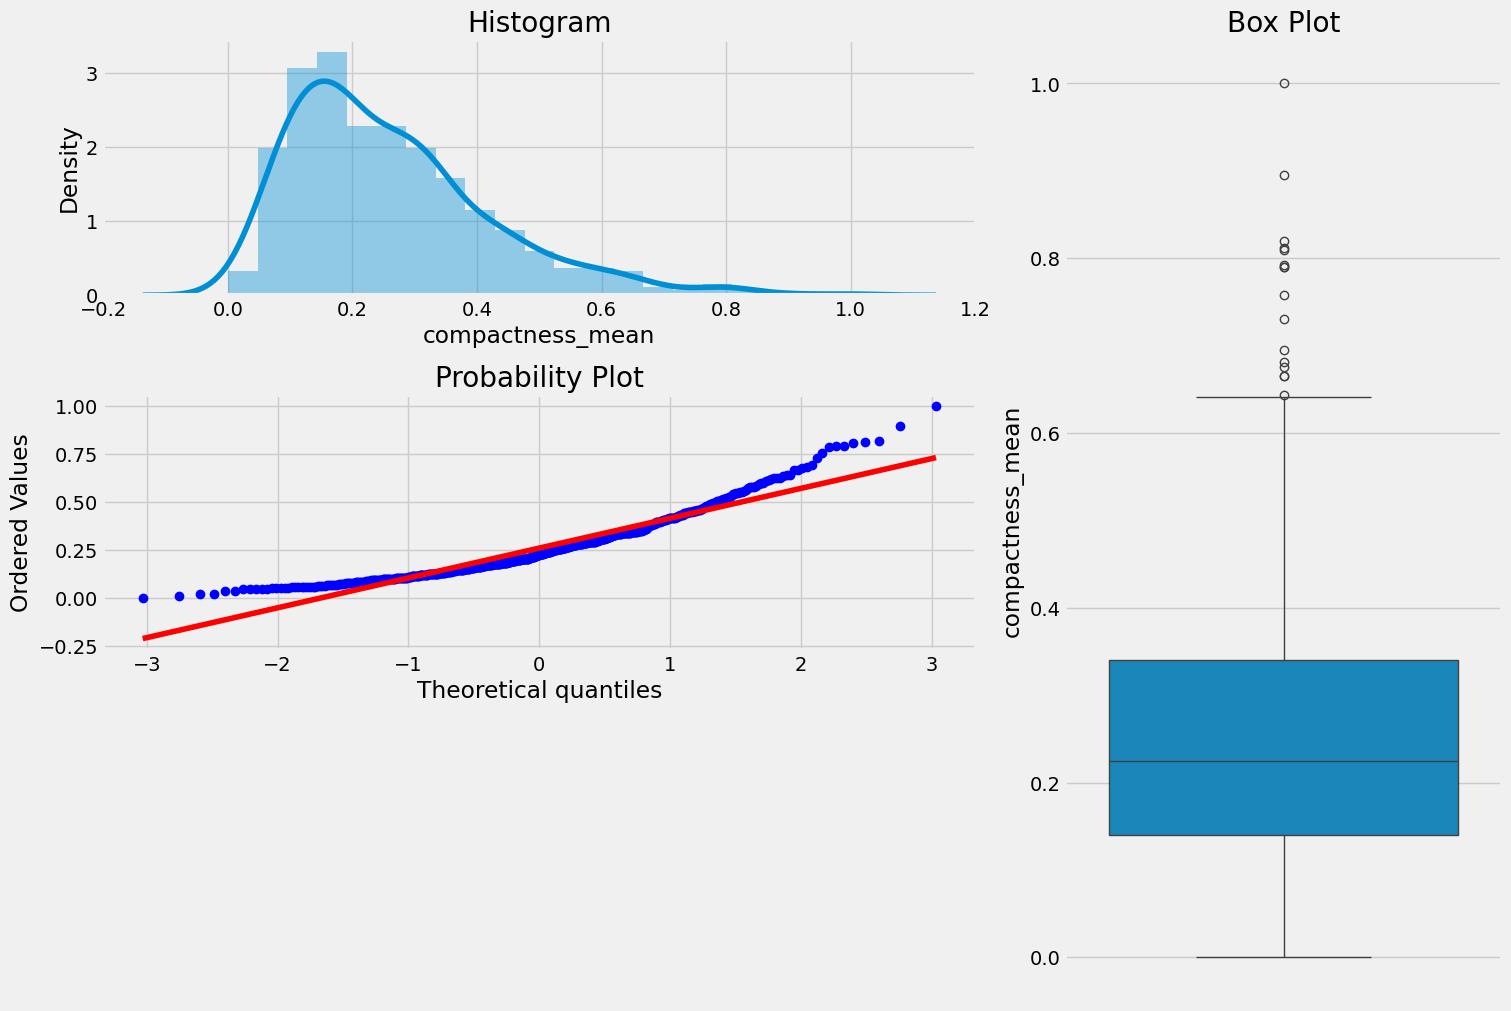

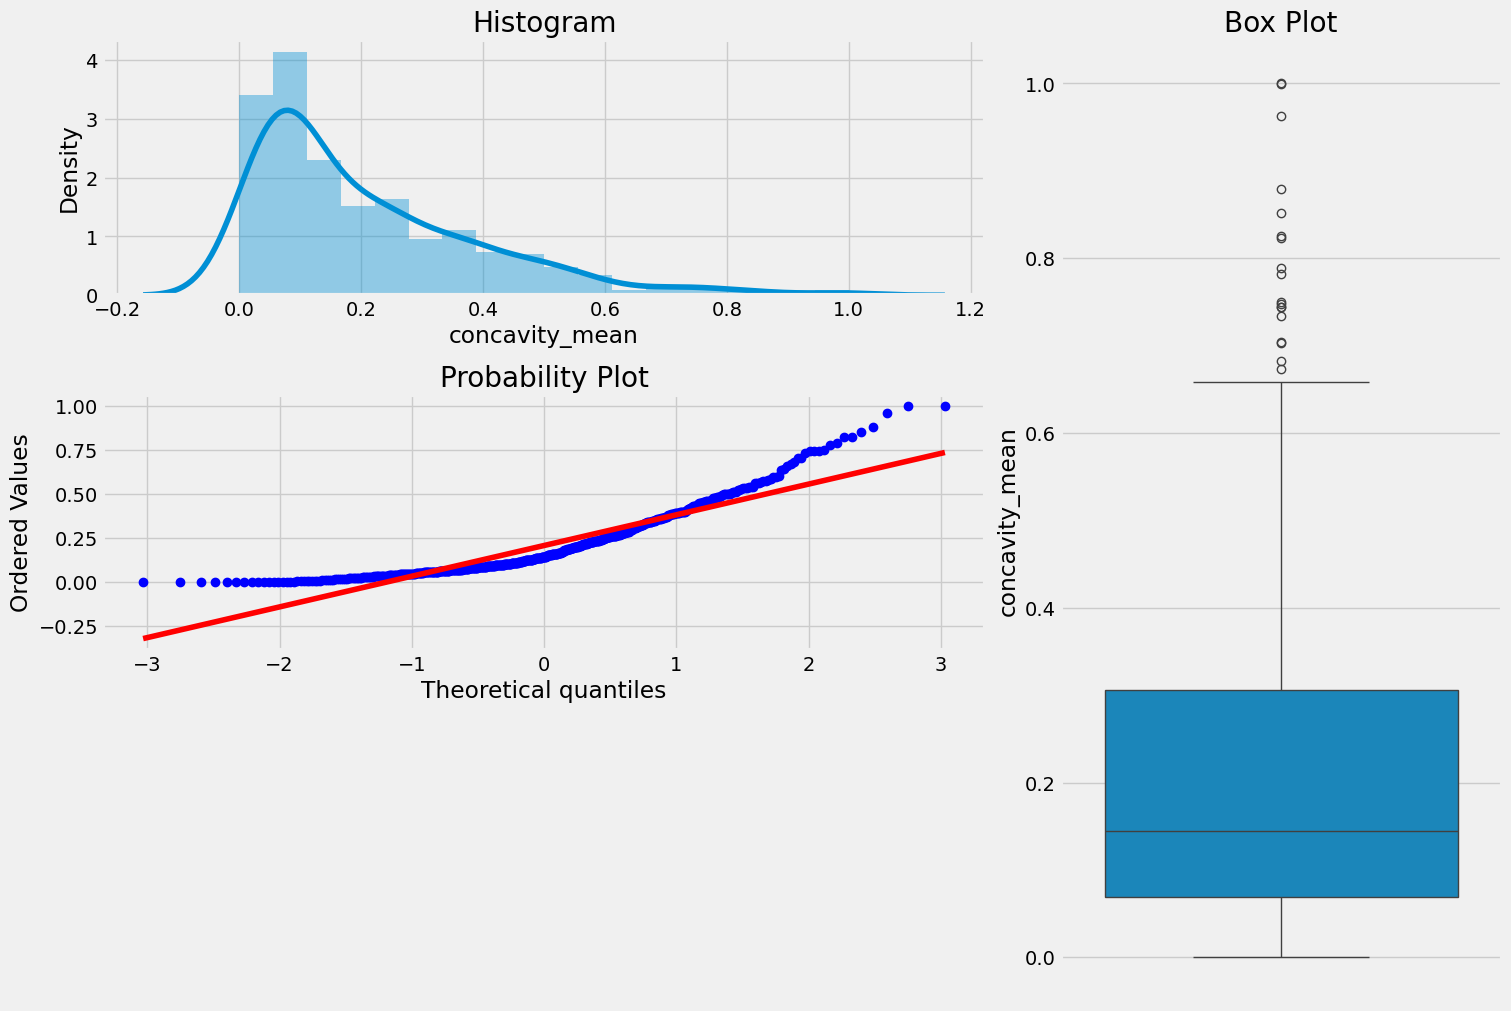

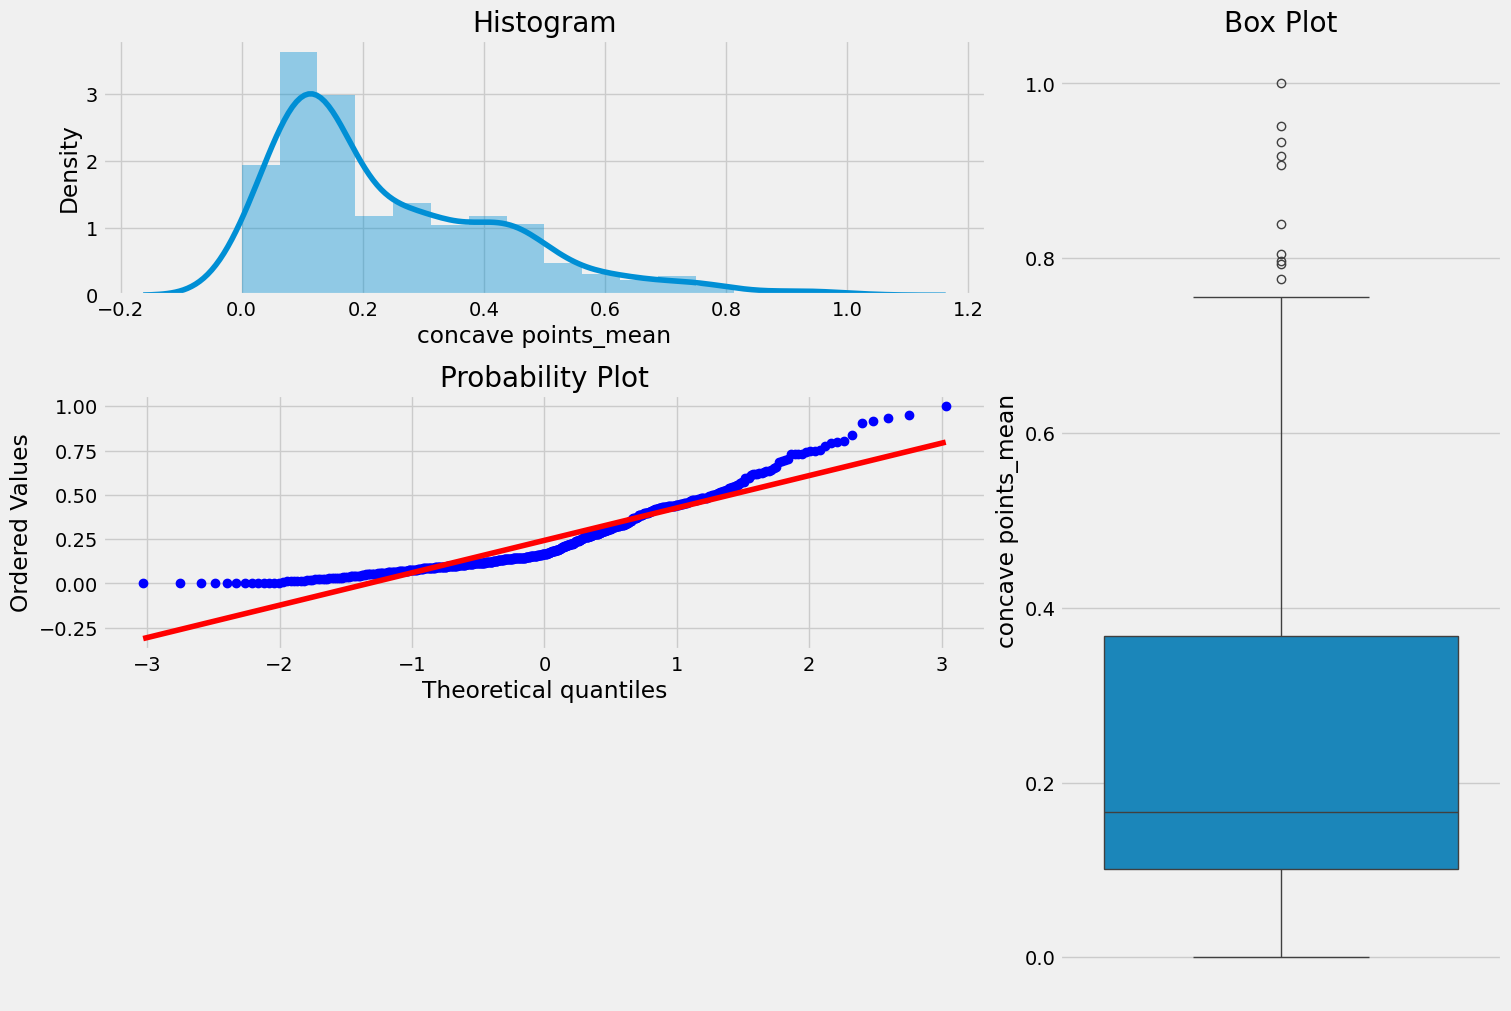

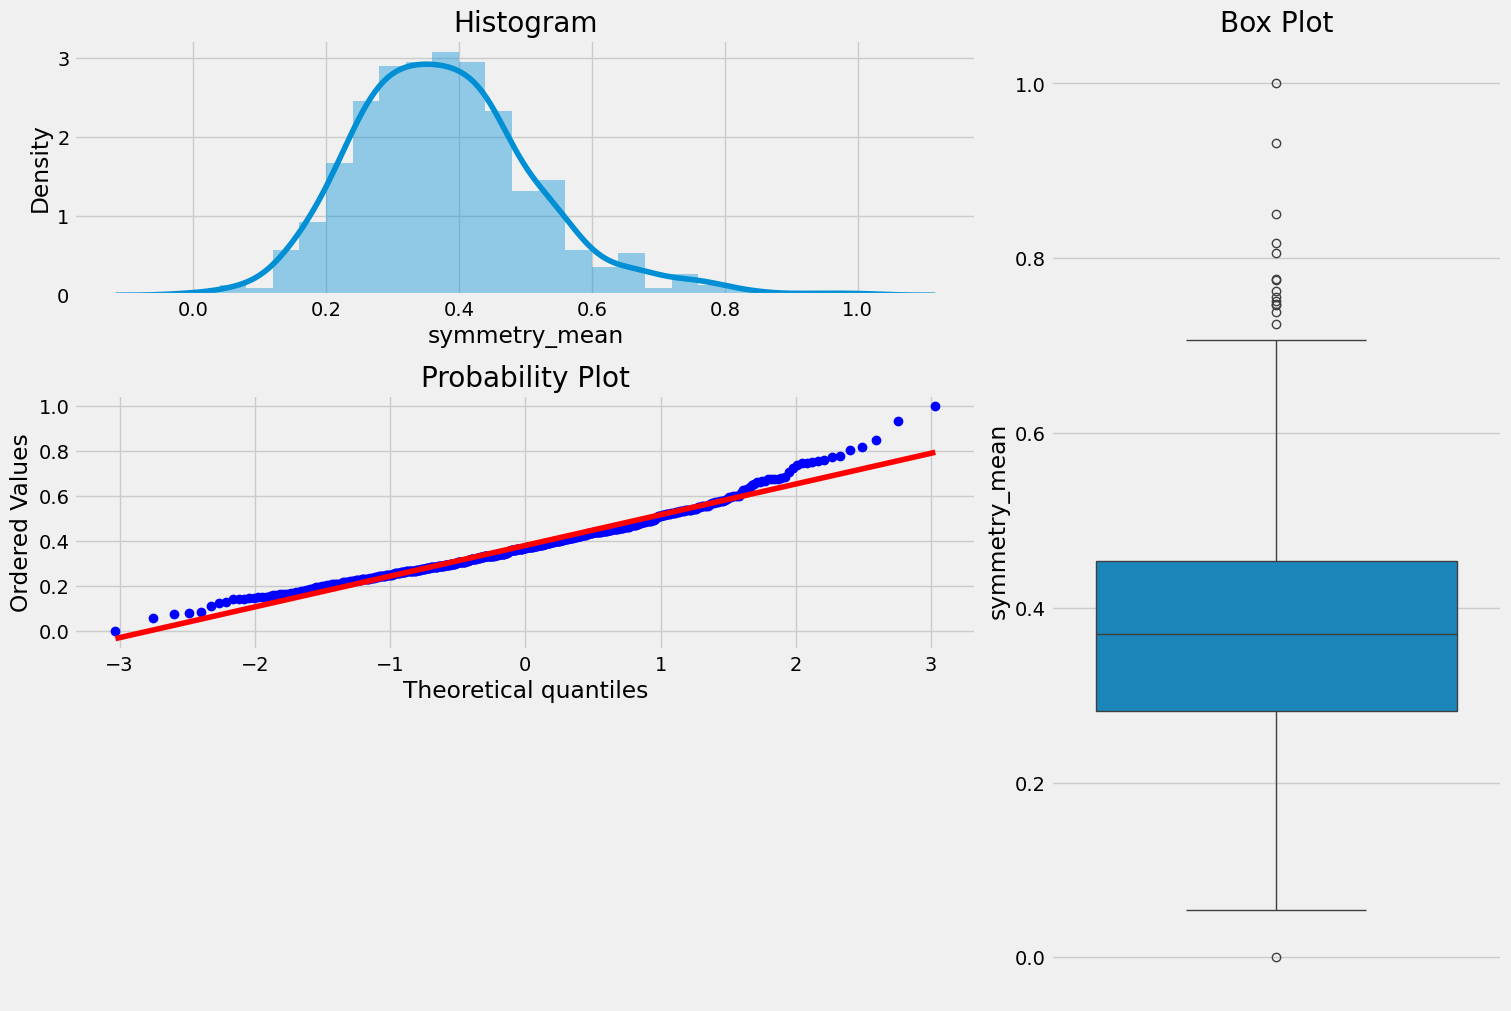

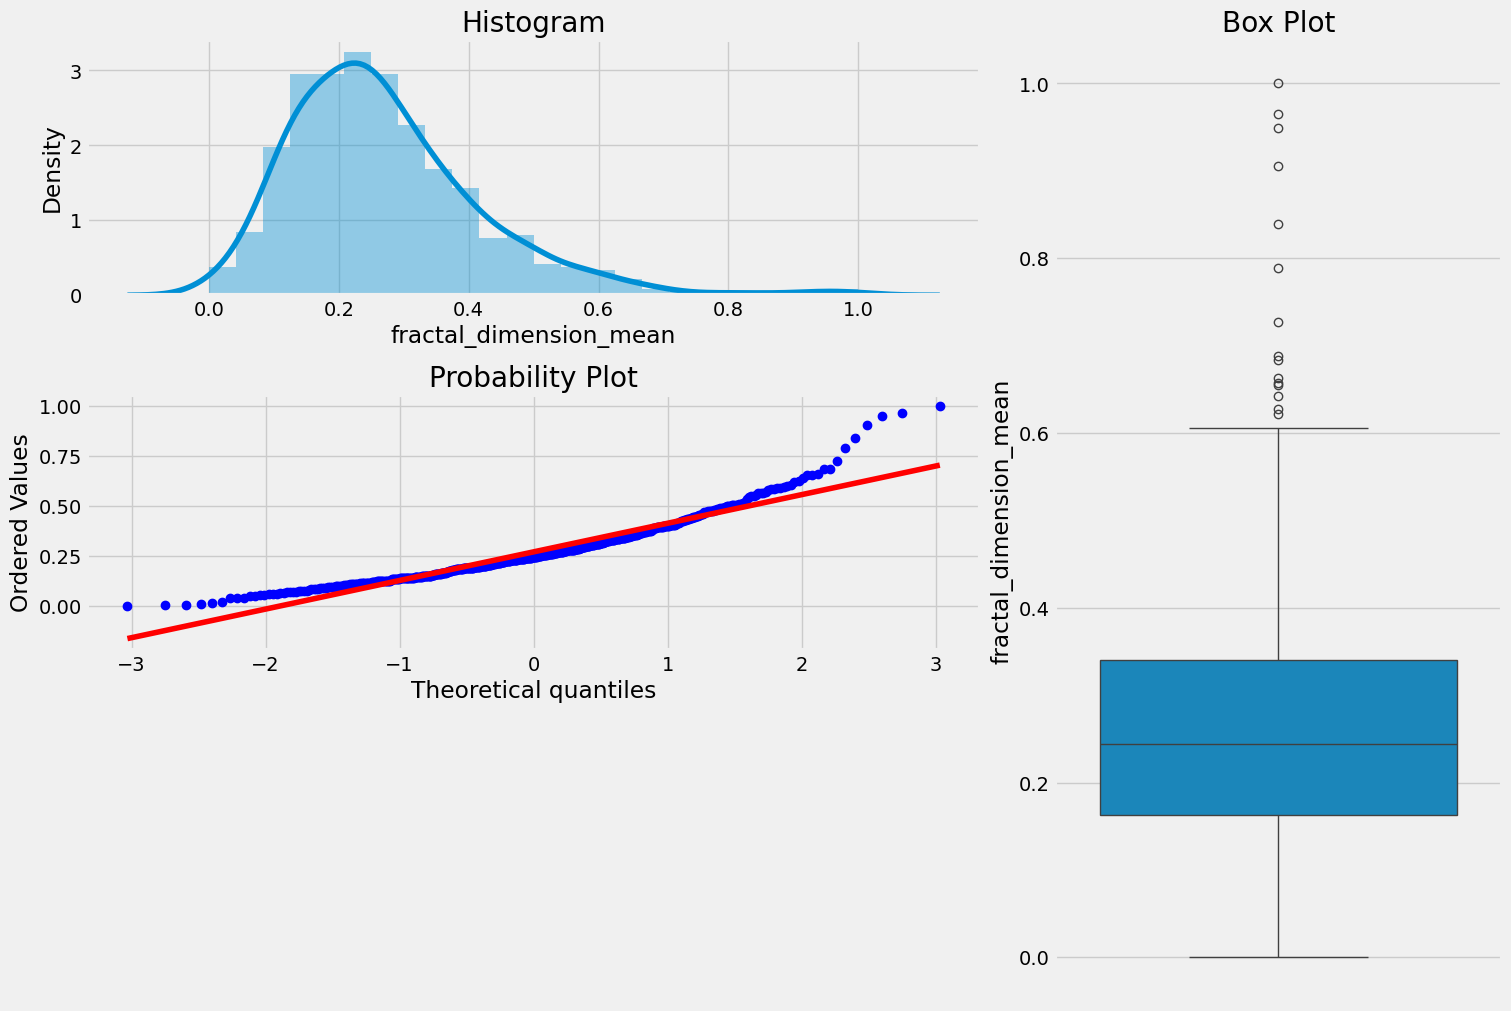

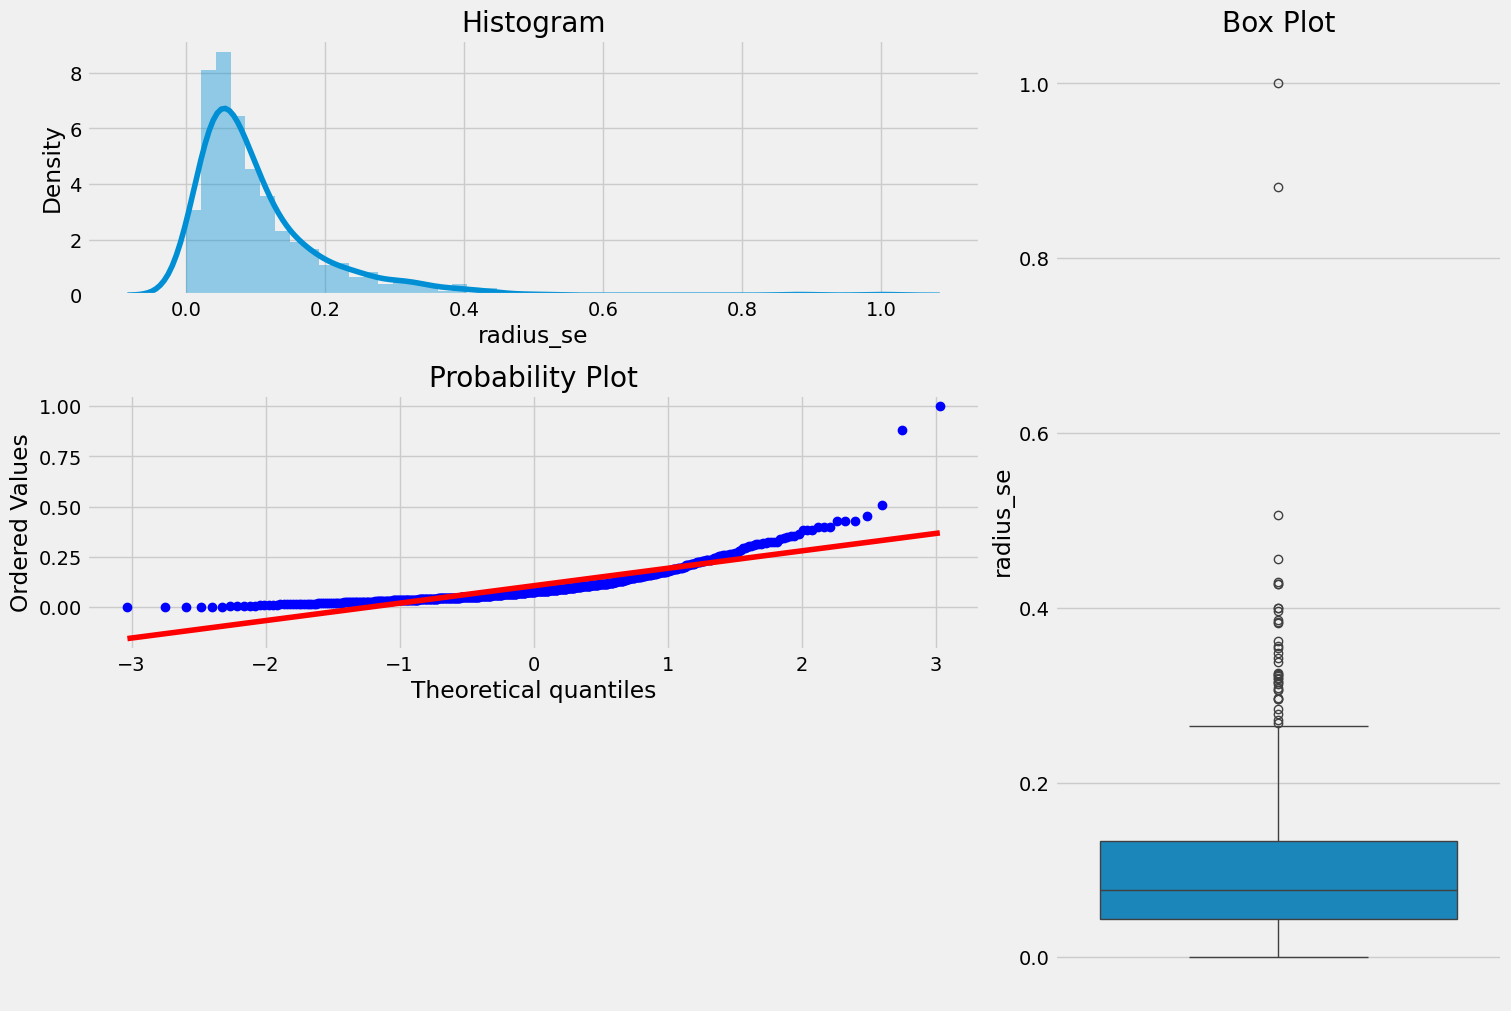

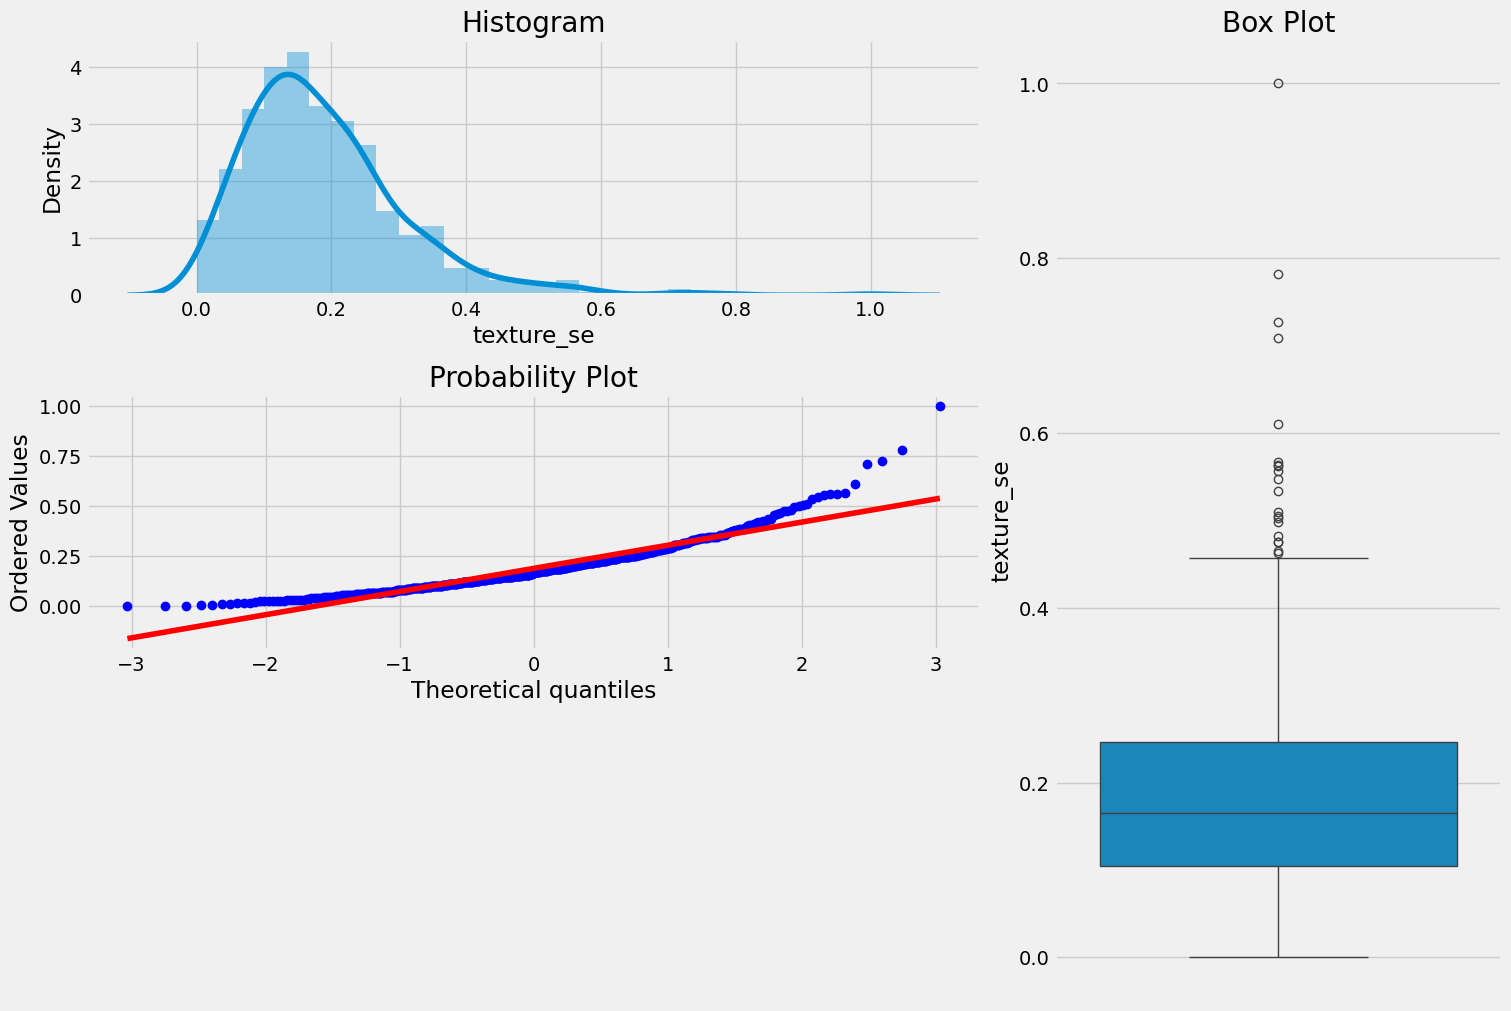

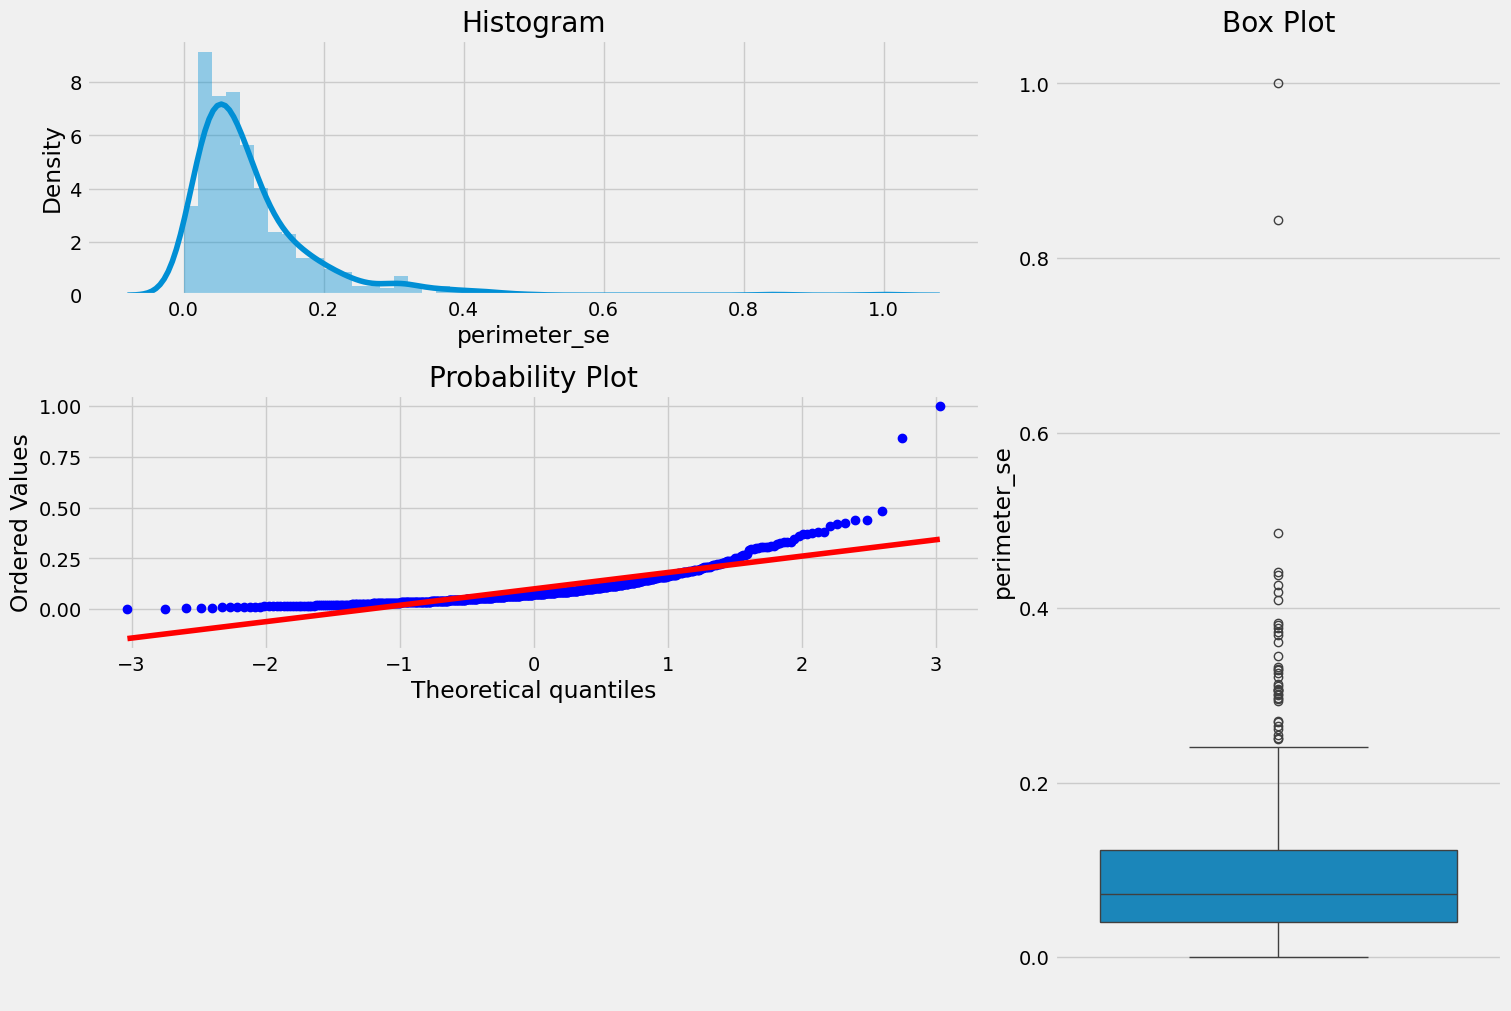

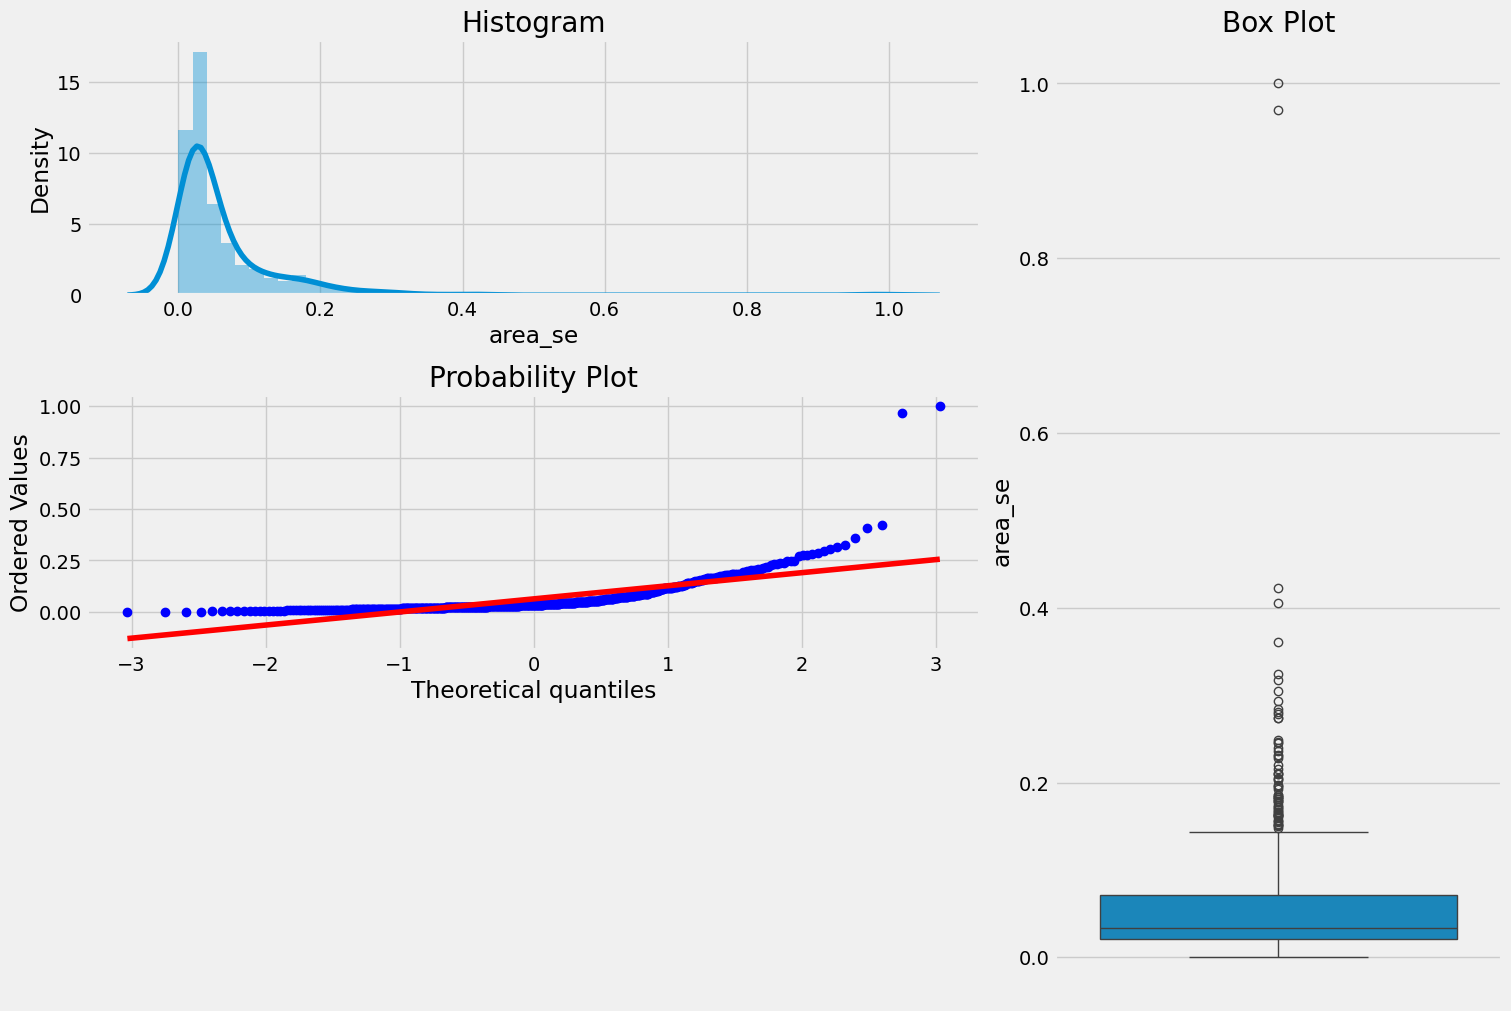

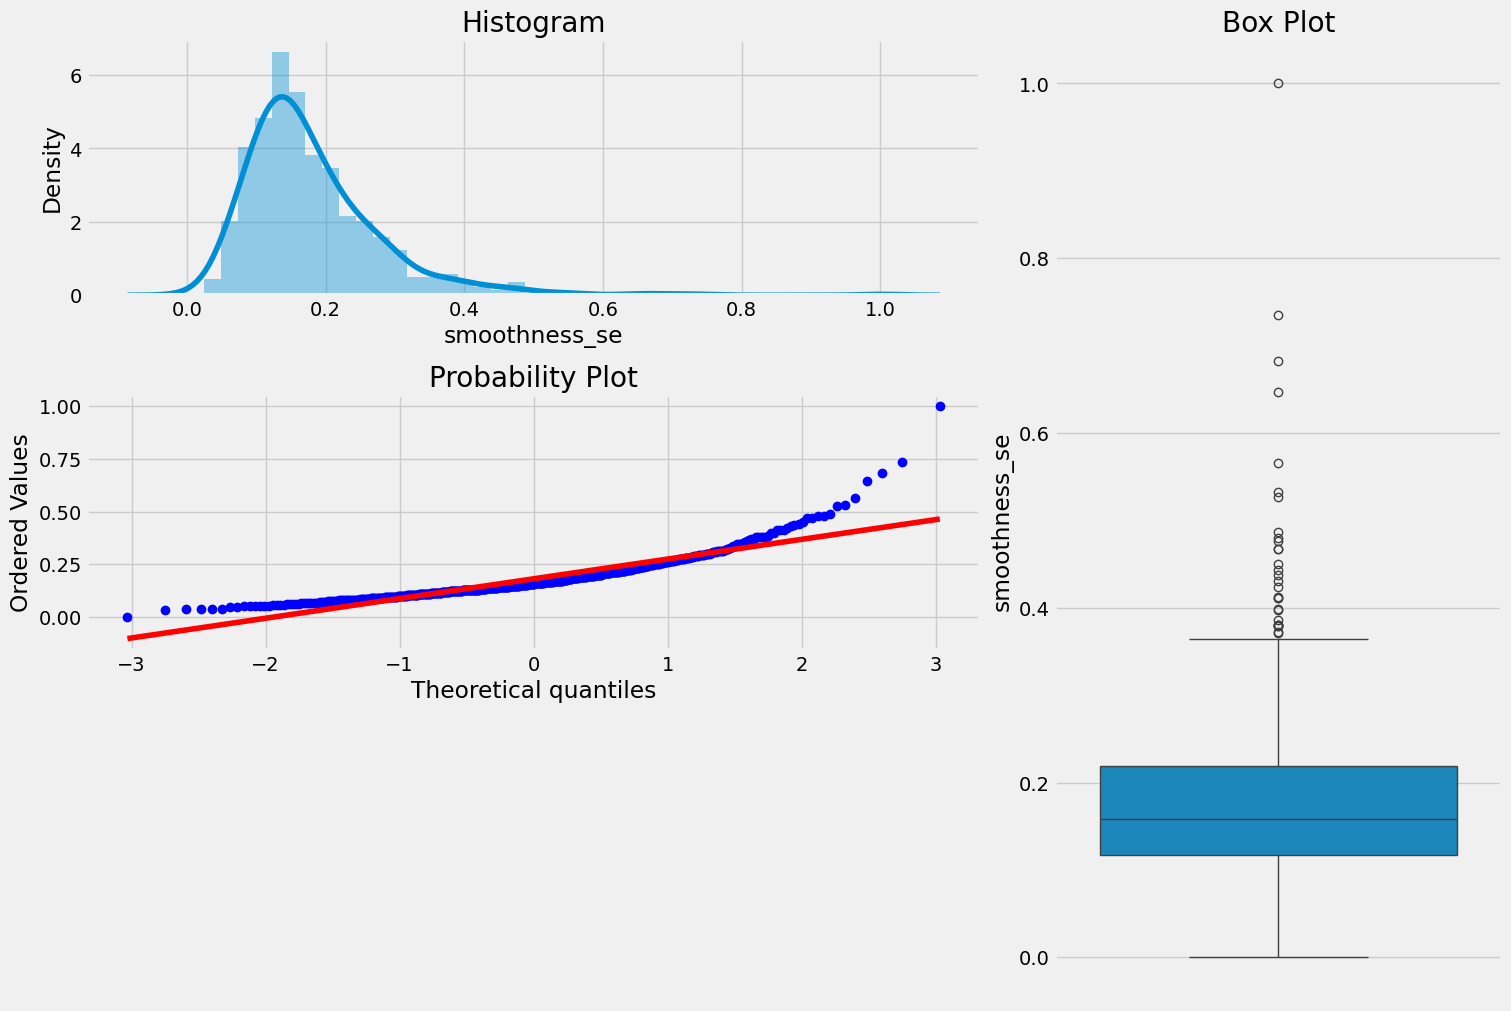

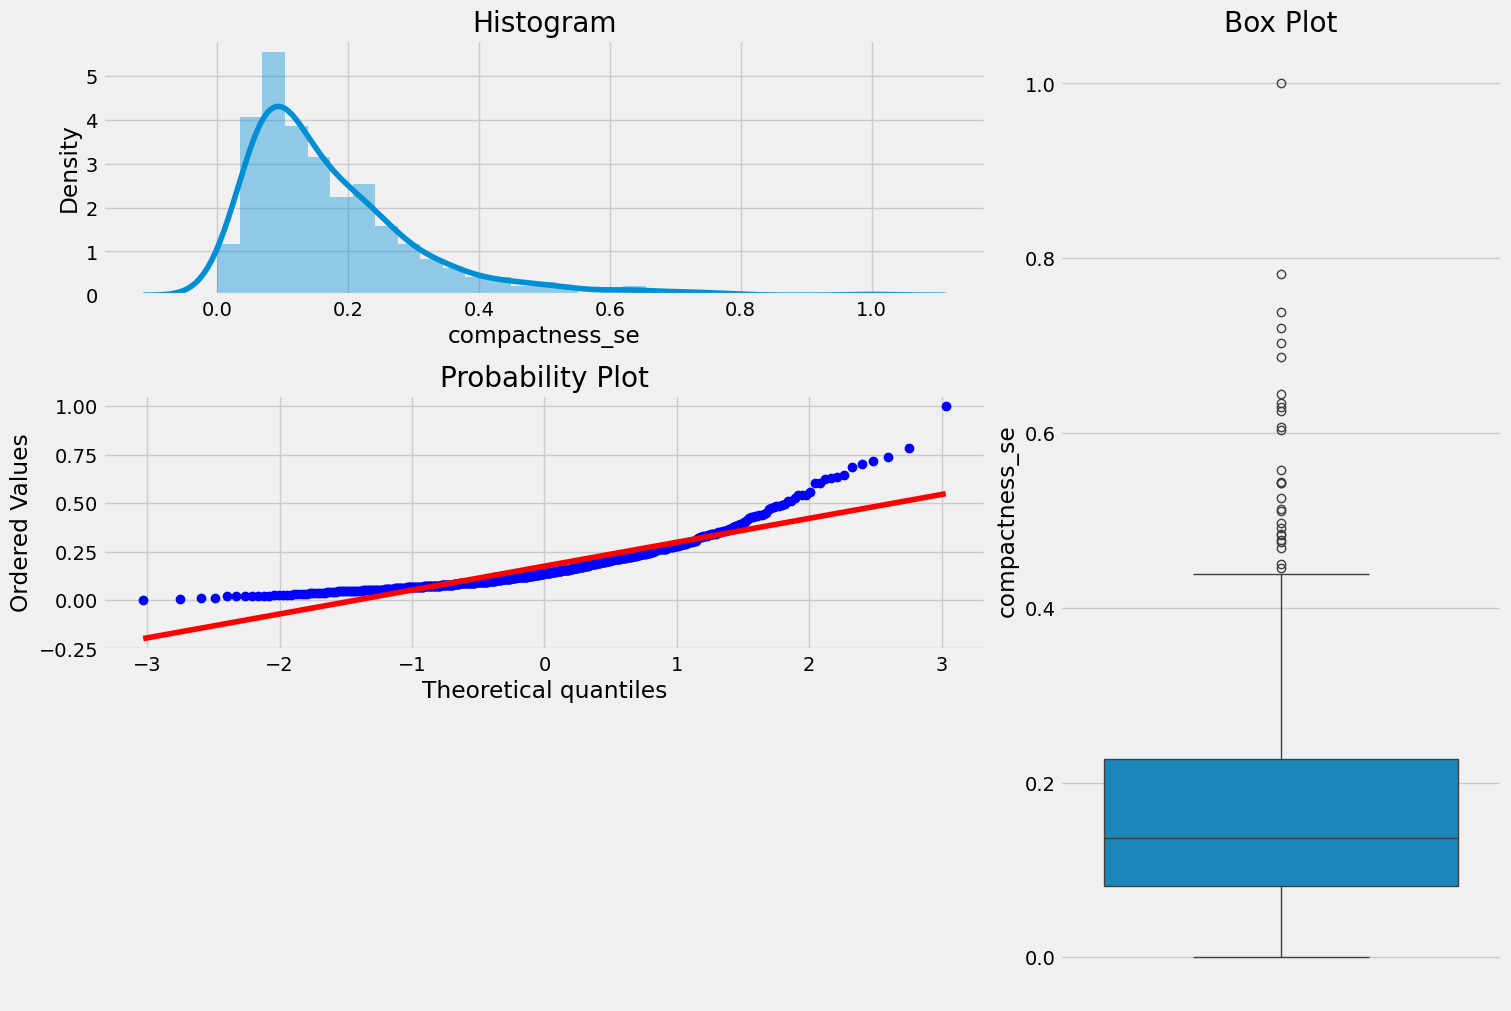

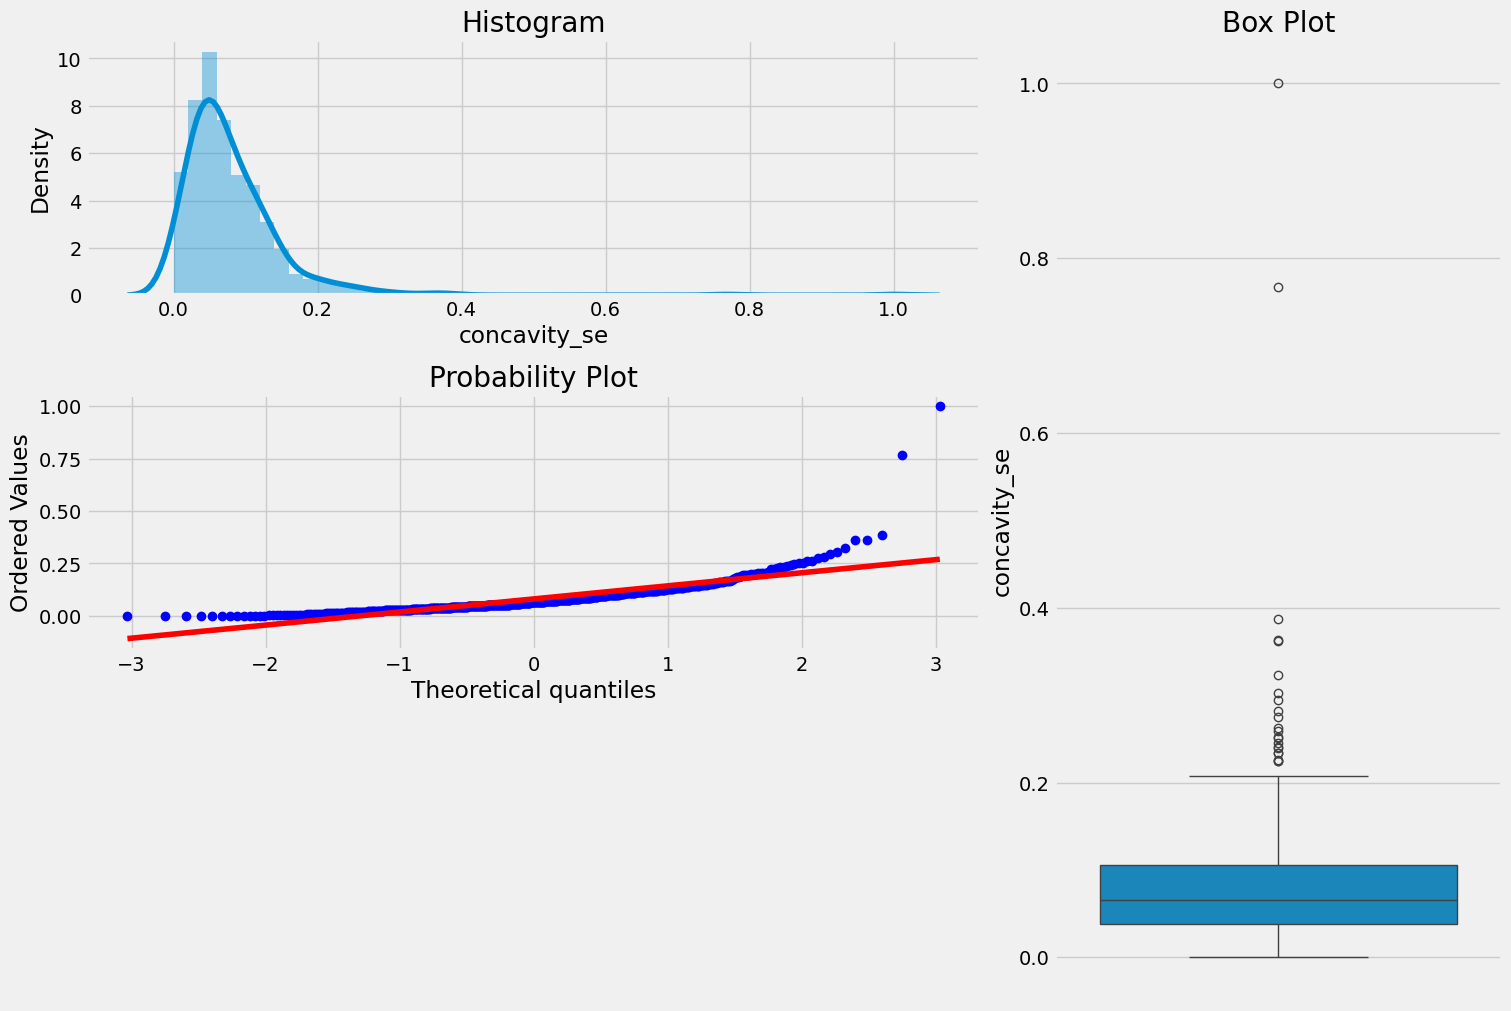

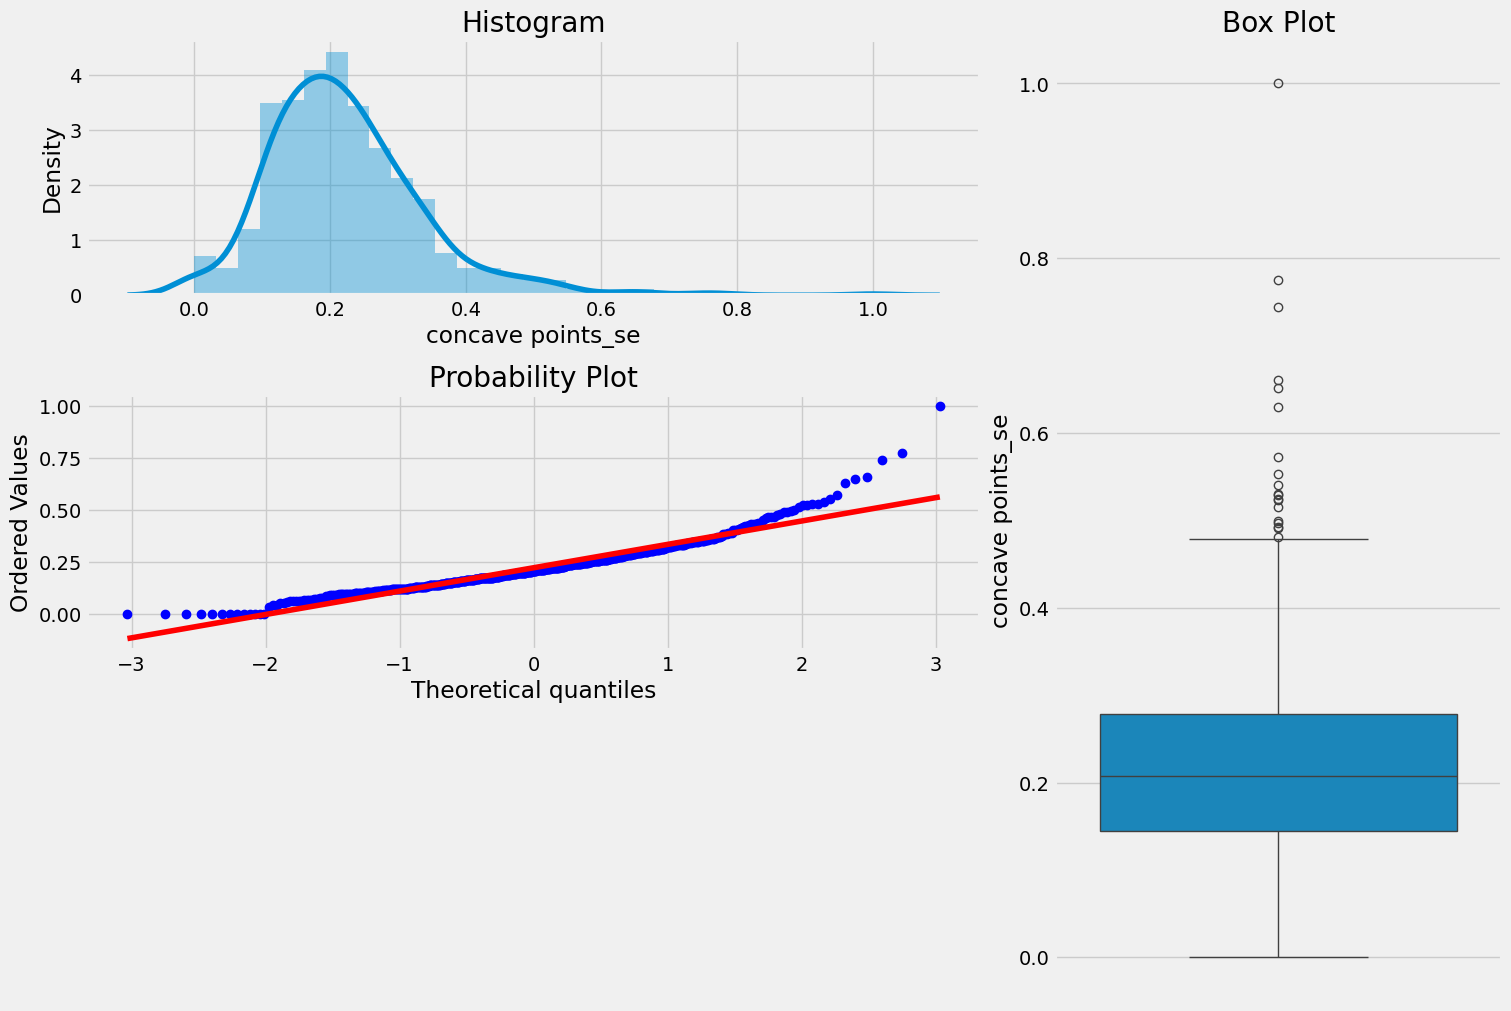

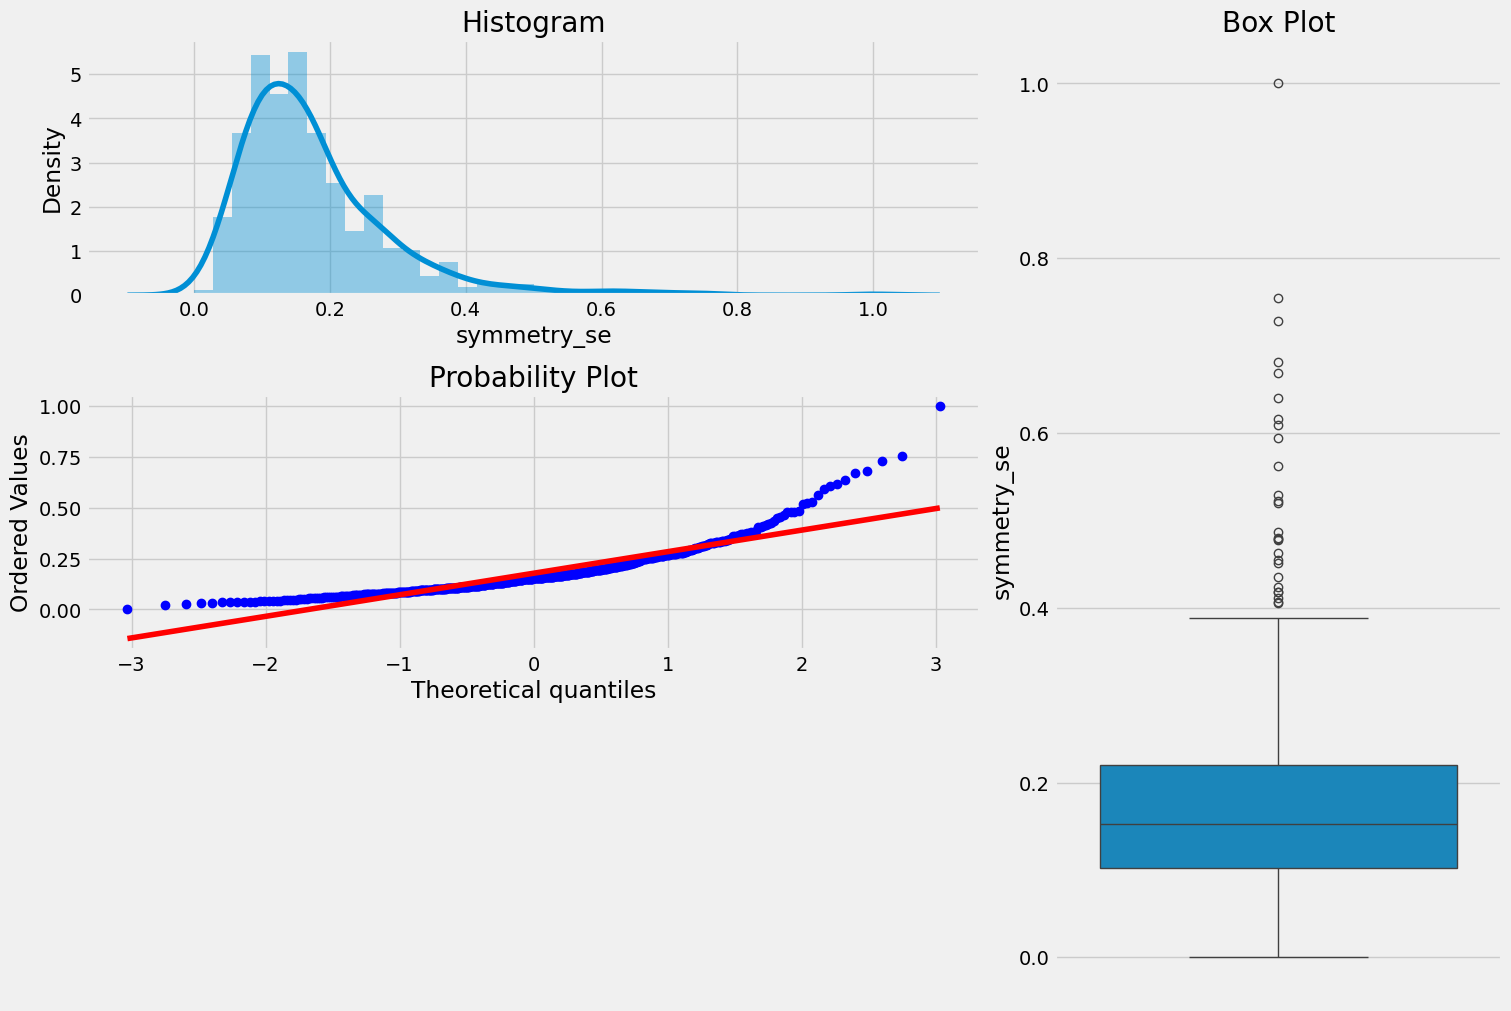

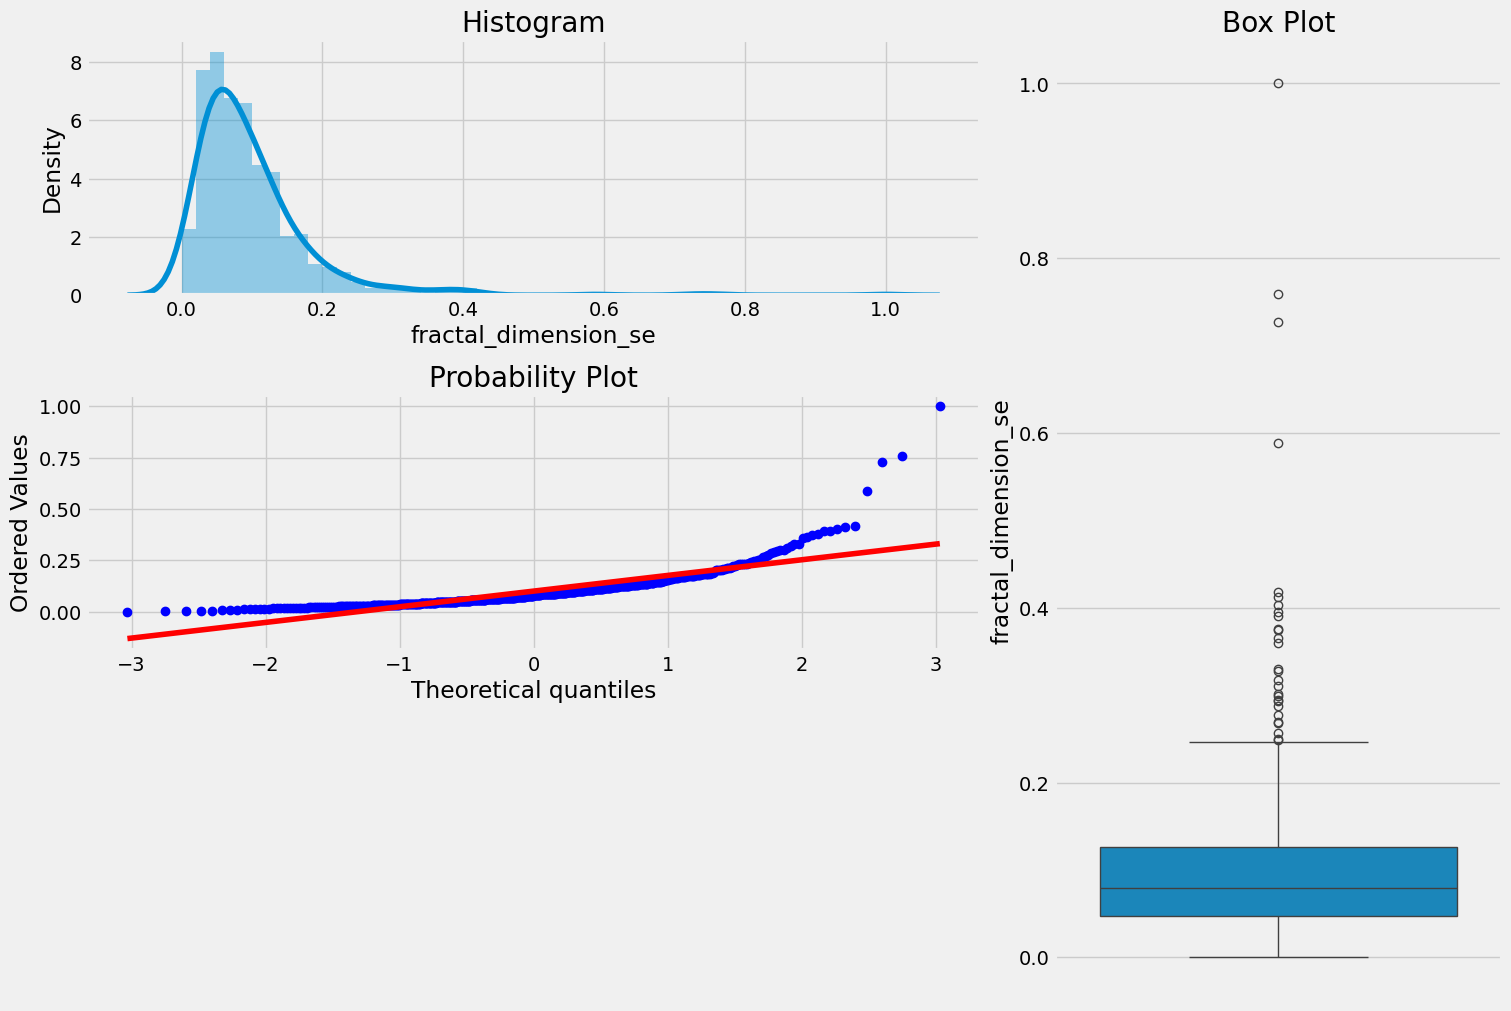

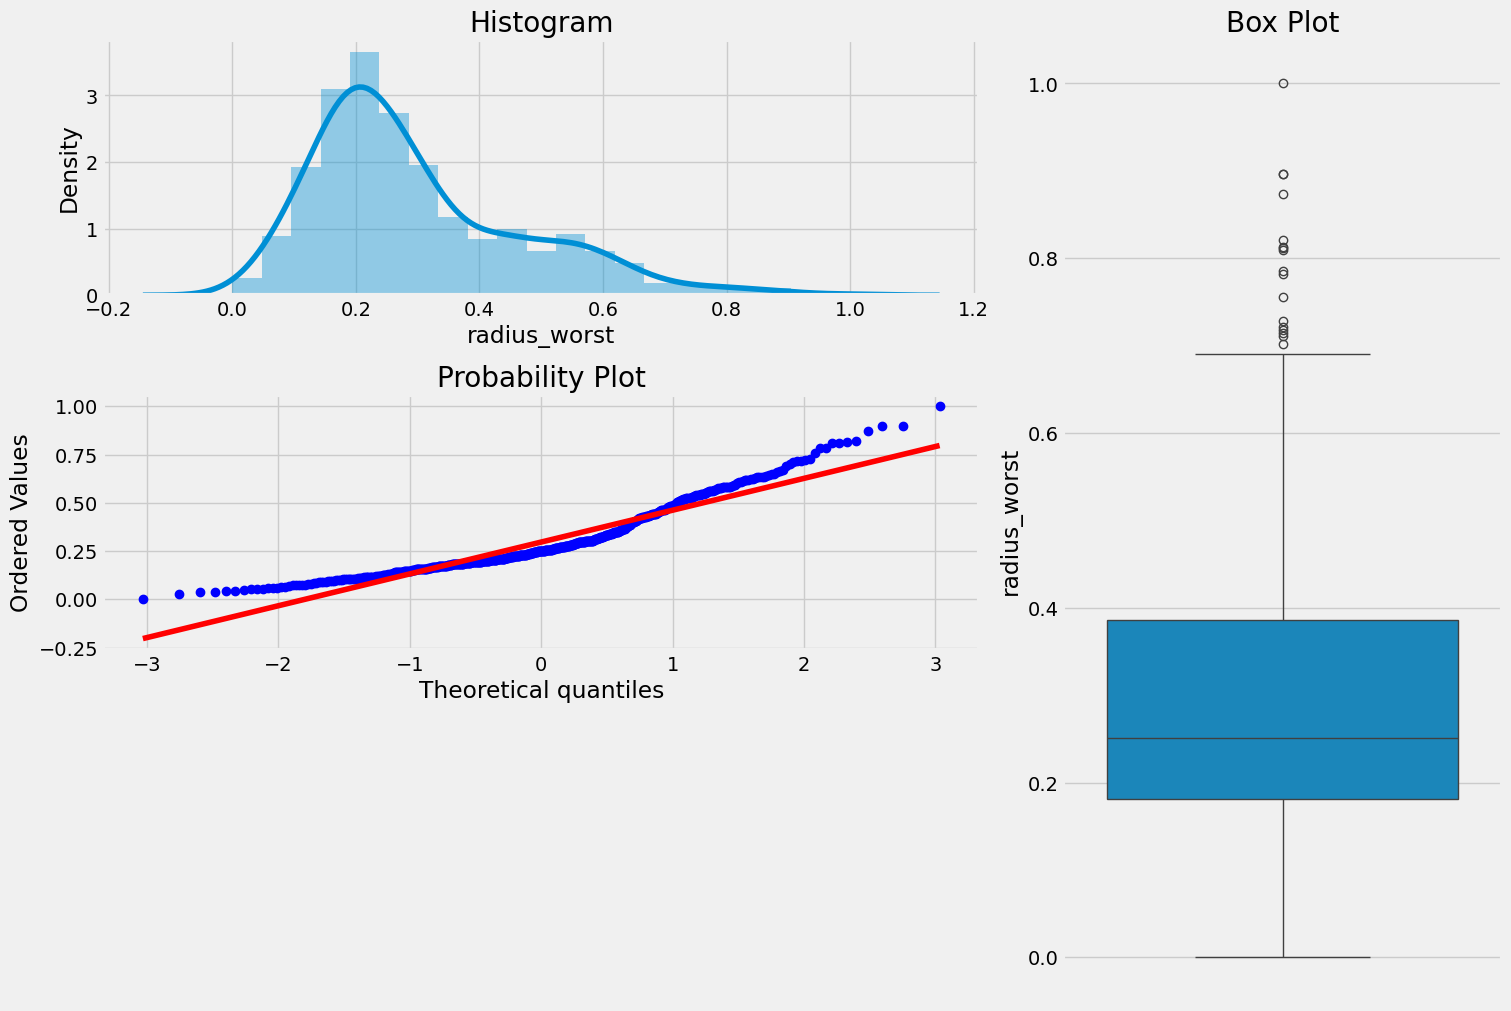

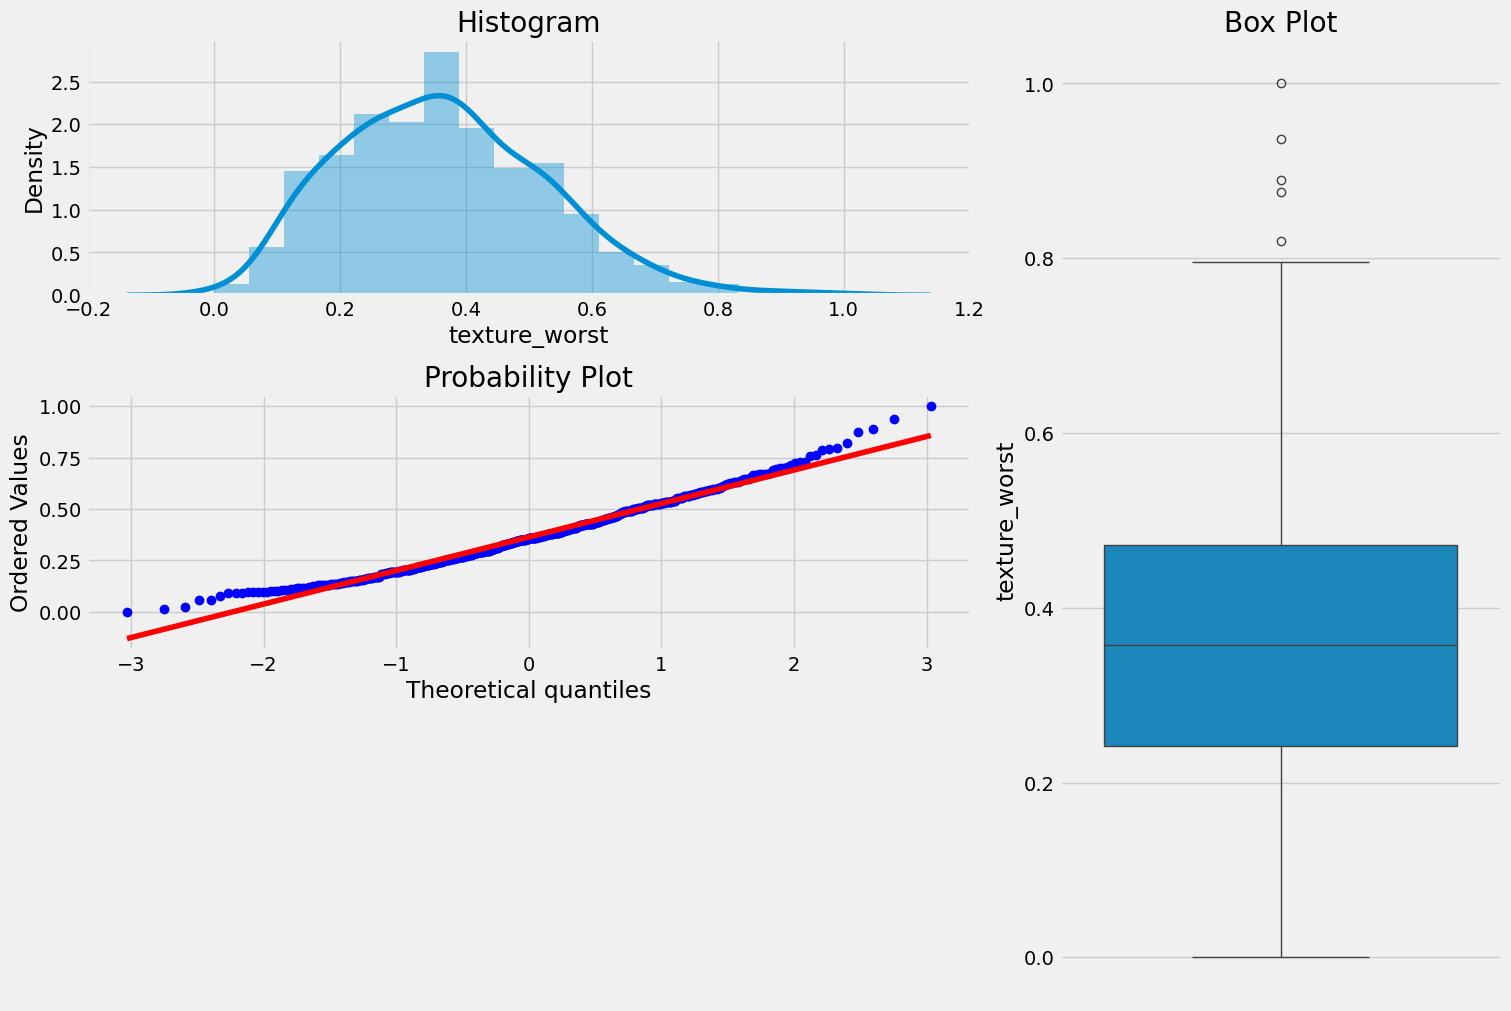

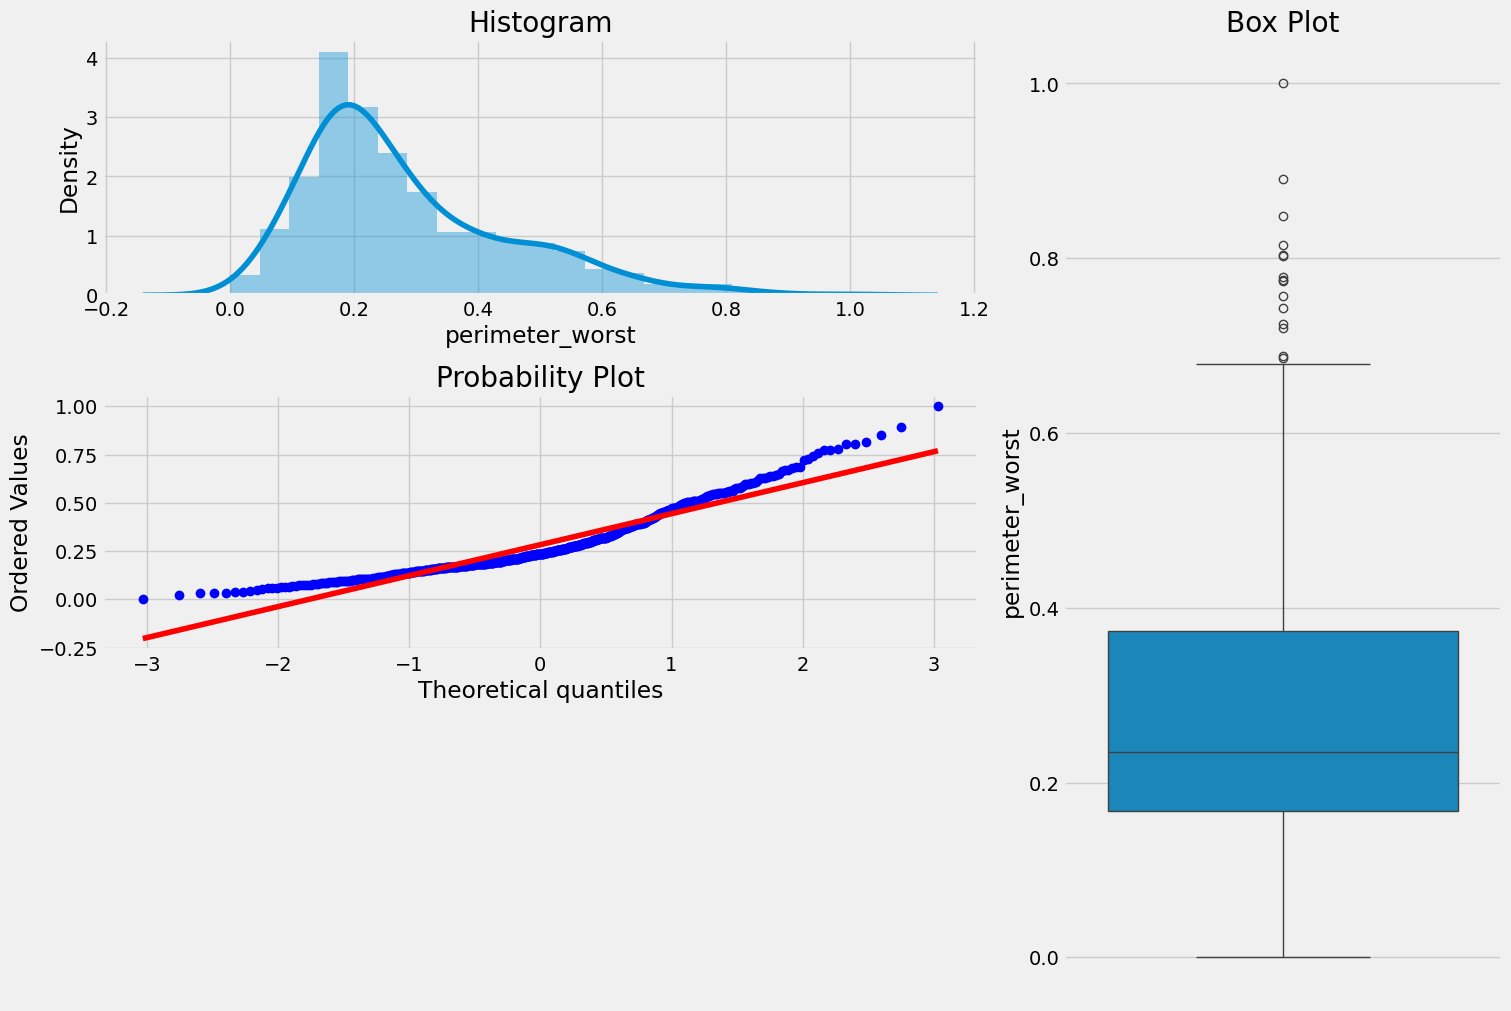

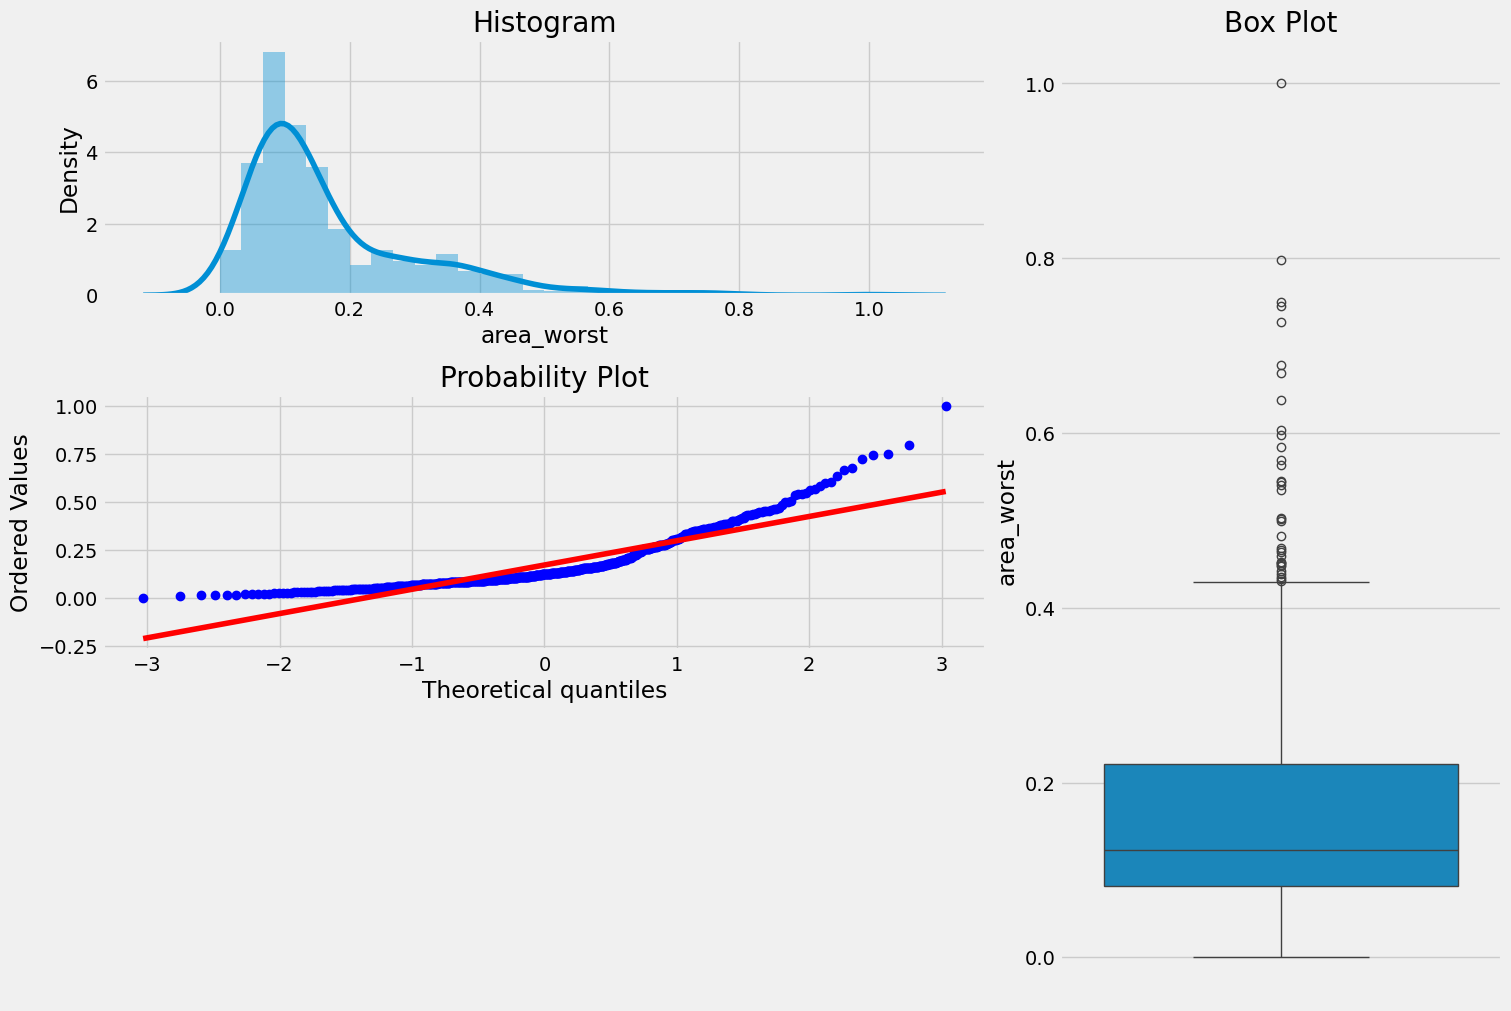

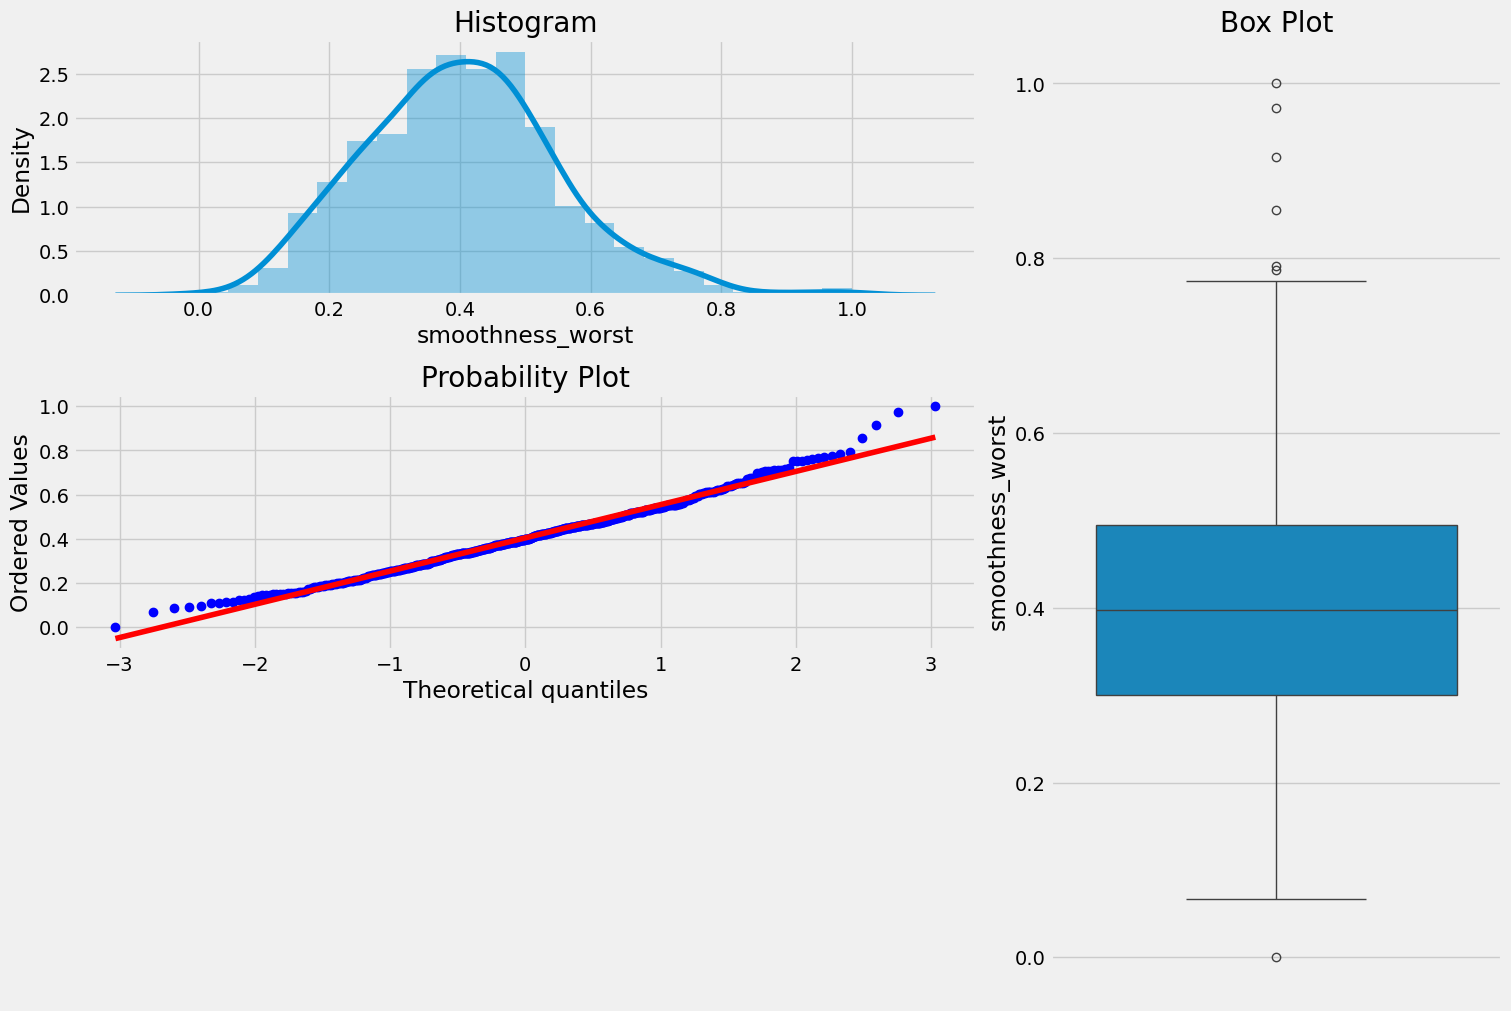

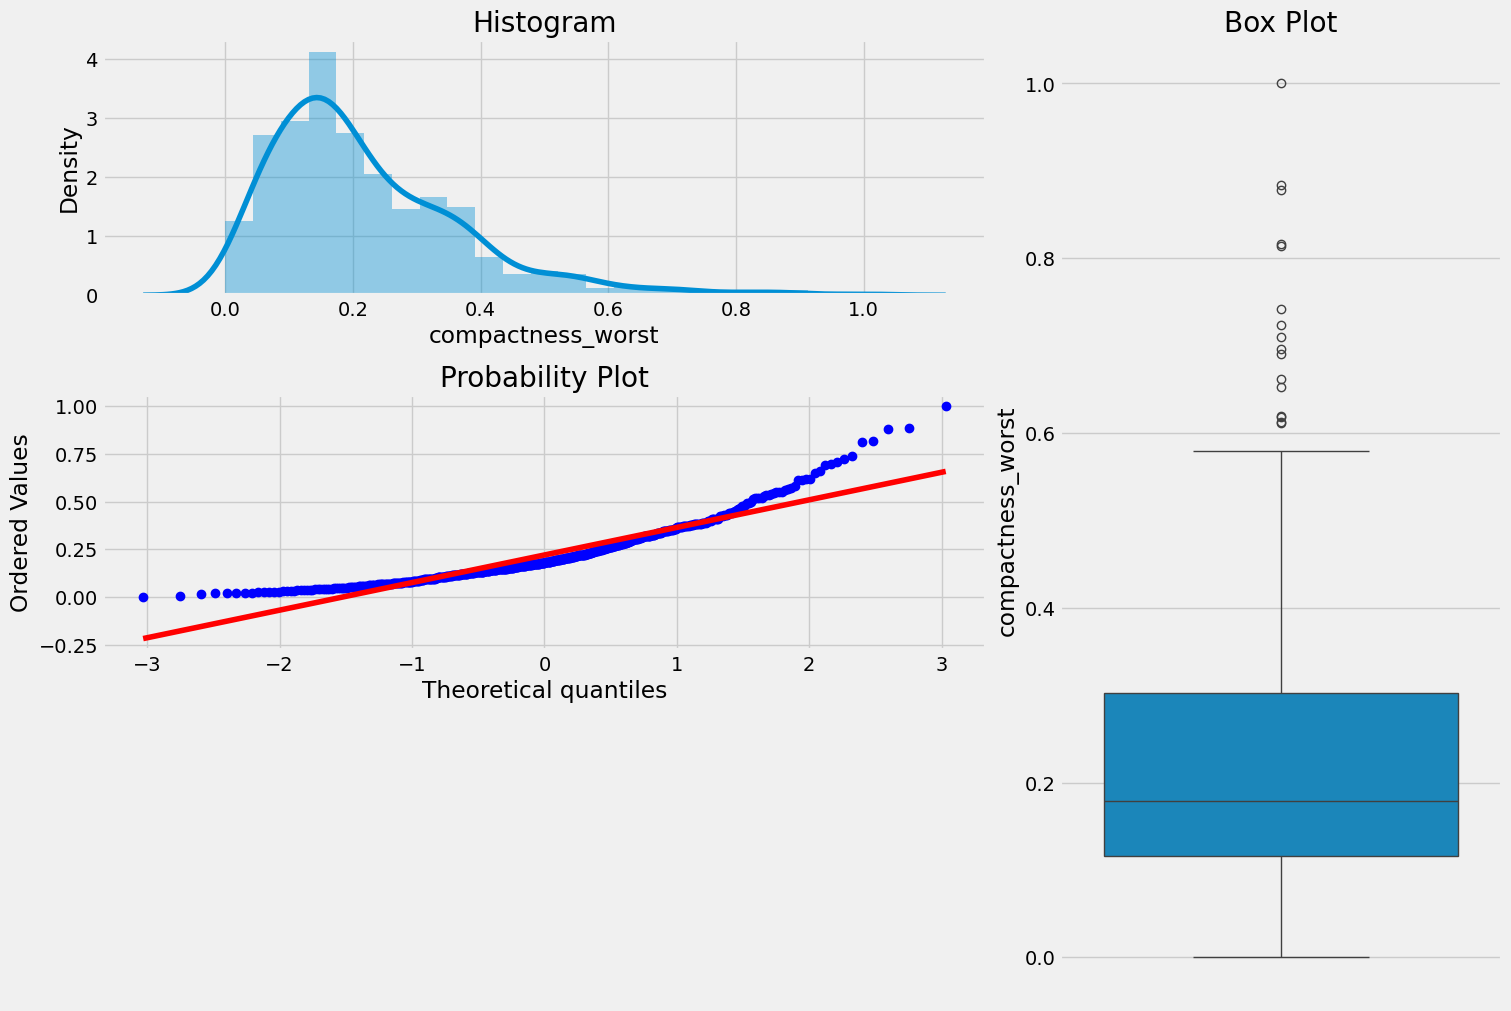

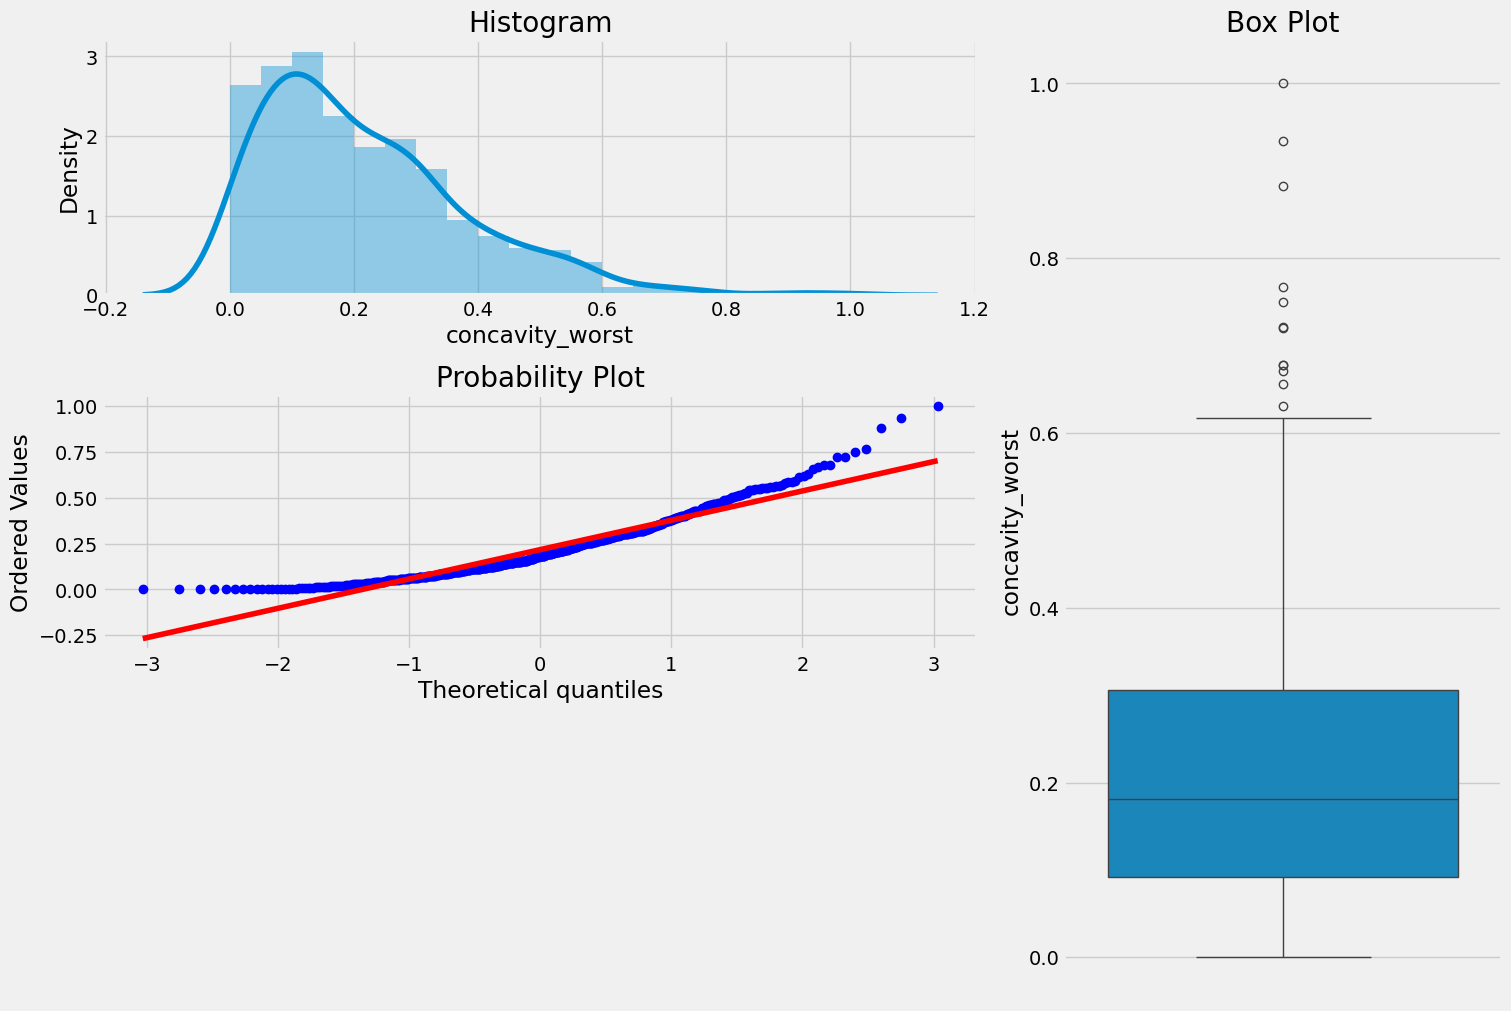

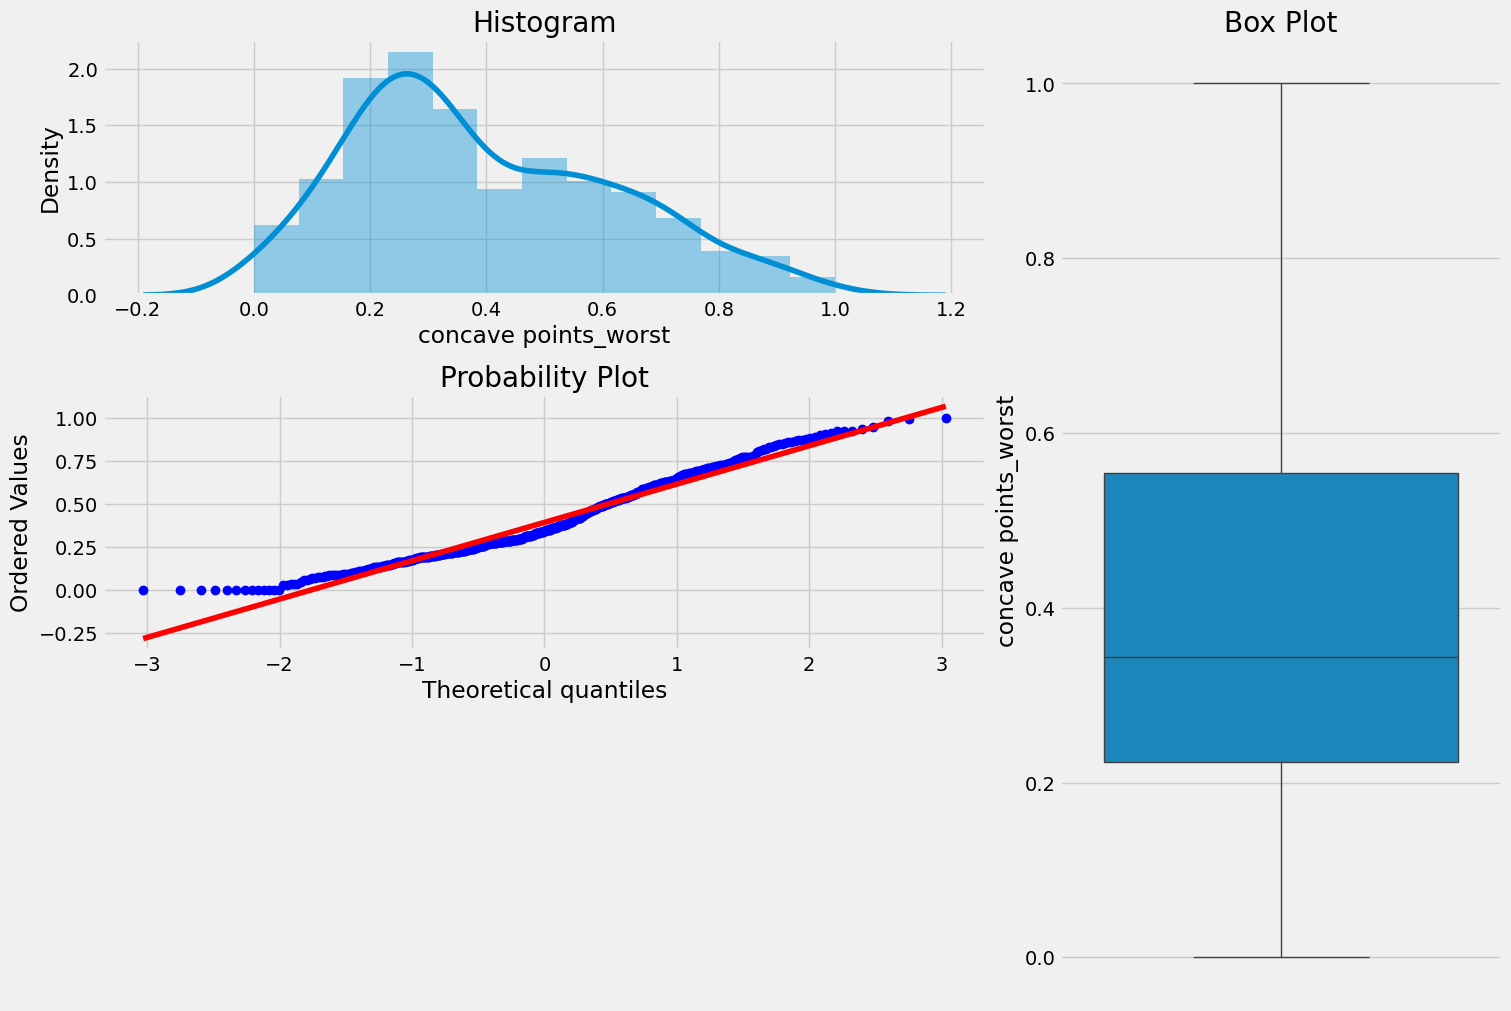

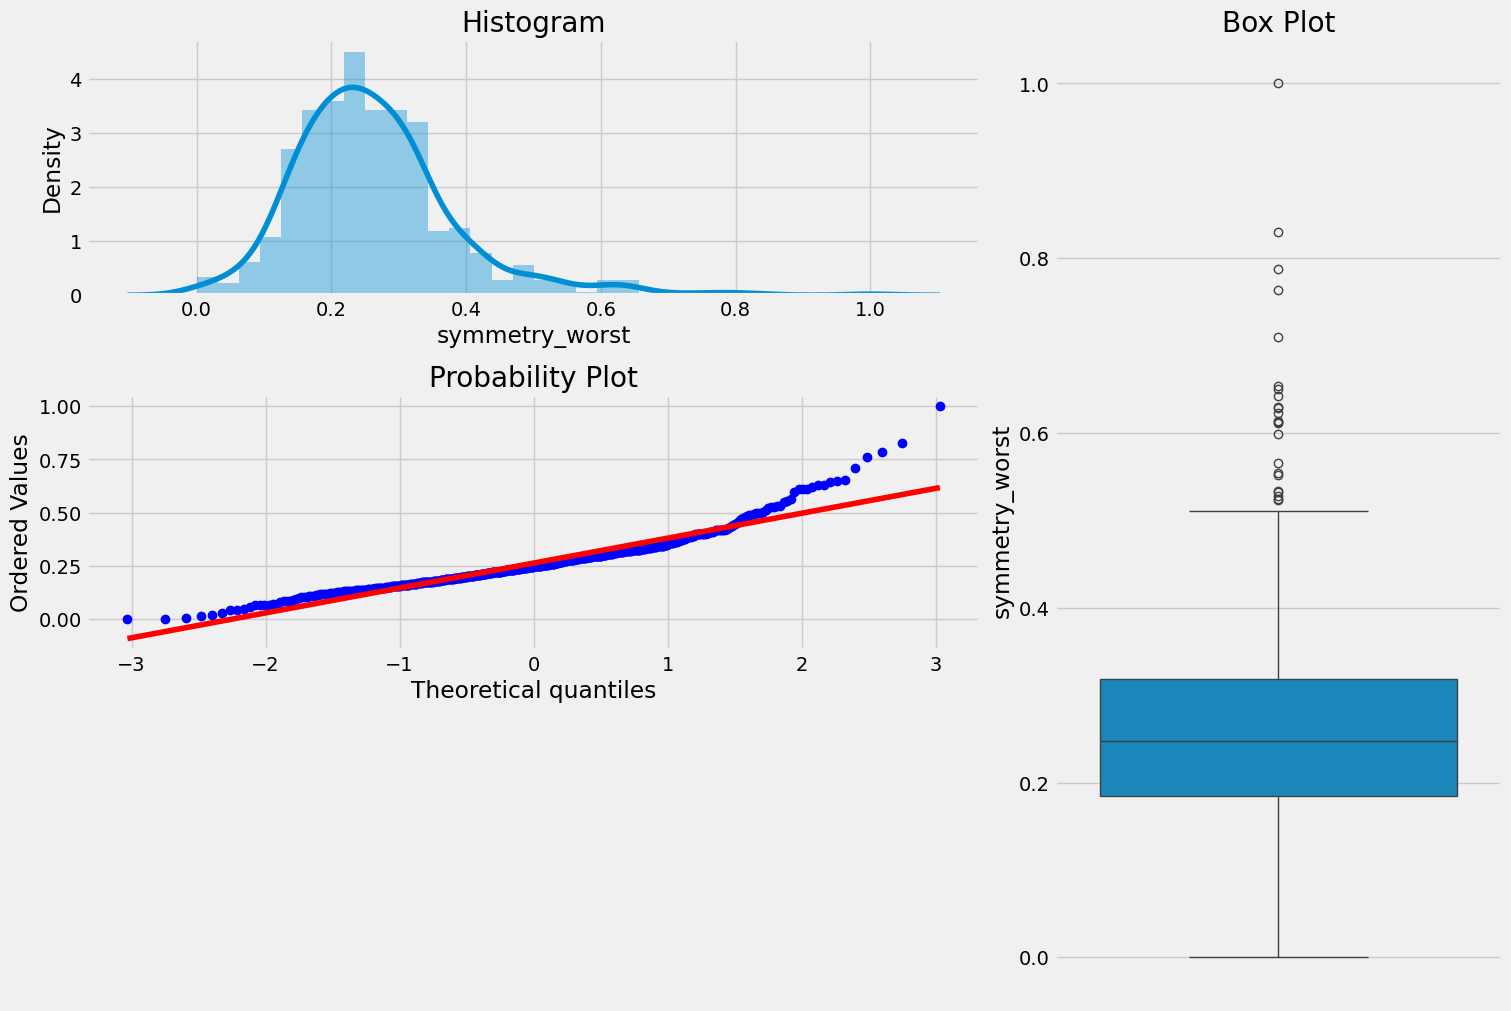

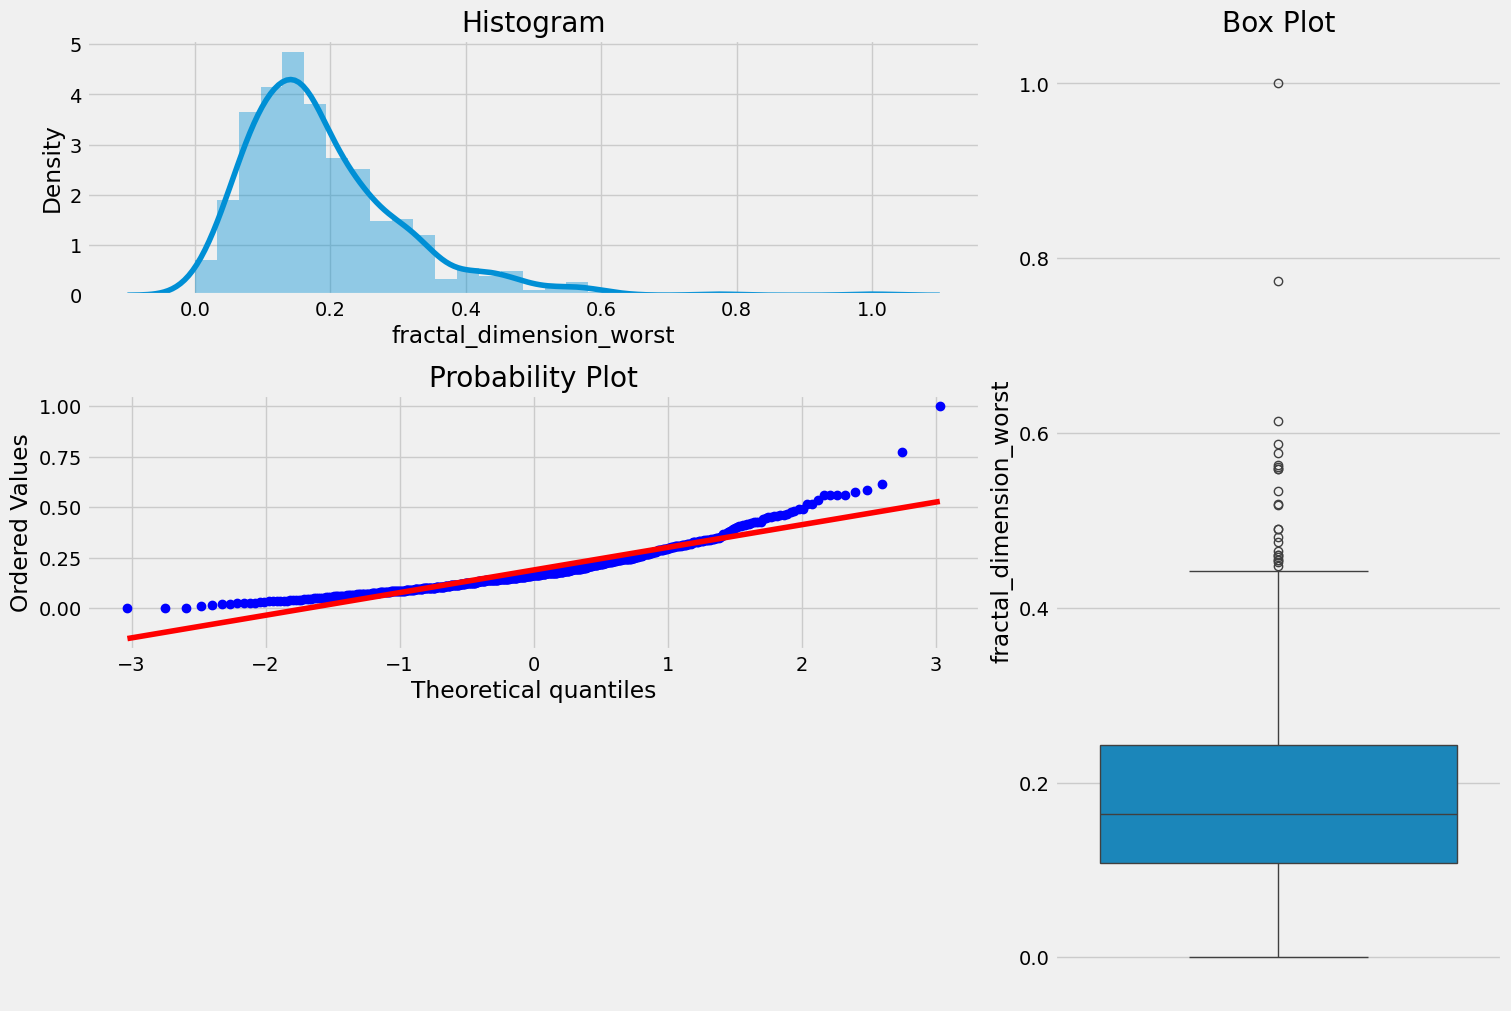

In [24]:
for i in dataset.columns[0:31]:
    plotting_3_chart(dataset,i)

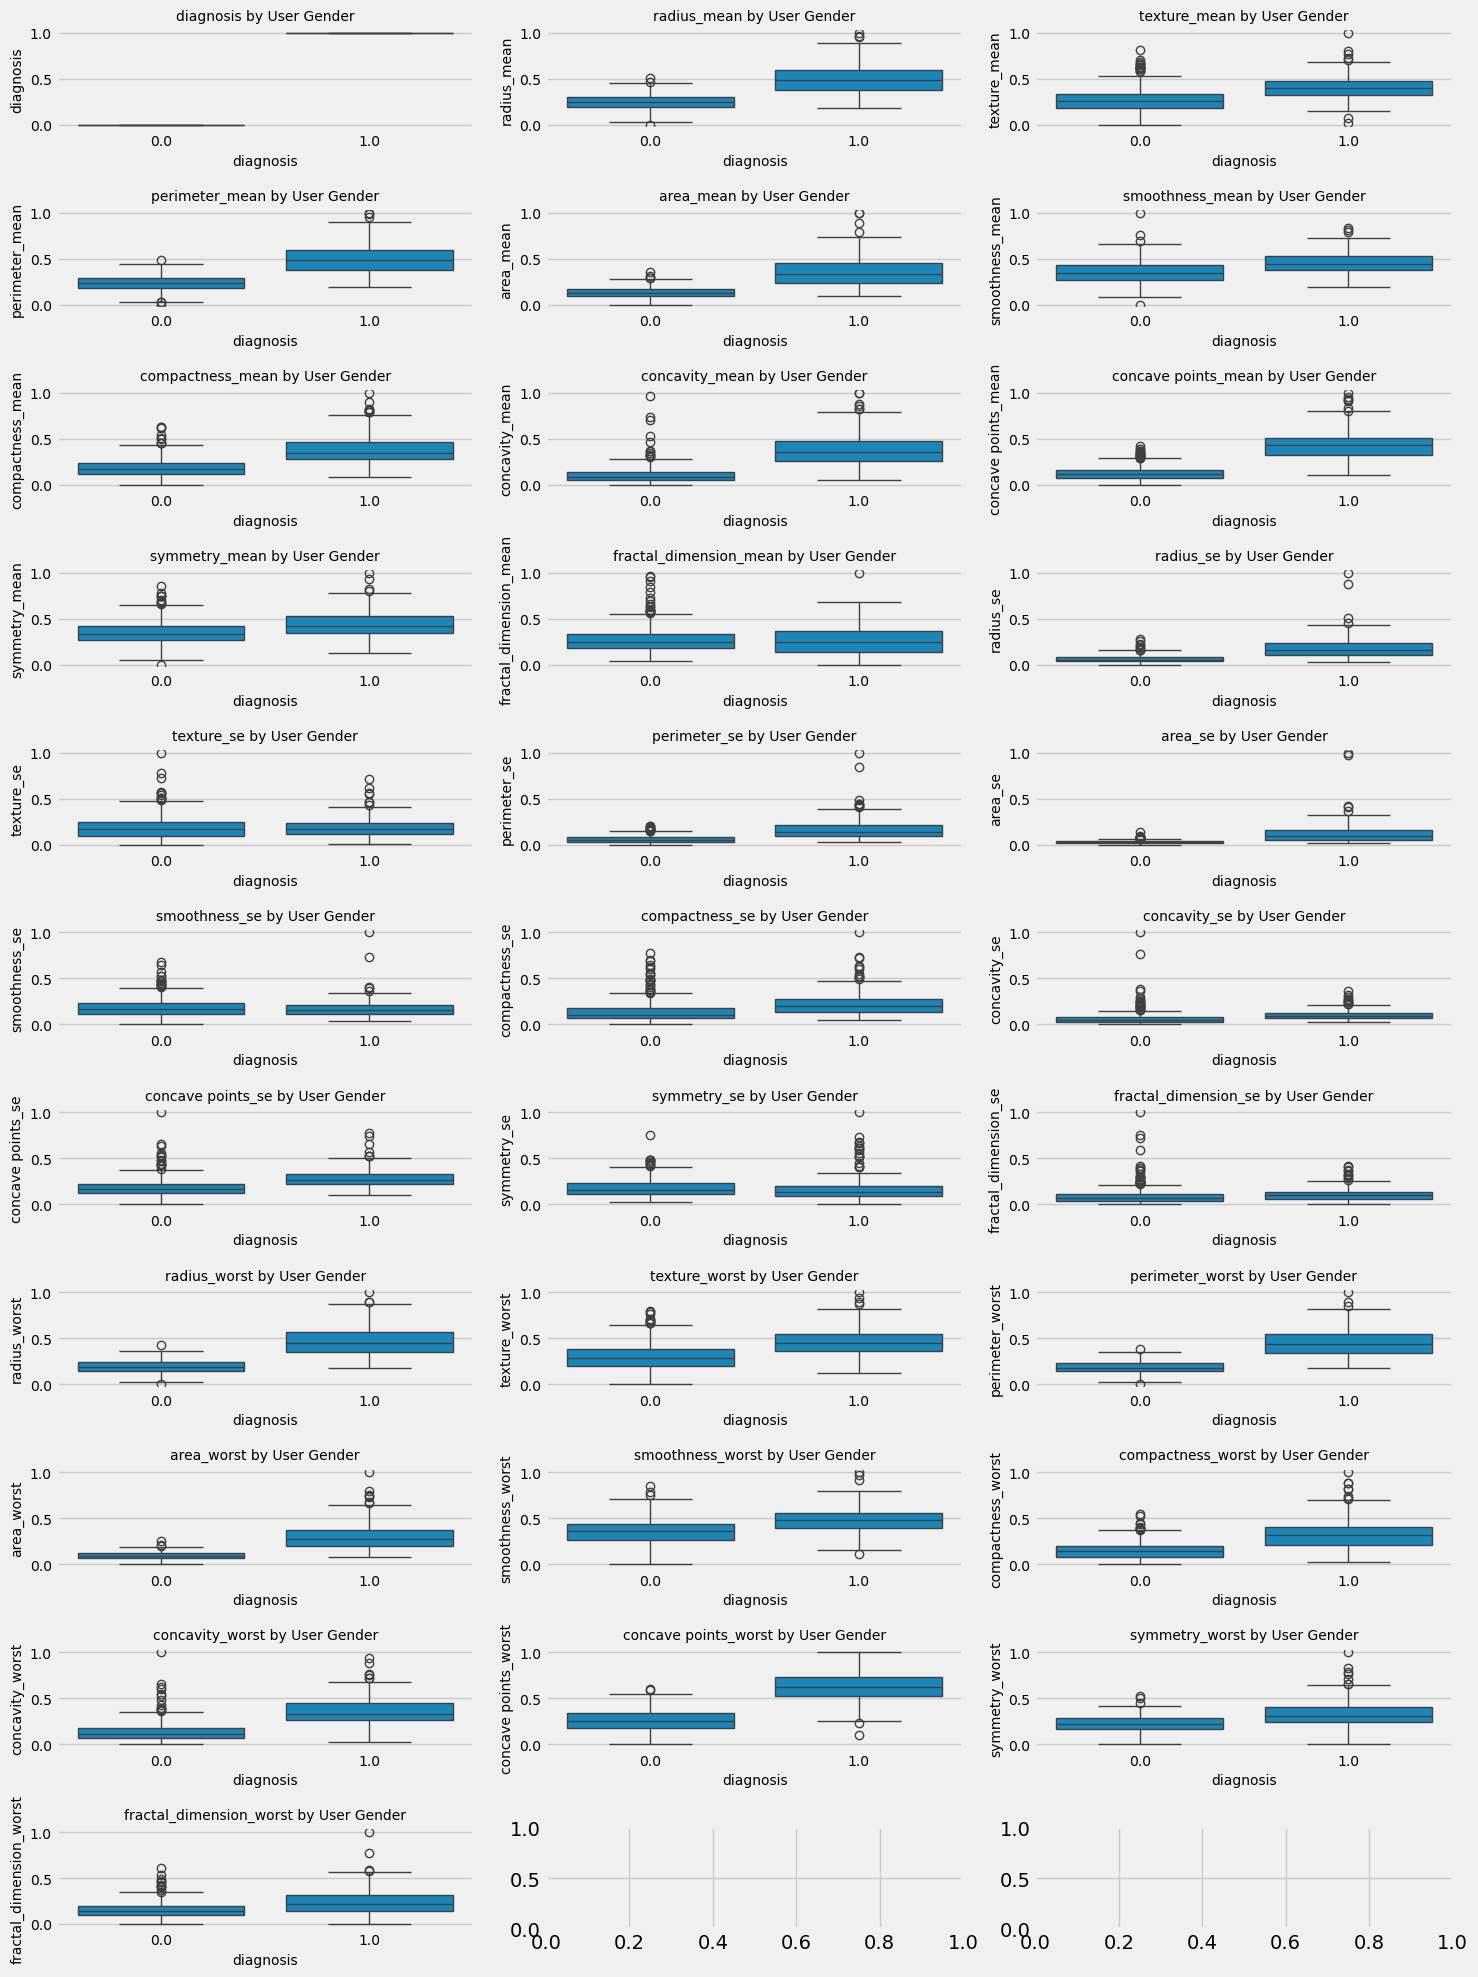

In [25]:
#numerical_columns = ['device_vector',  'programs', 'channels_vector', 'program_genre_vector', 'date','time_of_day']

fig, axes = plt.subplots(11, 3, figsize=(15, 20))

for i, column in enumerate(dataset.columns[0:31]):
    
    row = i // 3
    col = i % 3
    
    sns.boxplot(x='diagnosis', y=column, data=dataset, ax=axes[row, col])
    axes[row, col].set_title(f'{column} by User Gender', fontsize=10)
    axes[row, col].set_xlabel('diagnosis', fontsize=10)
    axes[row, col].set_ylabel(column, fontsize=10)
    axes[row, col].tick_params(labelsize=10)

plt.tight_layout()
plt.show()


## <font color=blue>Addressing Class Imbalance  </font>


In [16]:
X = dataset.drop(['diagnosis'], axis = 1)
y = dataset['diagnosis']
y.value_counts().to_frame().T

diagnosis  0.0  1.0
count      357  212

In [17]:
!pip install -U imbalanced-learn
#from imblearn.over_sampling import SMOTE
#X_resampled, y_resampled = SMOTE().fit_resample(X, y)

In [18]:
from imblearn.under_sampling import RandomUnderSampler

# Instantiate the undersampler
undersampler = RandomUnderSampler()

# Apply undersampling to your dataset
X_resampled, y_resampled = undersampler.fit_resample(X, y)

In [19]:
y_resampled.value_counts().to_frame().T

diagnosis  0.0  1.0
count      212  212

In [24]:
y_resampled

472    0.0
382    0.0
528    0.0
443    0.0
412    0.0
      ... 
563    1.0
564    1.0
565    1.0
566    1.0
567    1.0
Name: diagnosis, Length: 424, dtype: float64

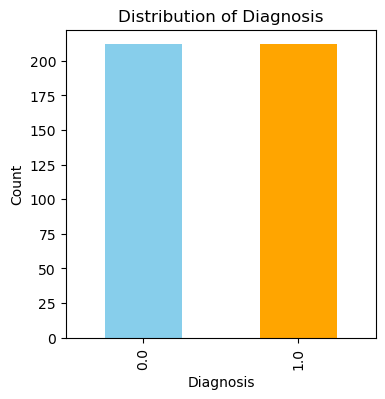

In [30]:
counts = y_resampled.value_counts()
colors = ['skyblue', 'orange', 'green', 'red']
# Plot
plt.figure(figsize=(4, 4))
counts.plot(kind='bar',color=colors)
plt.title('Distribution of Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

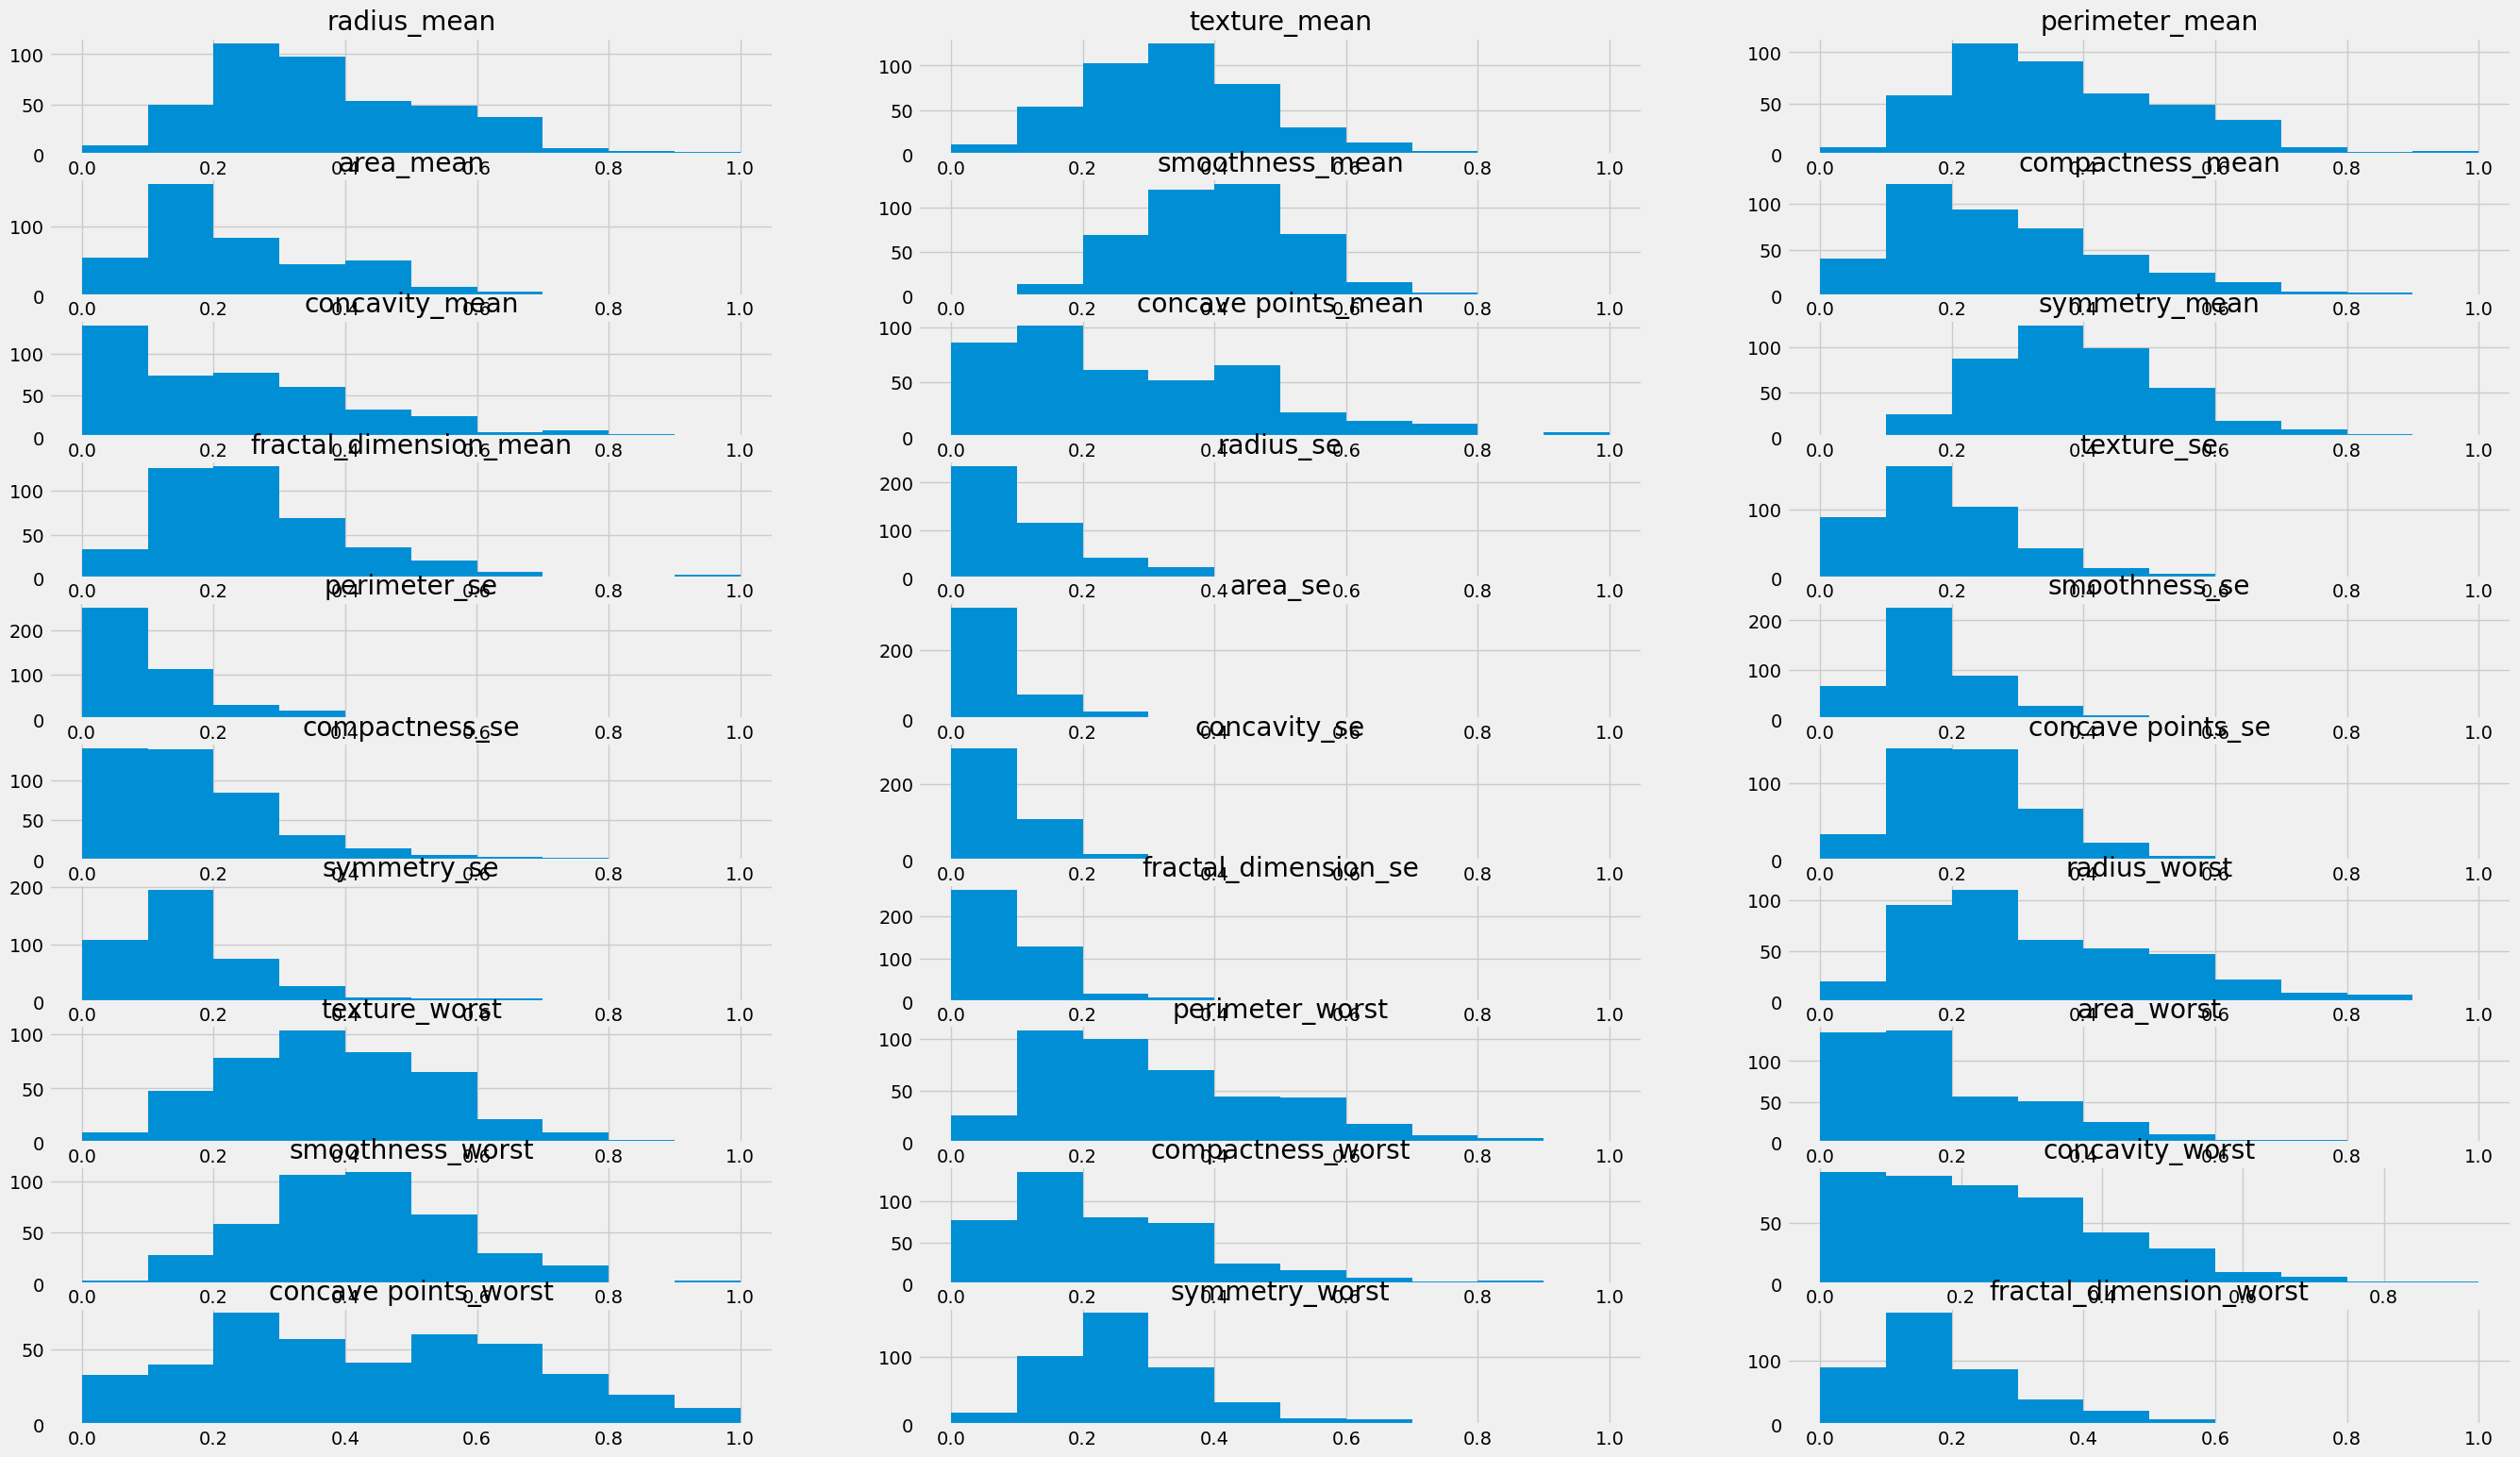

In [31]:
plt.figure(figsize=(30,20))
for i,feature in enumerate(X_resampled):
    plt.subplot(11,3,i+1)
    X_resampled[feature].hist()
    plt.title(feature)

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# Instantiate the random forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
rf.fit(X_resampled, y_resampled)

# Use feature importances from the random forest to select features
selector = SelectFromModel(rf, threshold="mean", prefit=True)  # Use mean importance as threshold
selected_features = X_resampled.columns[selector.get_support()]

print("Selected features:", selected_features)

Selected features: Index(['radius_mean', 'area_mean', 'concavity_mean', 'concave points_mean',
       'radius_worst', 'perimeter_worst', 'area_worst', 'concave points_worst',
       'diagnosis'],
      dtype='object')


In [61]:
X_selected = X_resampled[selected_features]

In [62]:
new_dataset = X_selected.copy()


In [63]:
new_dataset

radius_mean  area_mean  concavity_mean  concave points_mean  \
419     0.197785   0.100445        0.020982             0.053479   
340     0.352075   0.211113        0.187605             0.209891   
225     0.348289   0.211113        0.134114             0.228777   
382     0.239907   0.129077        0.186106             0.148012   
273     0.130673   0.062100        0.025843             0.069930   
..           ...        ...             ...                  ...   
563     0.659709   0.510498        0.743674             0.732604   
564     0.690000   0.566490        0.571462             0.690358   
565     0.622320   0.474019        0.337395             0.486630   
566     0.455251   0.303118        0.216753             0.263519   
567     0.644564   0.475716        0.823336             0.755467   

     radius_worst  perimeter_worst  area_worst  concave points_worst  \
419      0.157595         0.143682    0.067047              0.147973   
340      0.310921         0.303750    0.166364              0.485911   
225      0.314479         0.298770    0.169092              0.373540   
382      0.165066         0.184023    0.074518              0.375258   
273      0.100320         0.088052    0.041781              0.177285   
..            ...              ...         ...                   ...   
563      0.581999         0.640918    0.401543              0.873540   
564      0.623266         0.576174    0.452664              0.761512   
565      0.560655         0.520892    0.379915              0.559450   
566      0.393099         0.379949    0.230731              0.487285   
567      0.633582         0.668310    0.402035              0.910653   

     diagnosis  
419        0.0  
340        0.0  
225        0.0  
382        0.0  
273        0.0  
..         ...  
563        1.0  
564        1.0  
565        1.0  
566        1.0  
567        1.0  

[424 rows x 9 columns]

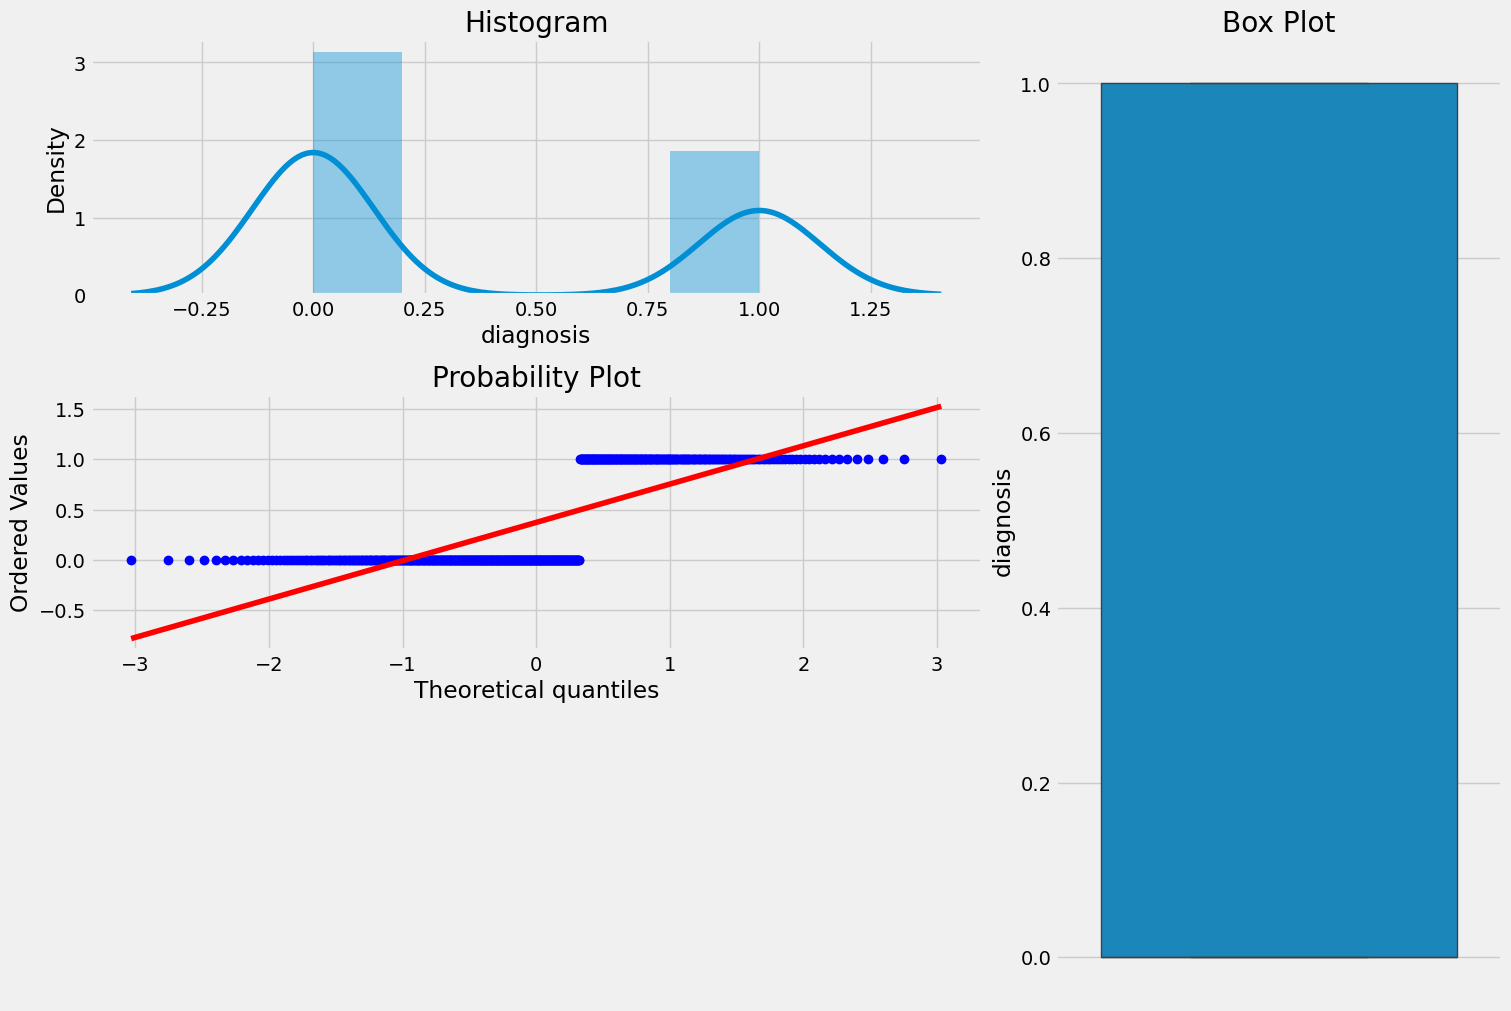

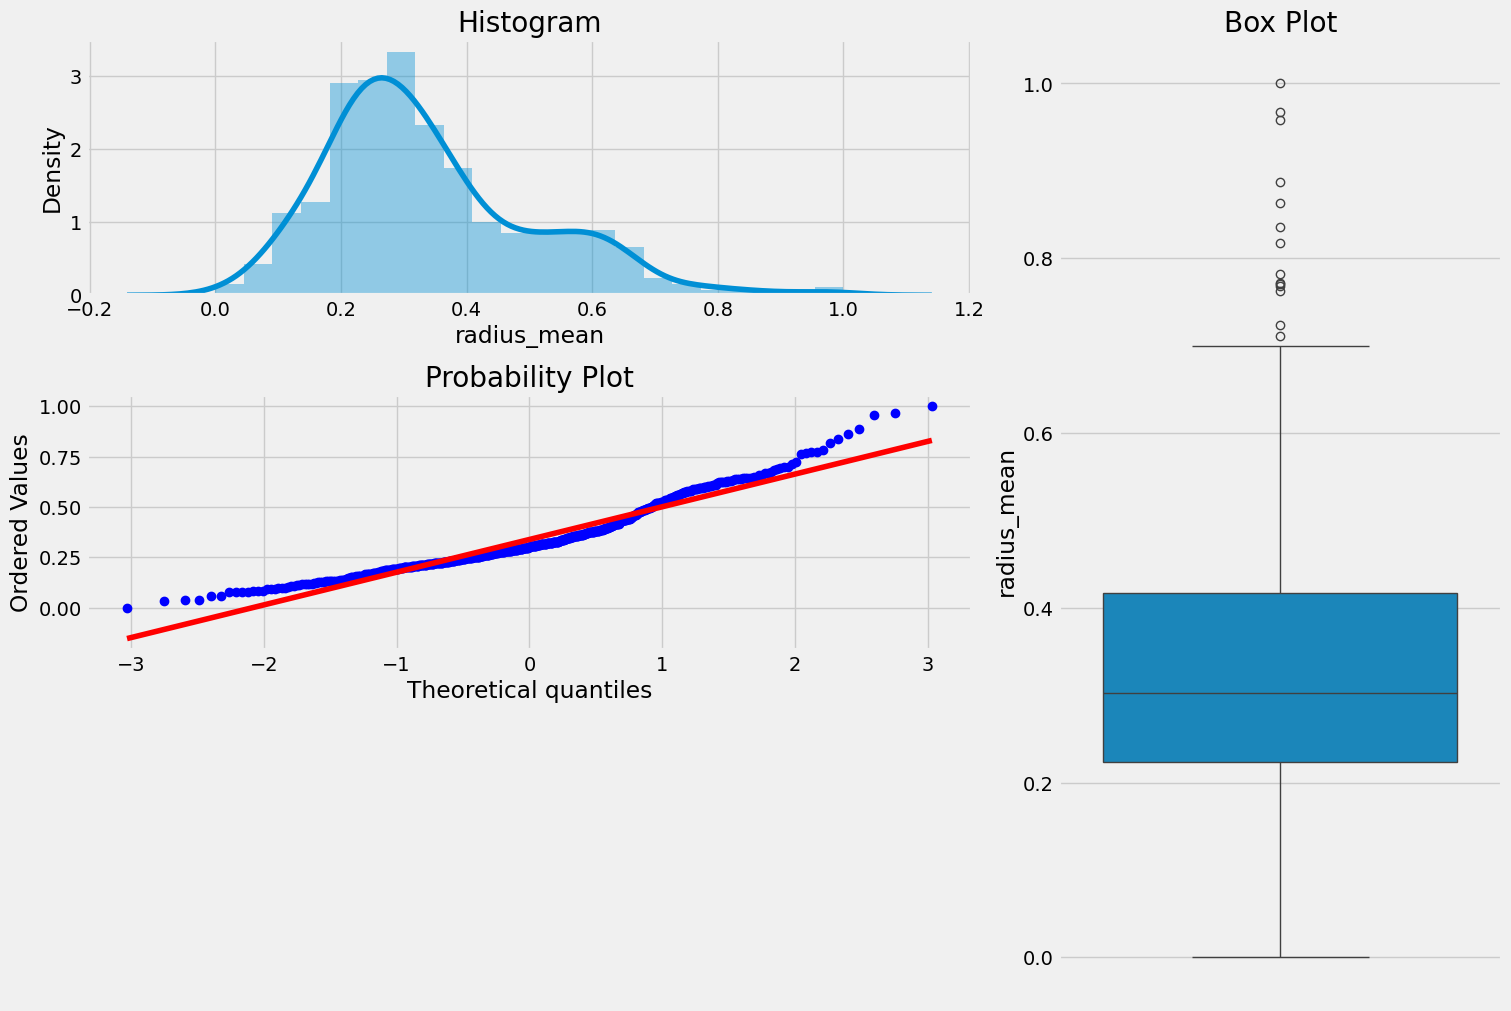

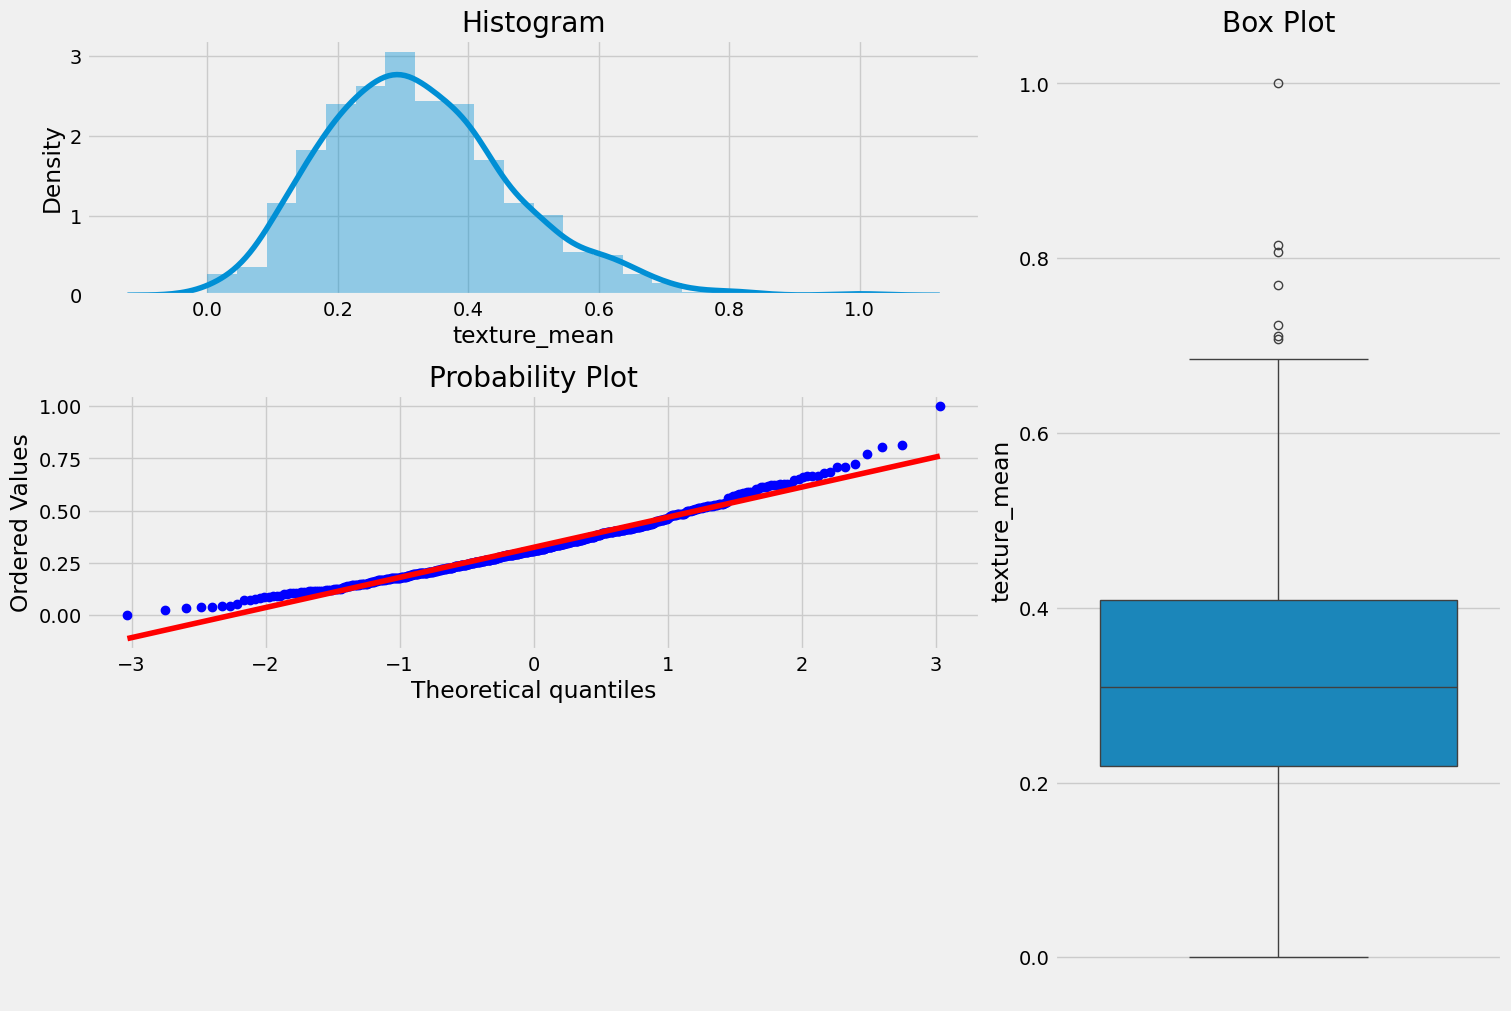

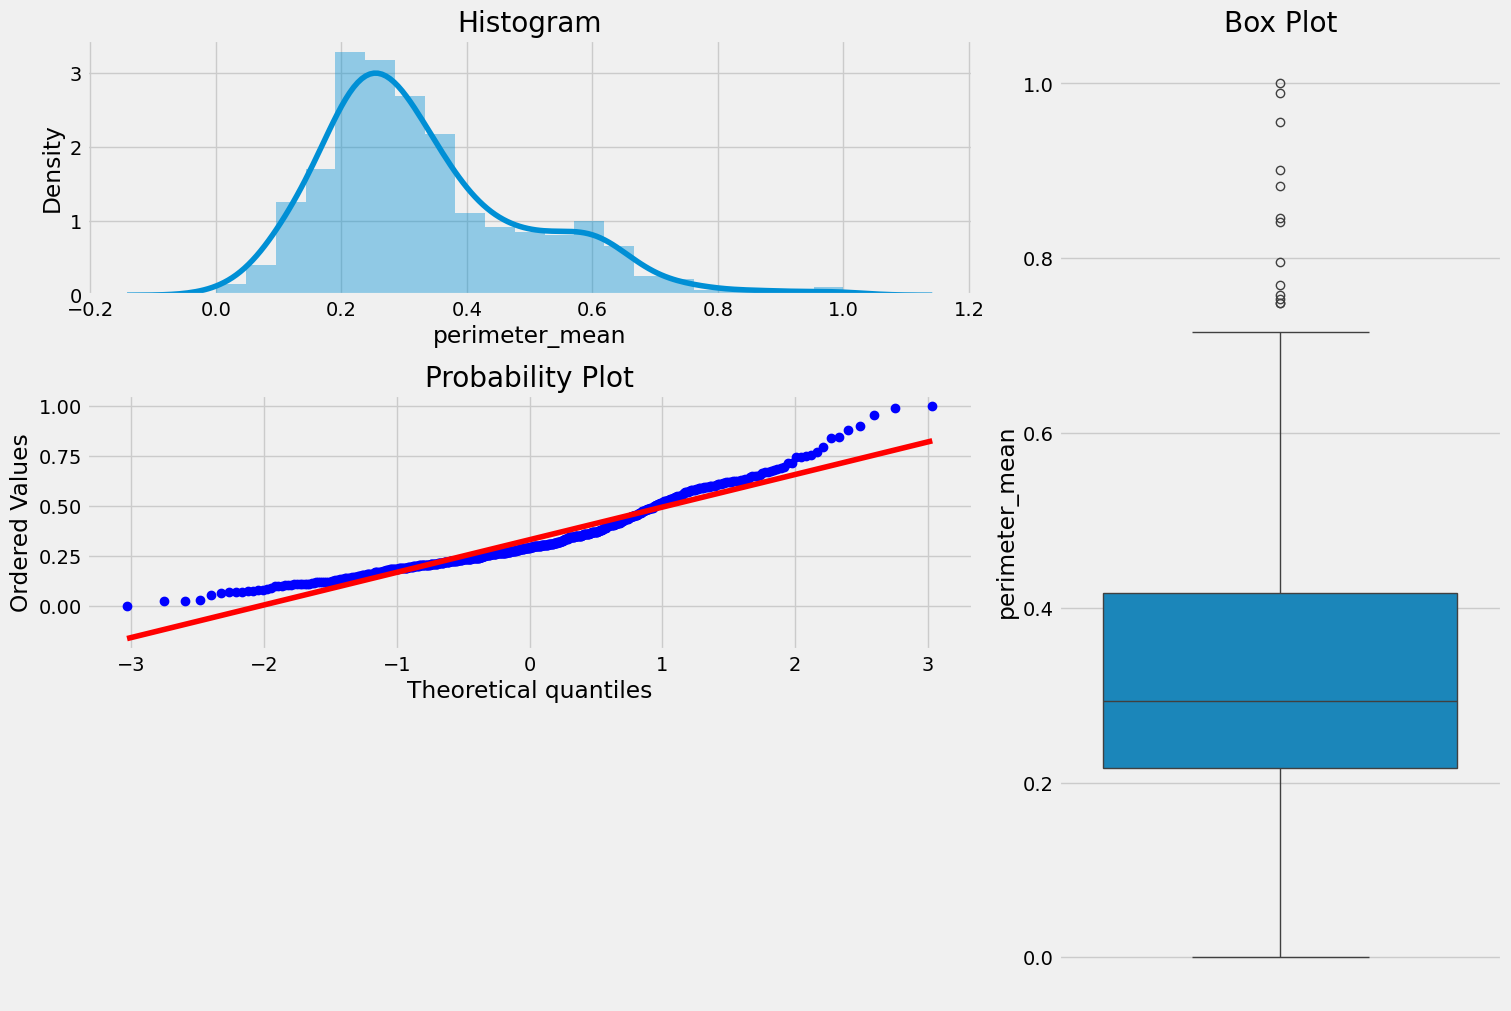

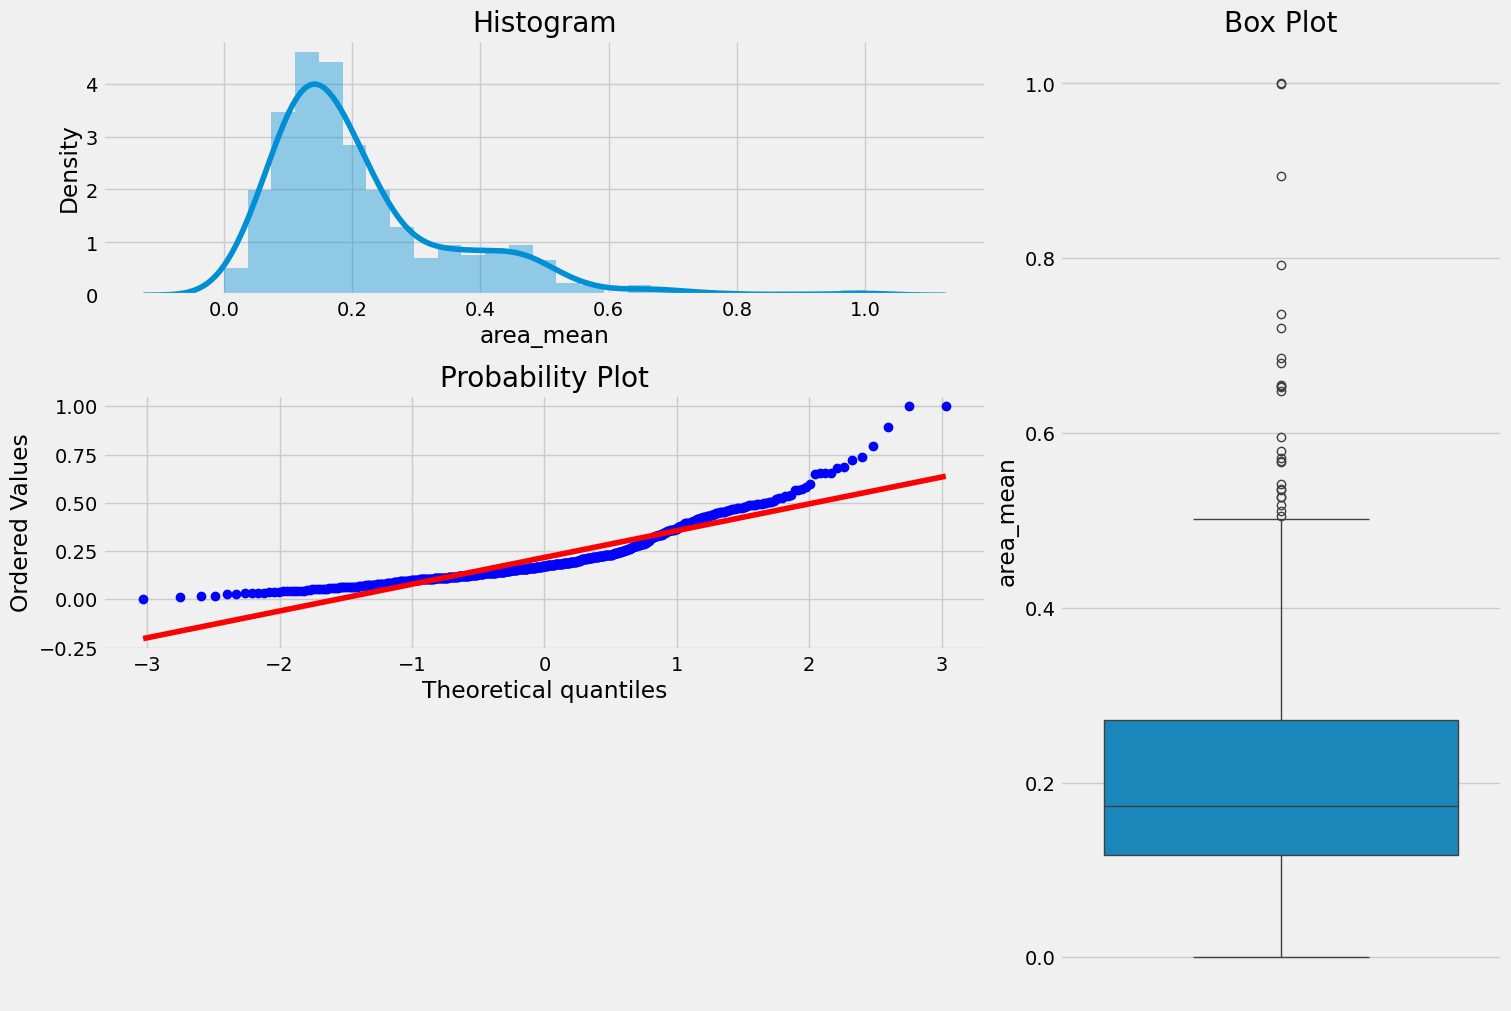

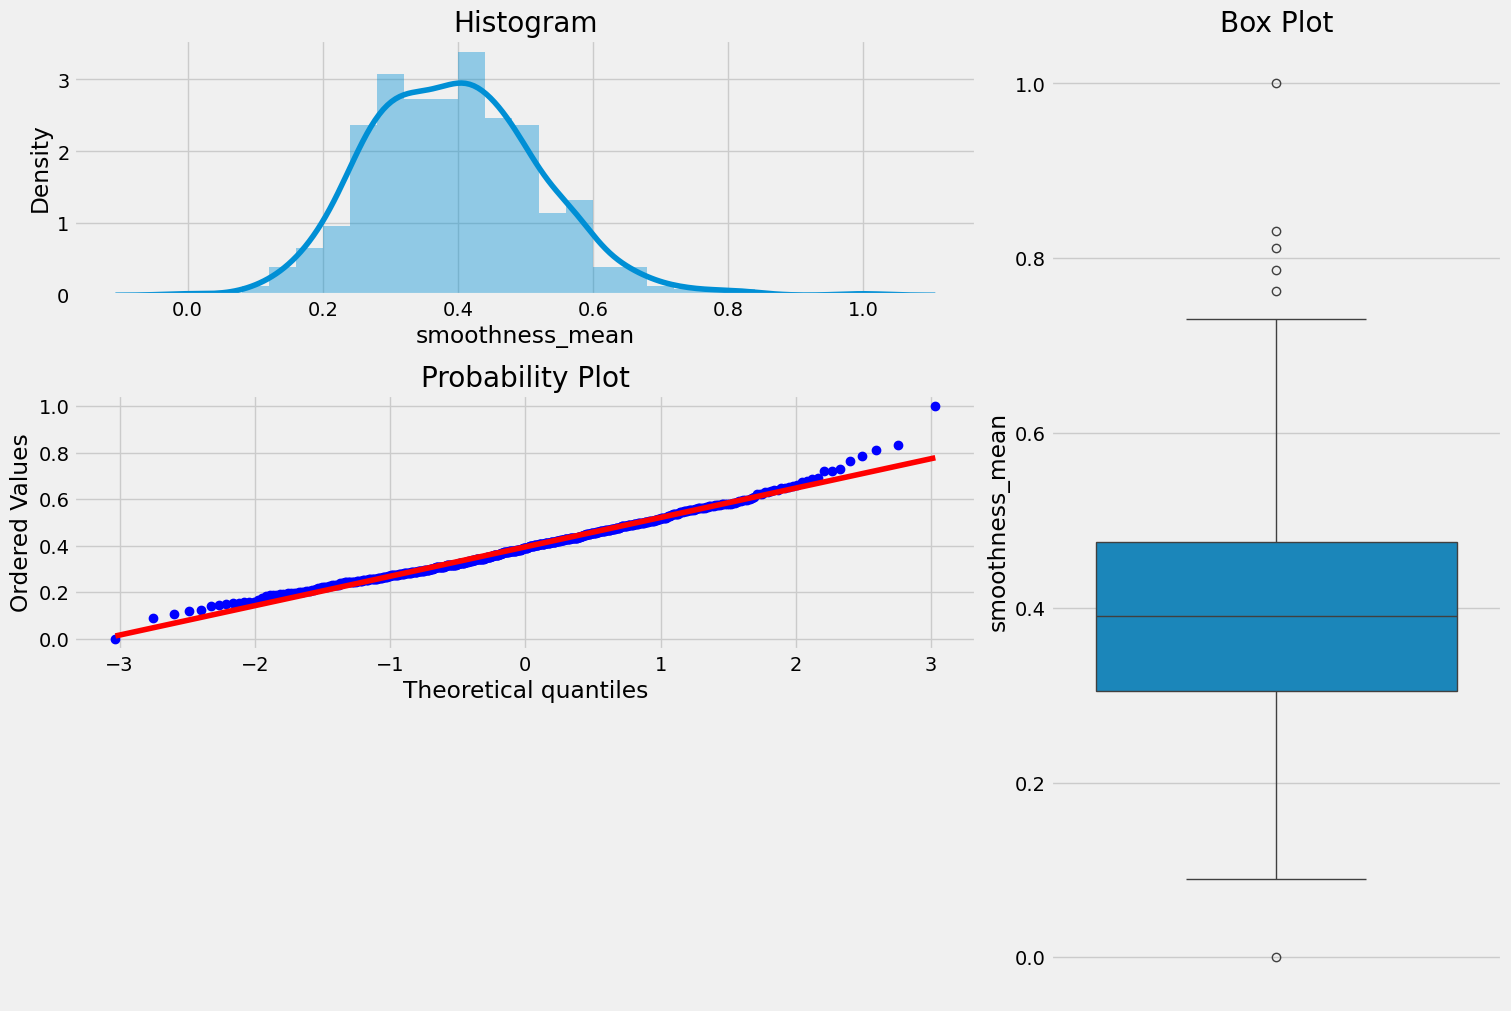

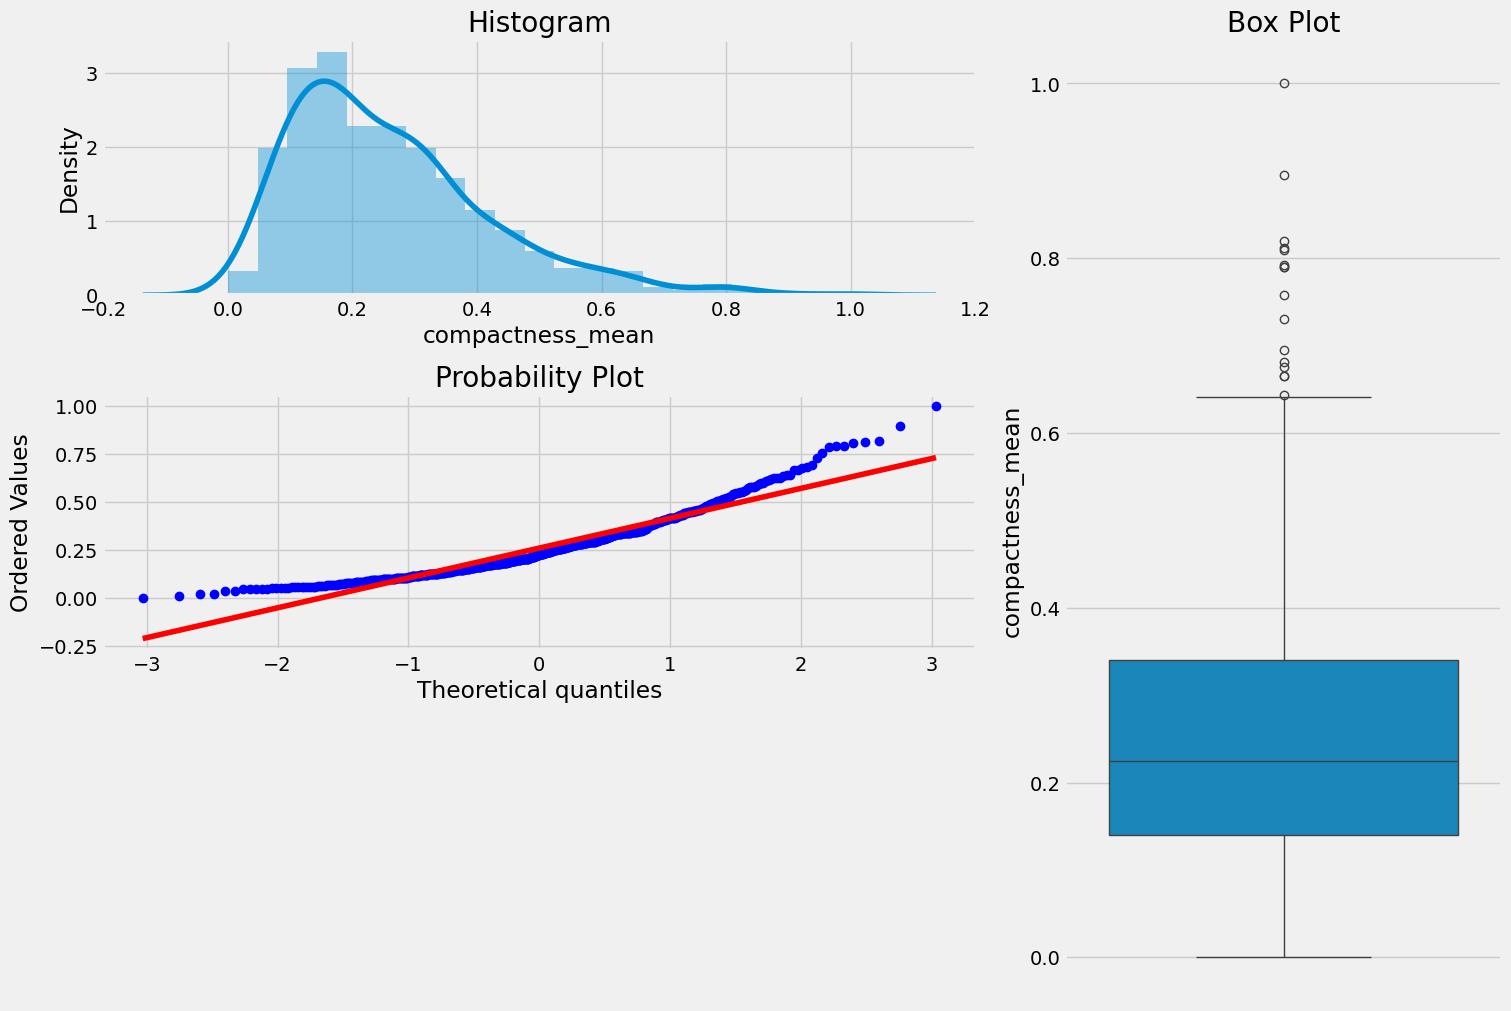

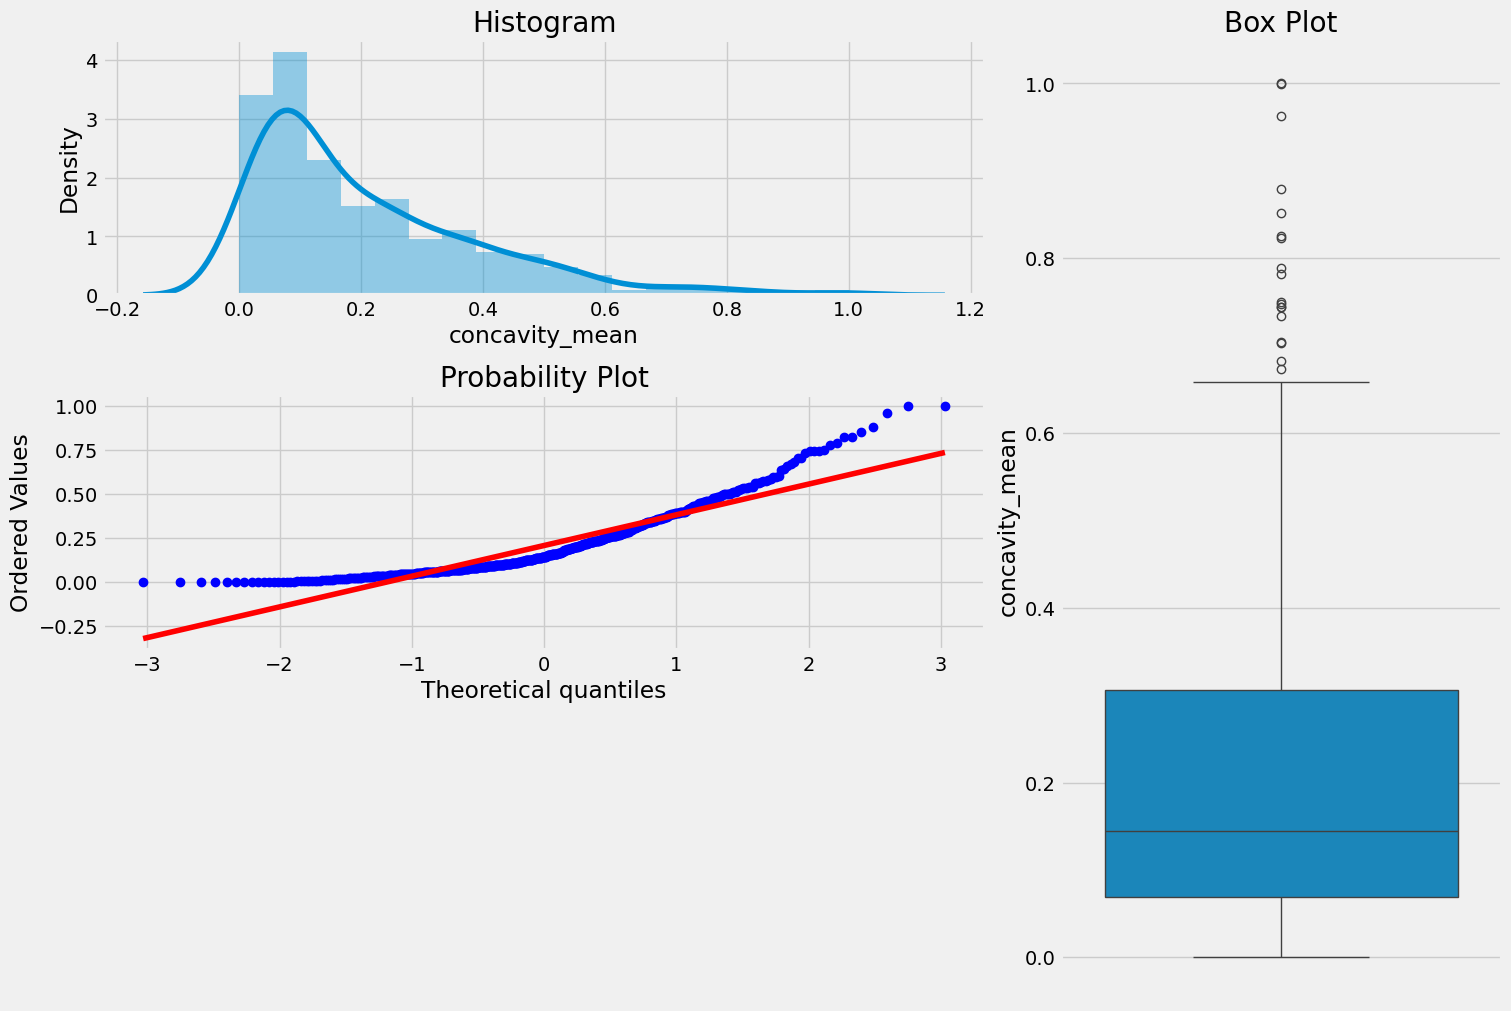

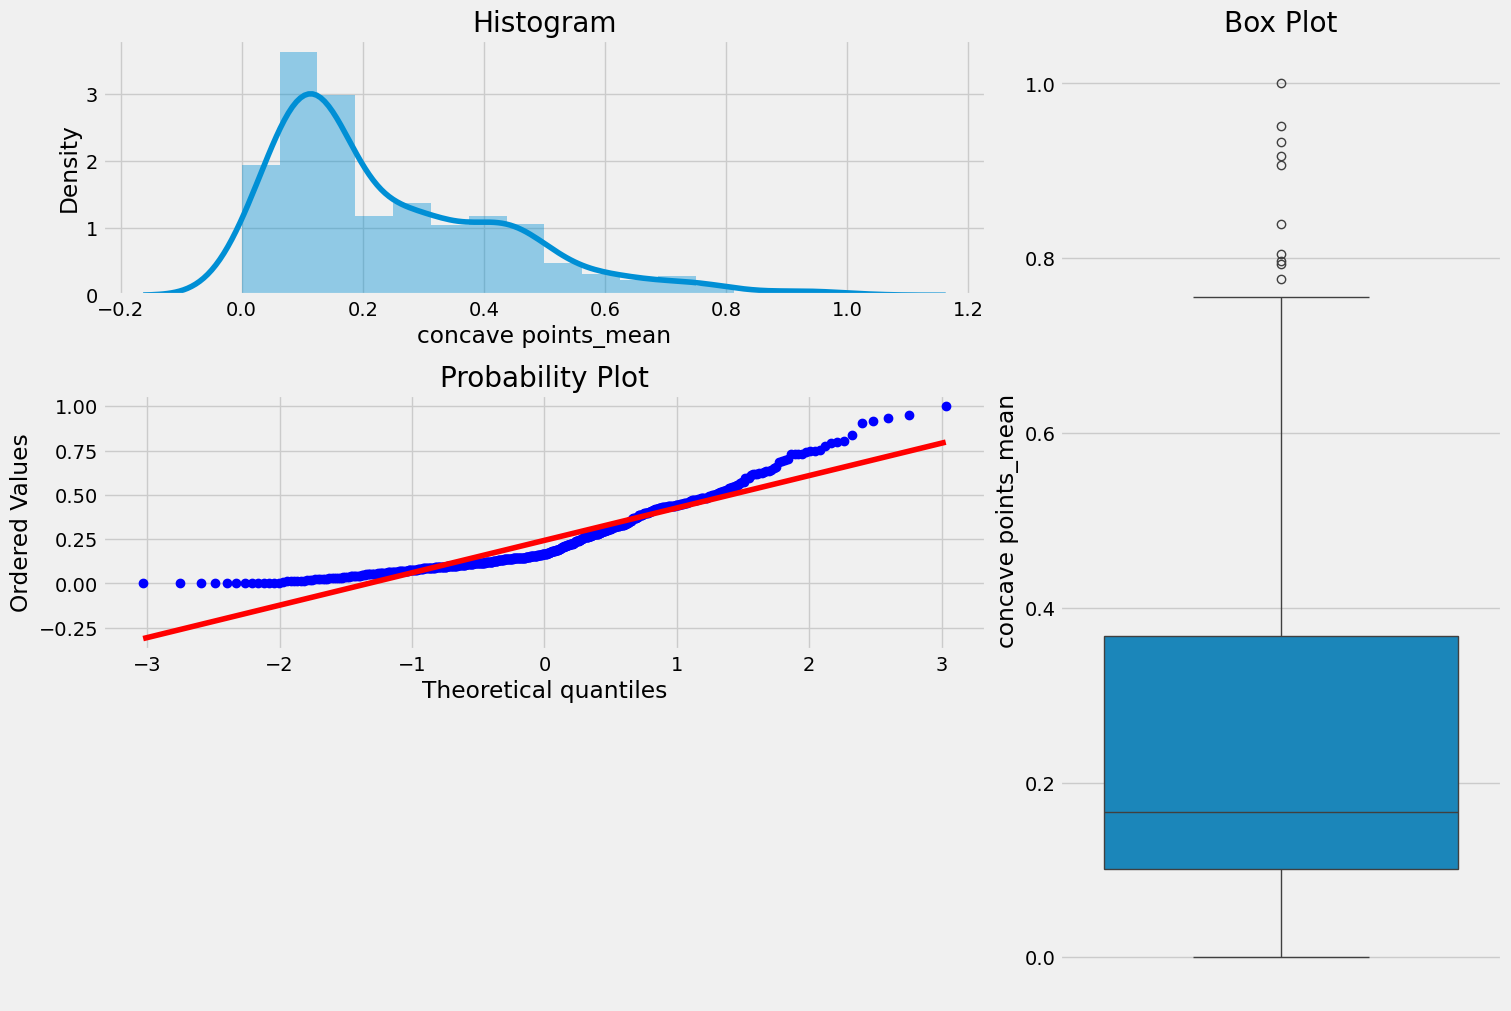

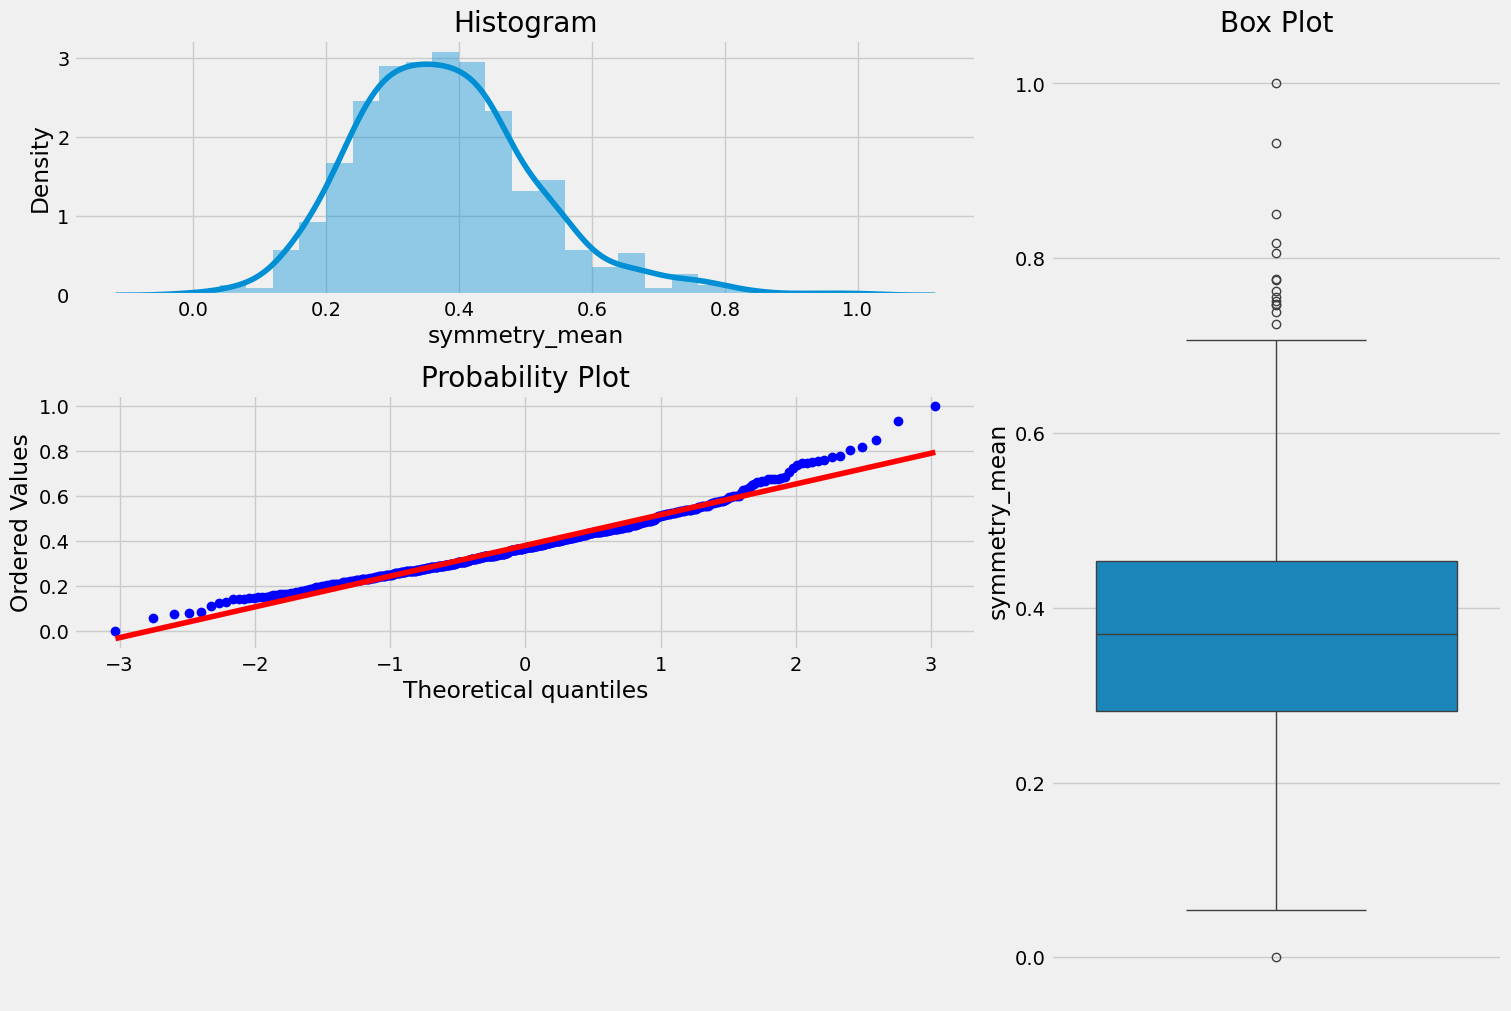

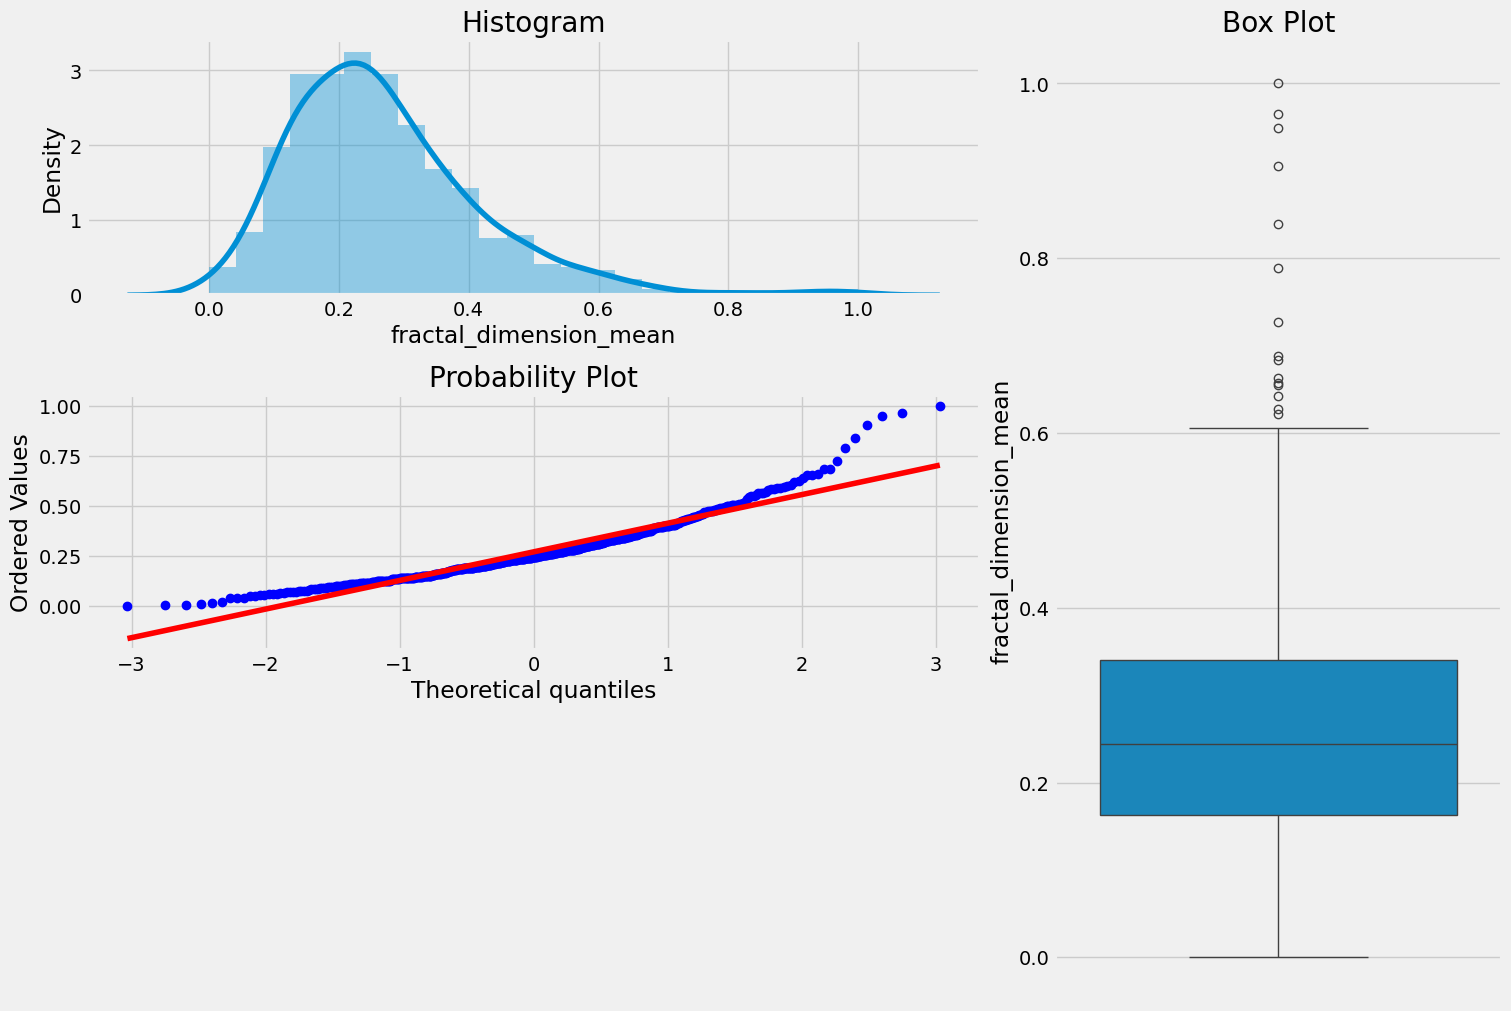

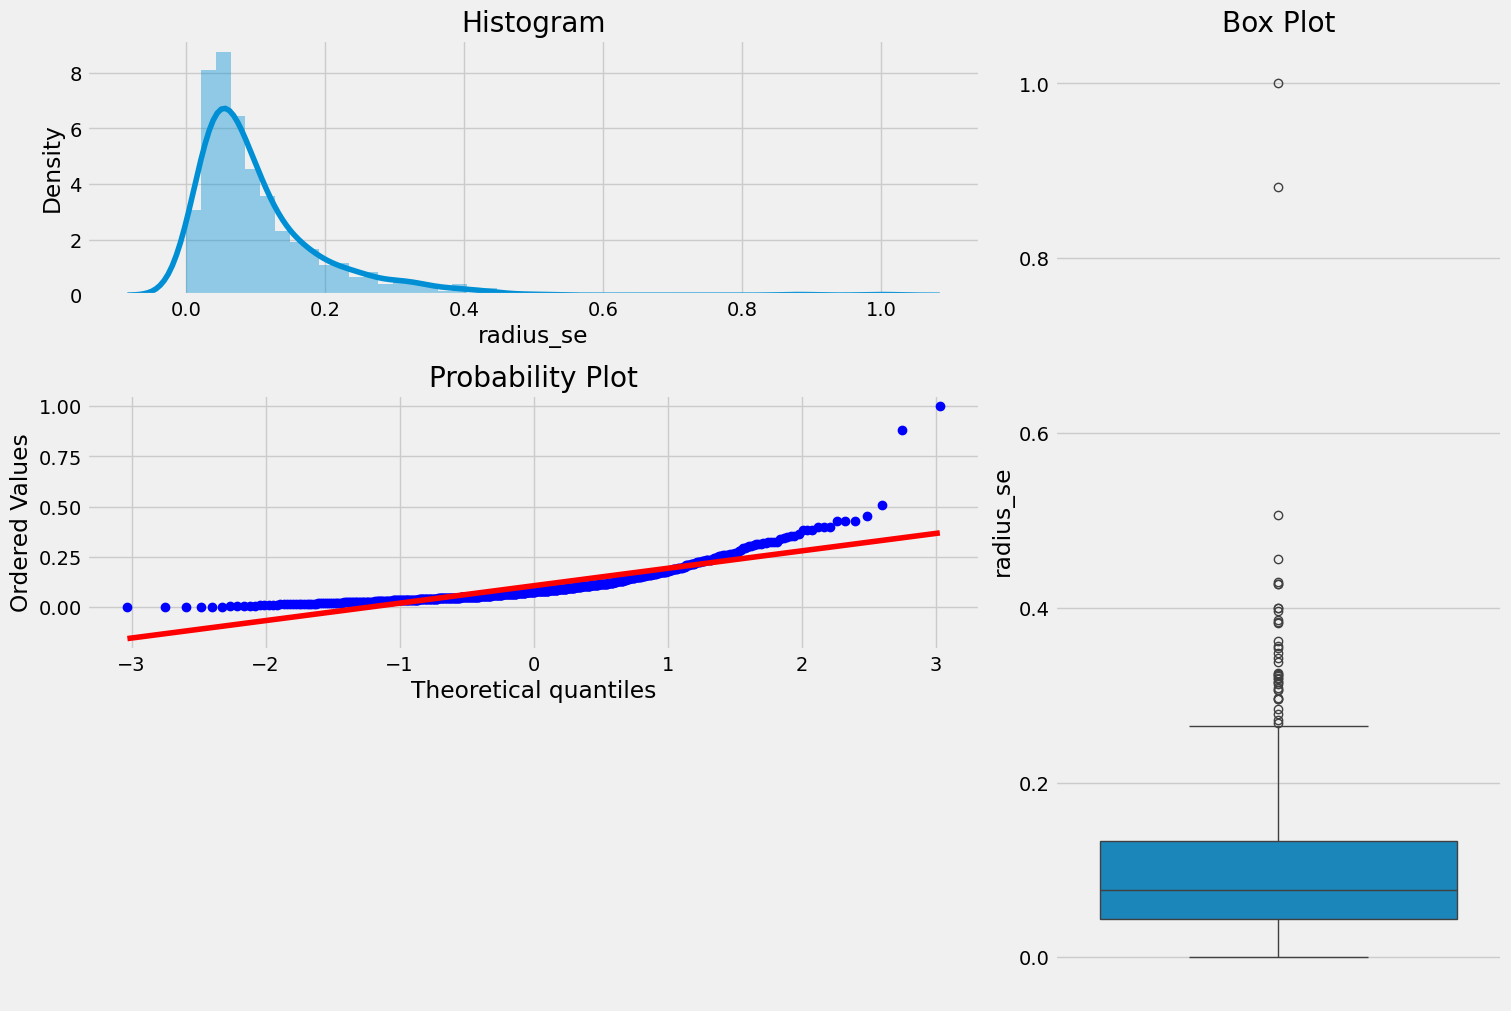

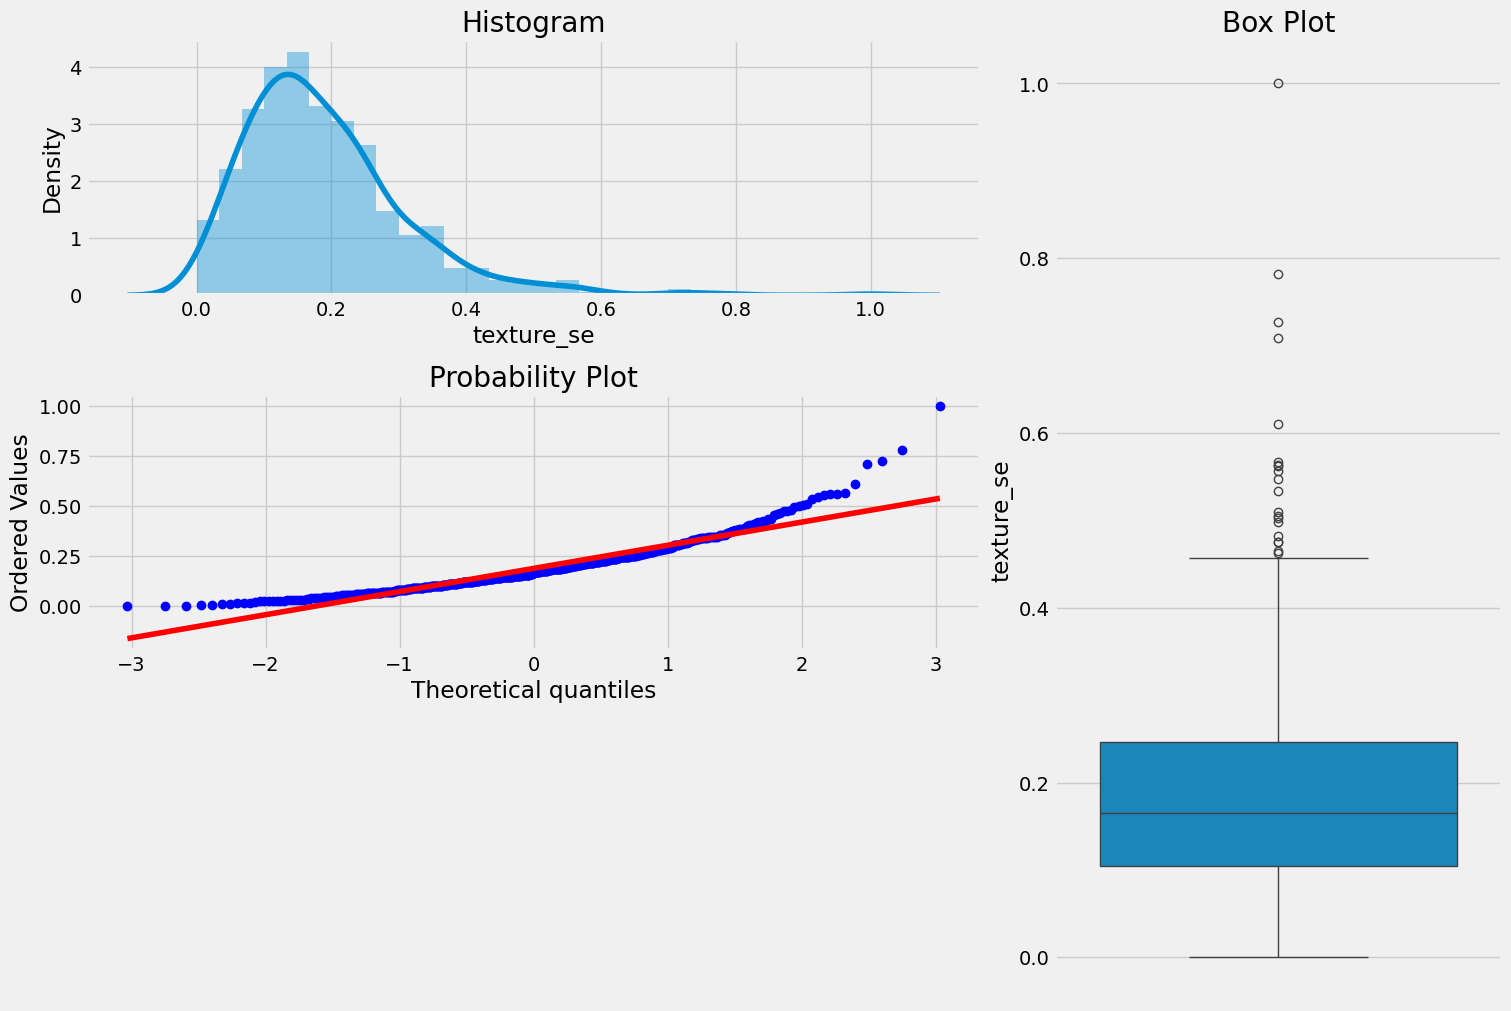

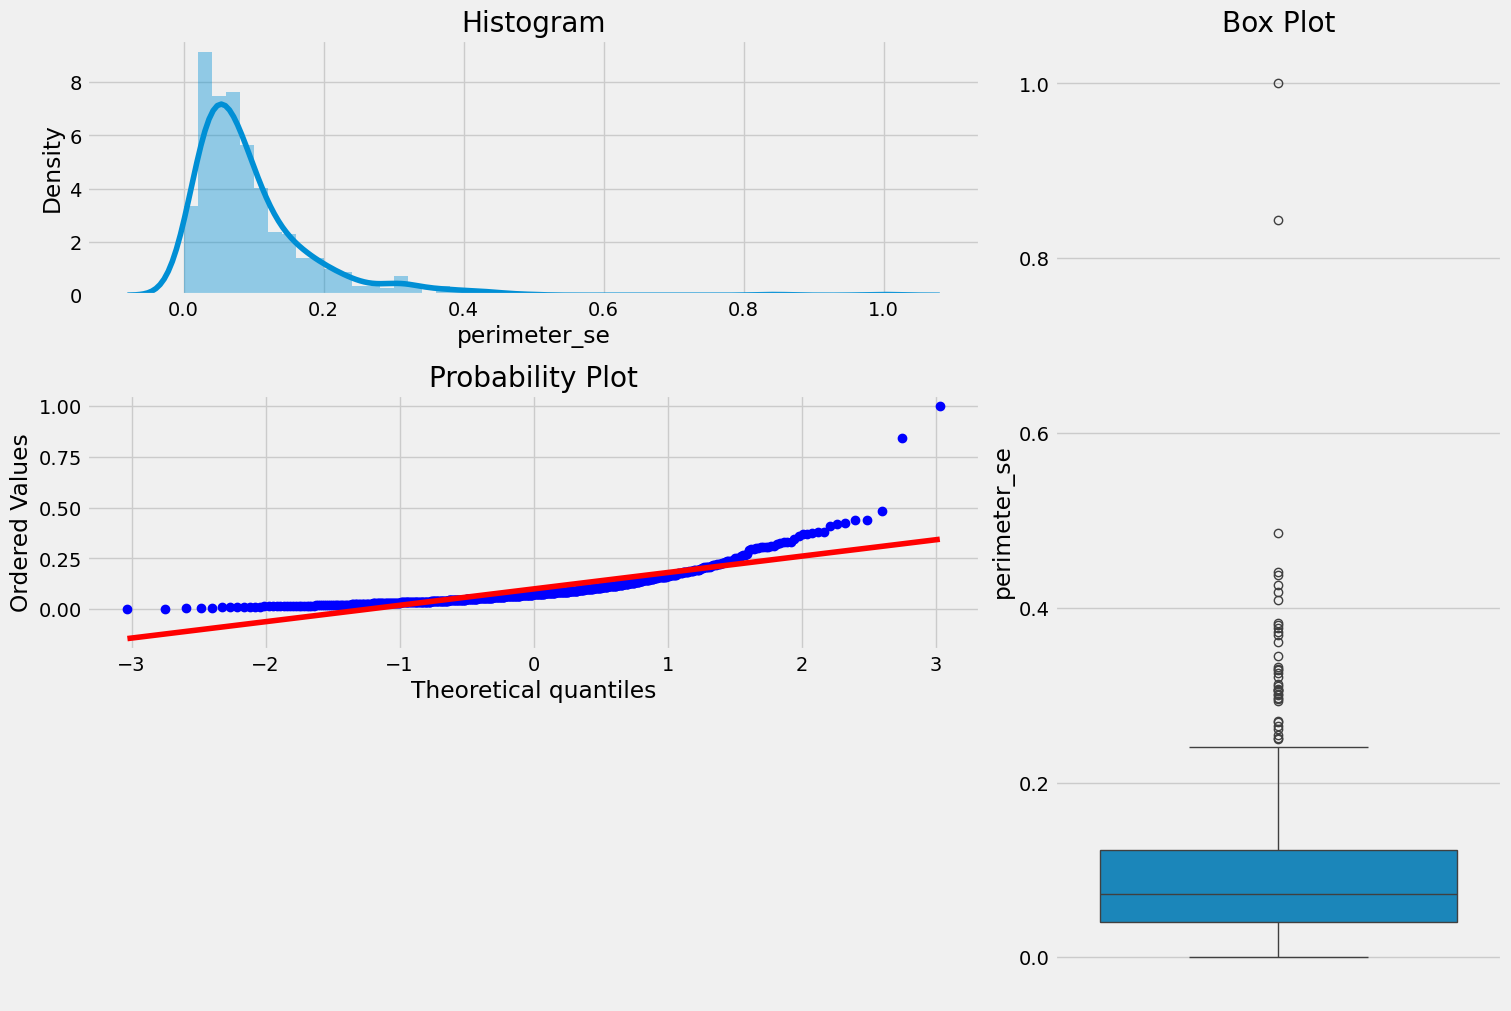

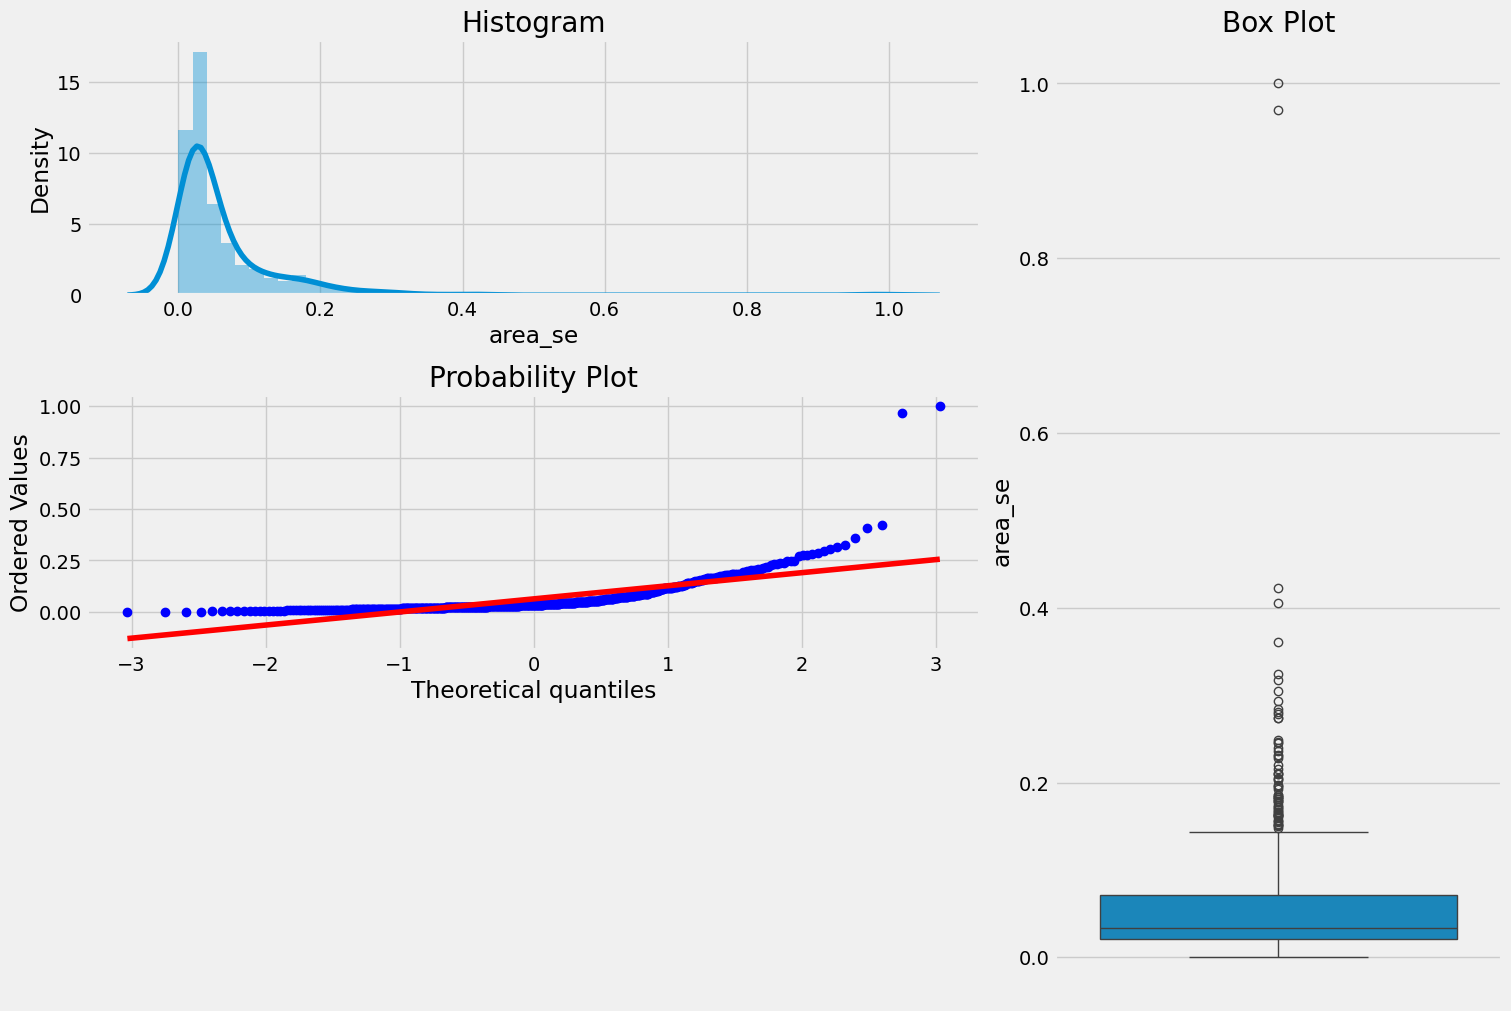

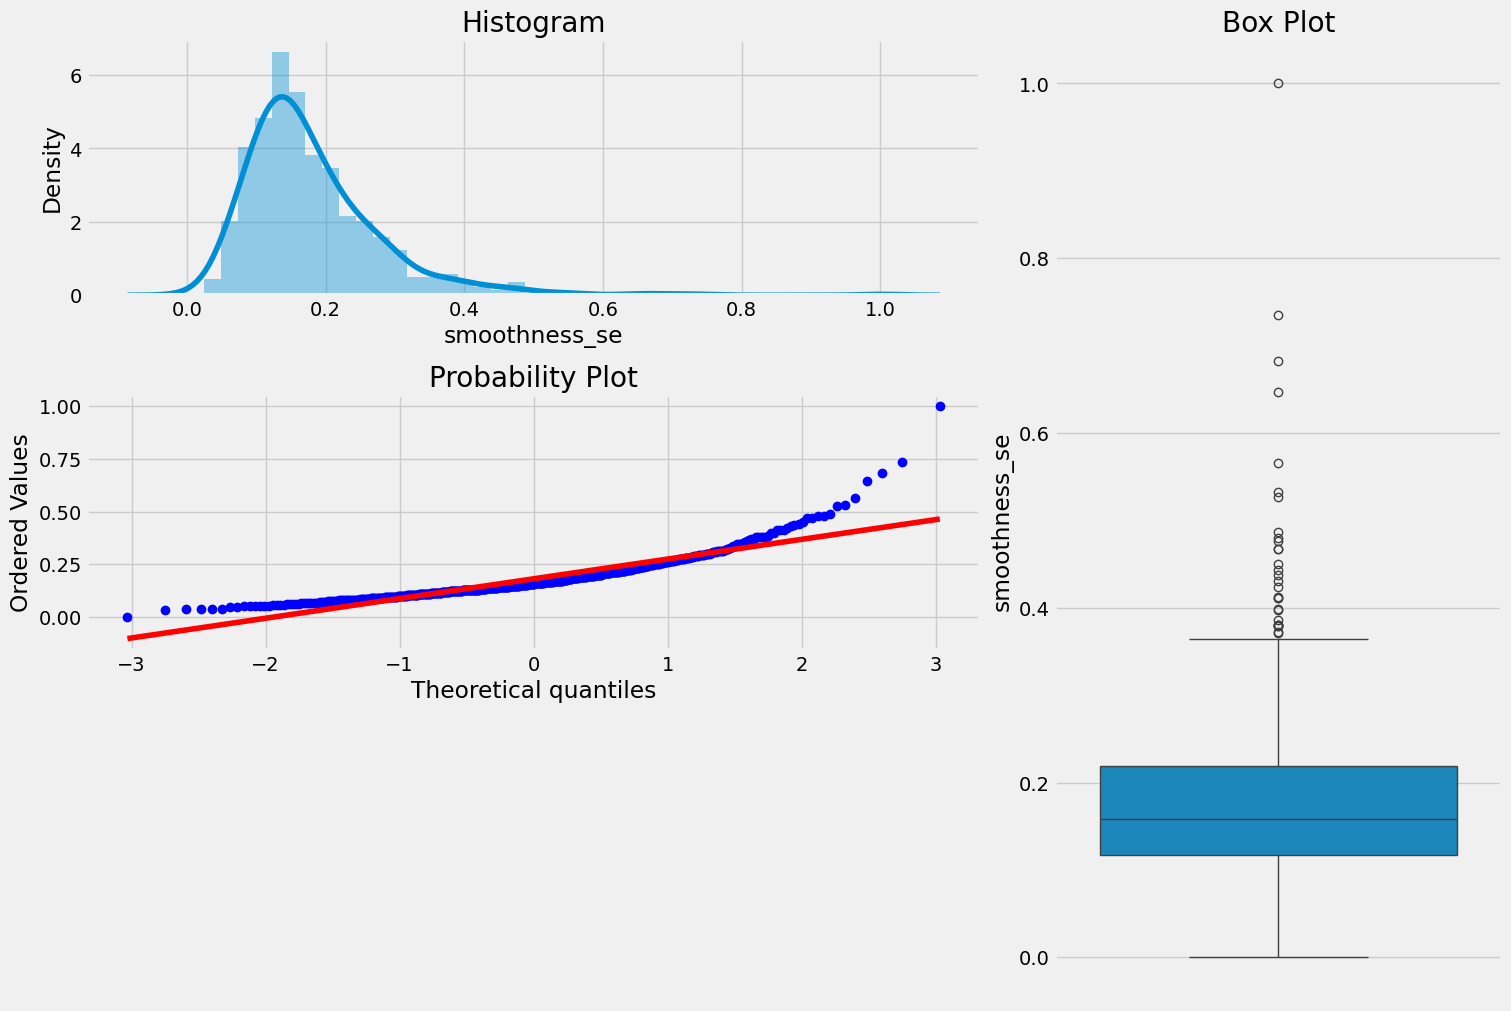

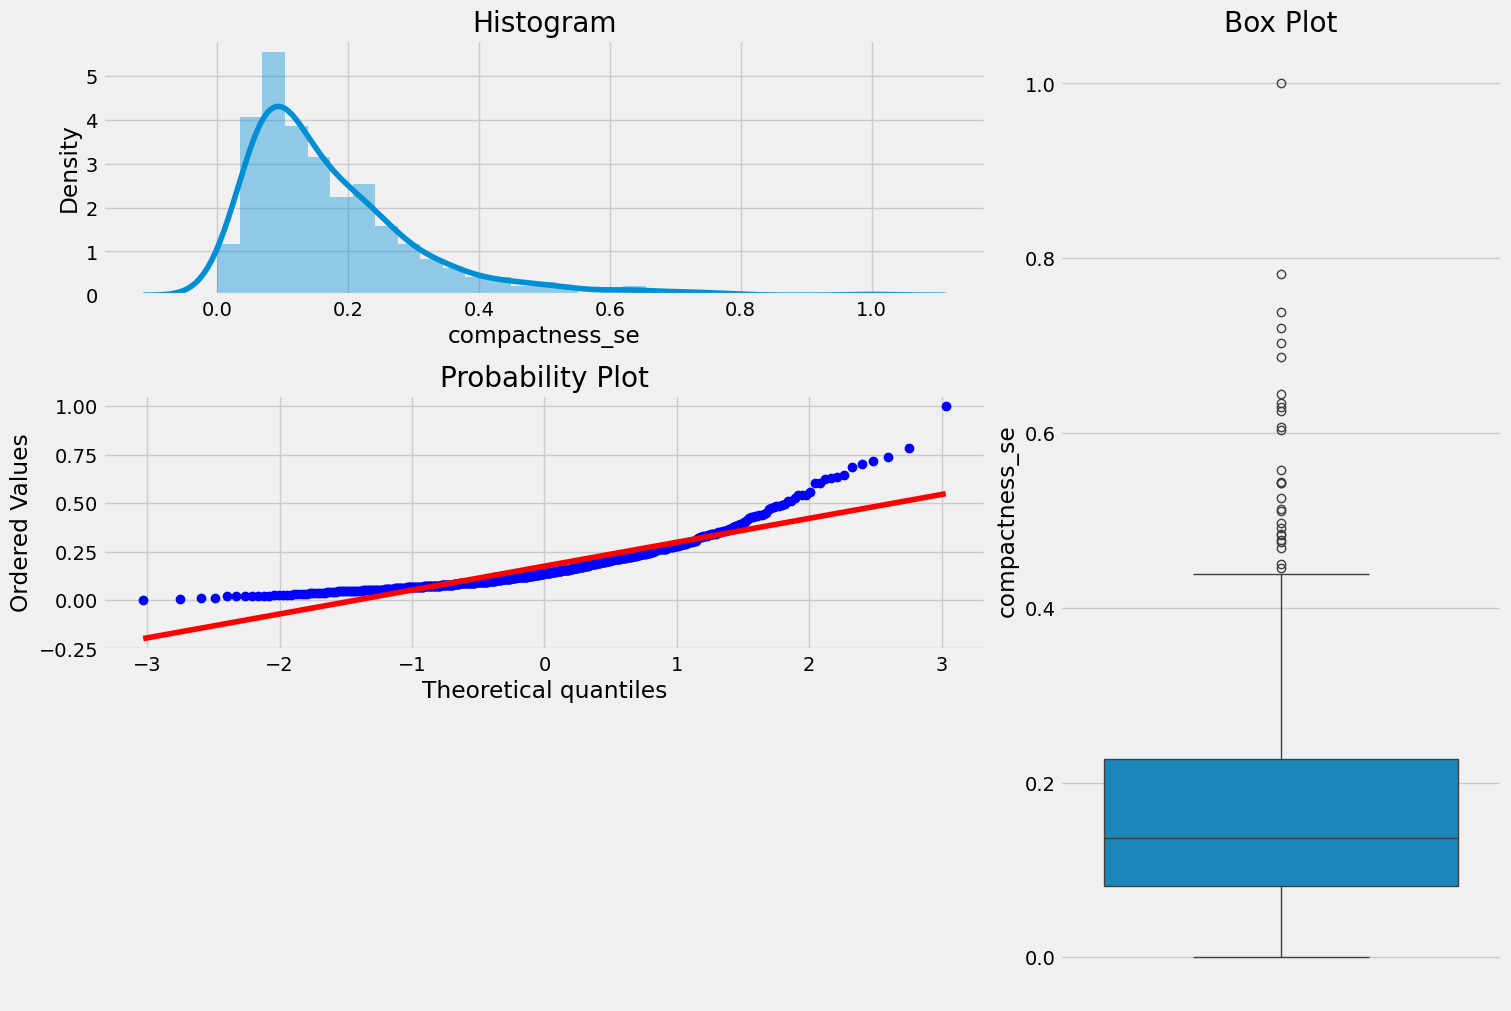

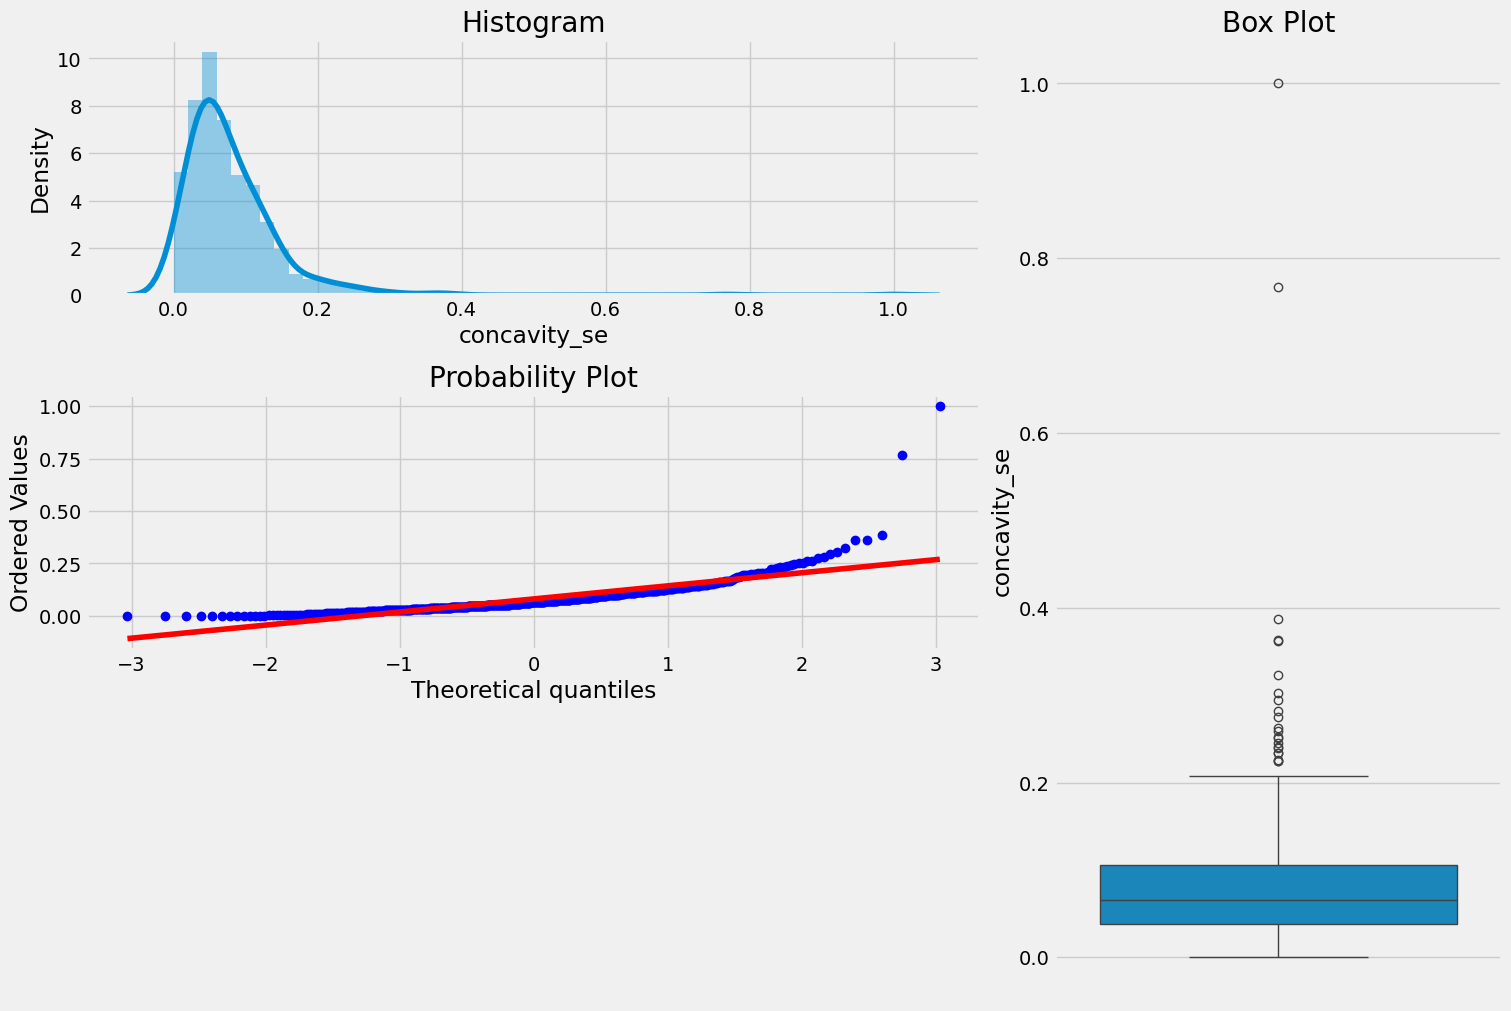

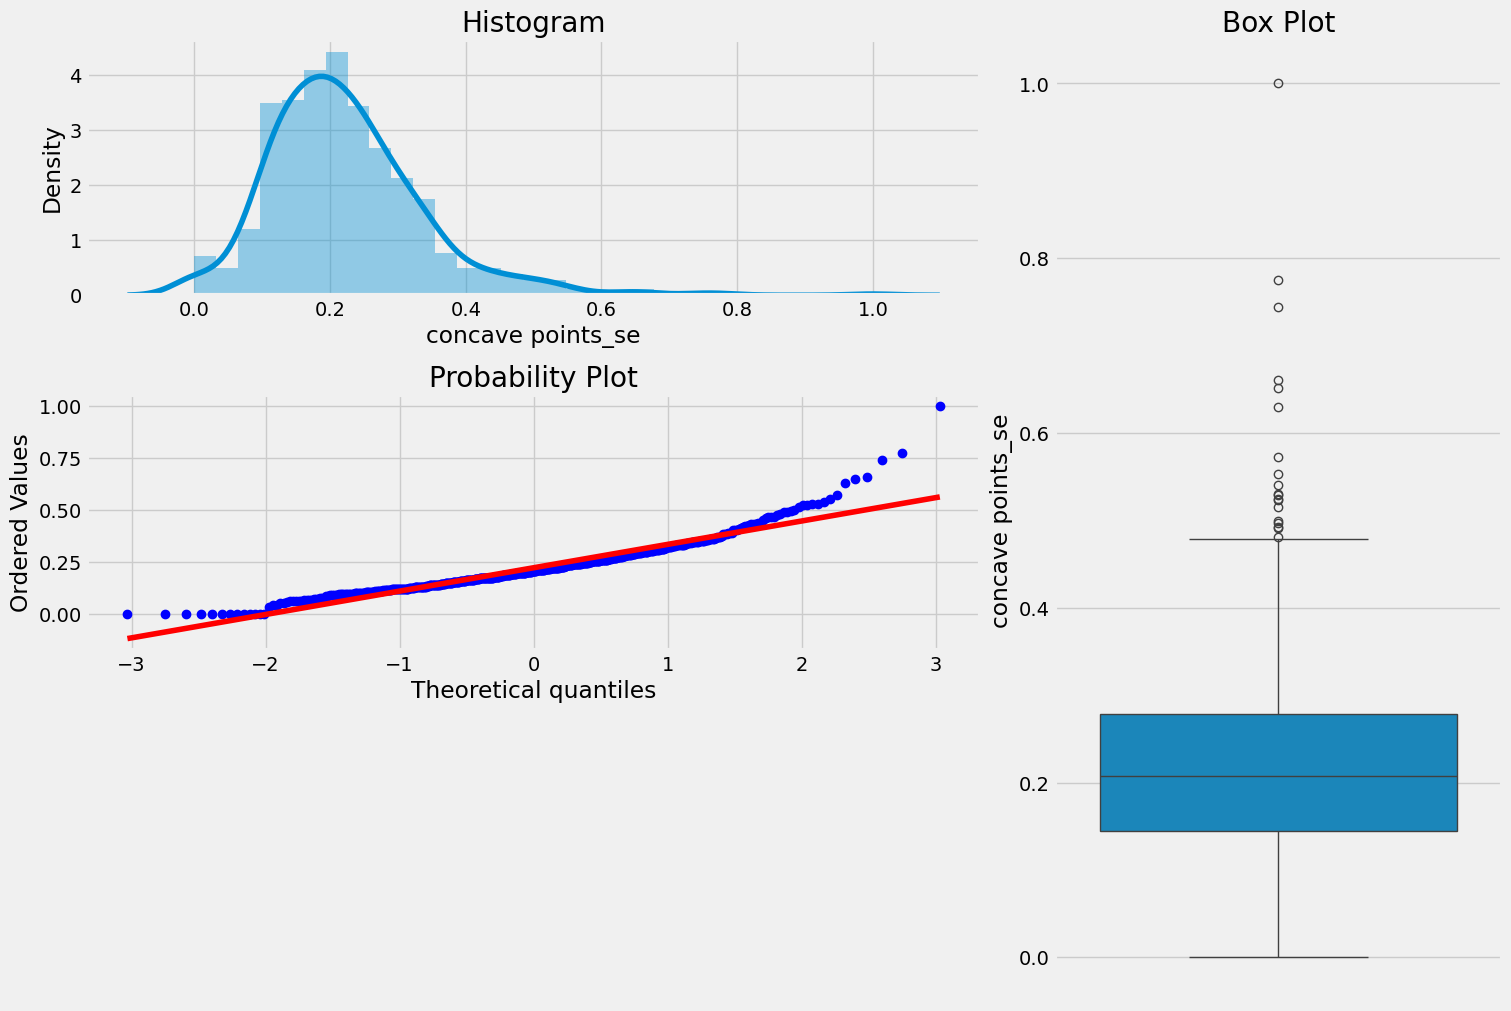

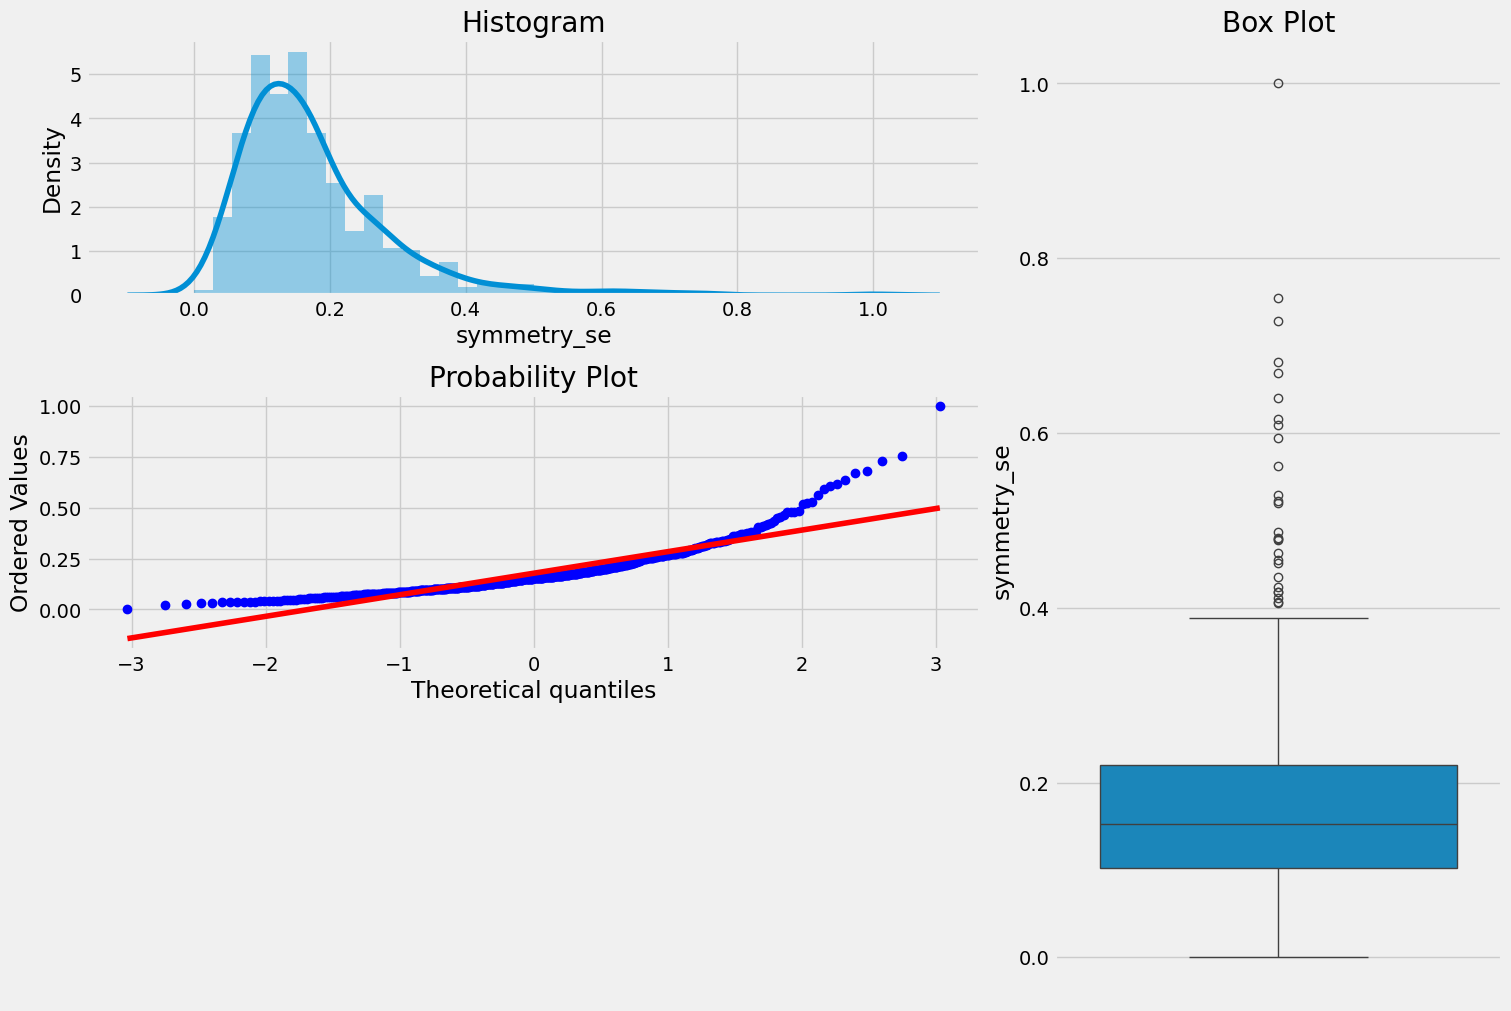

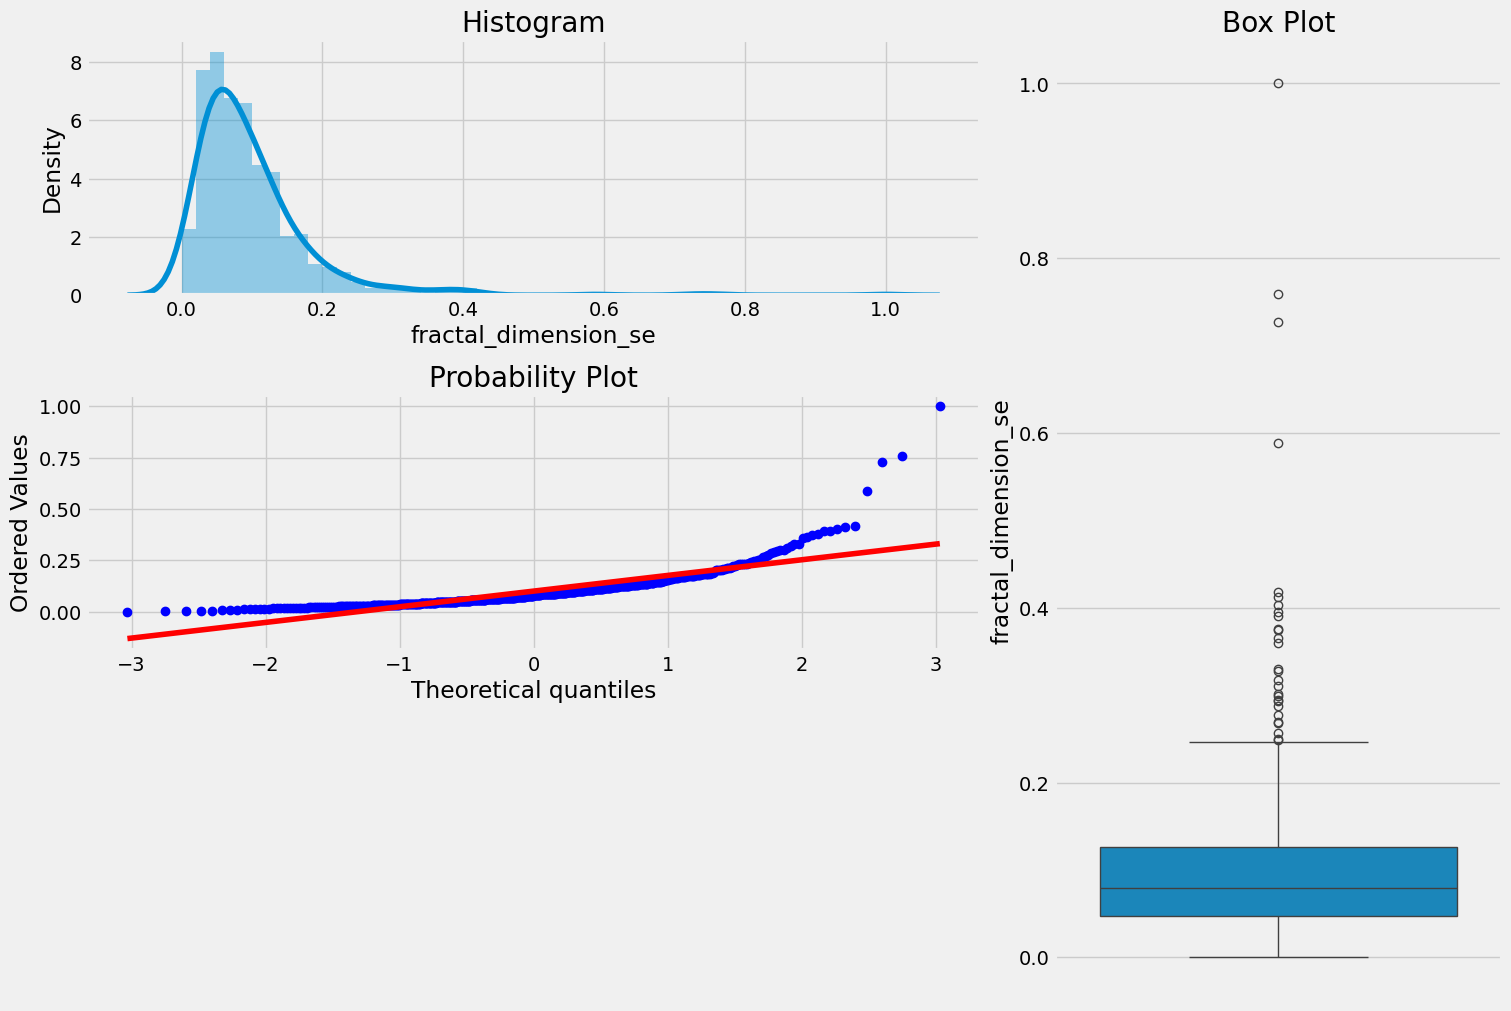

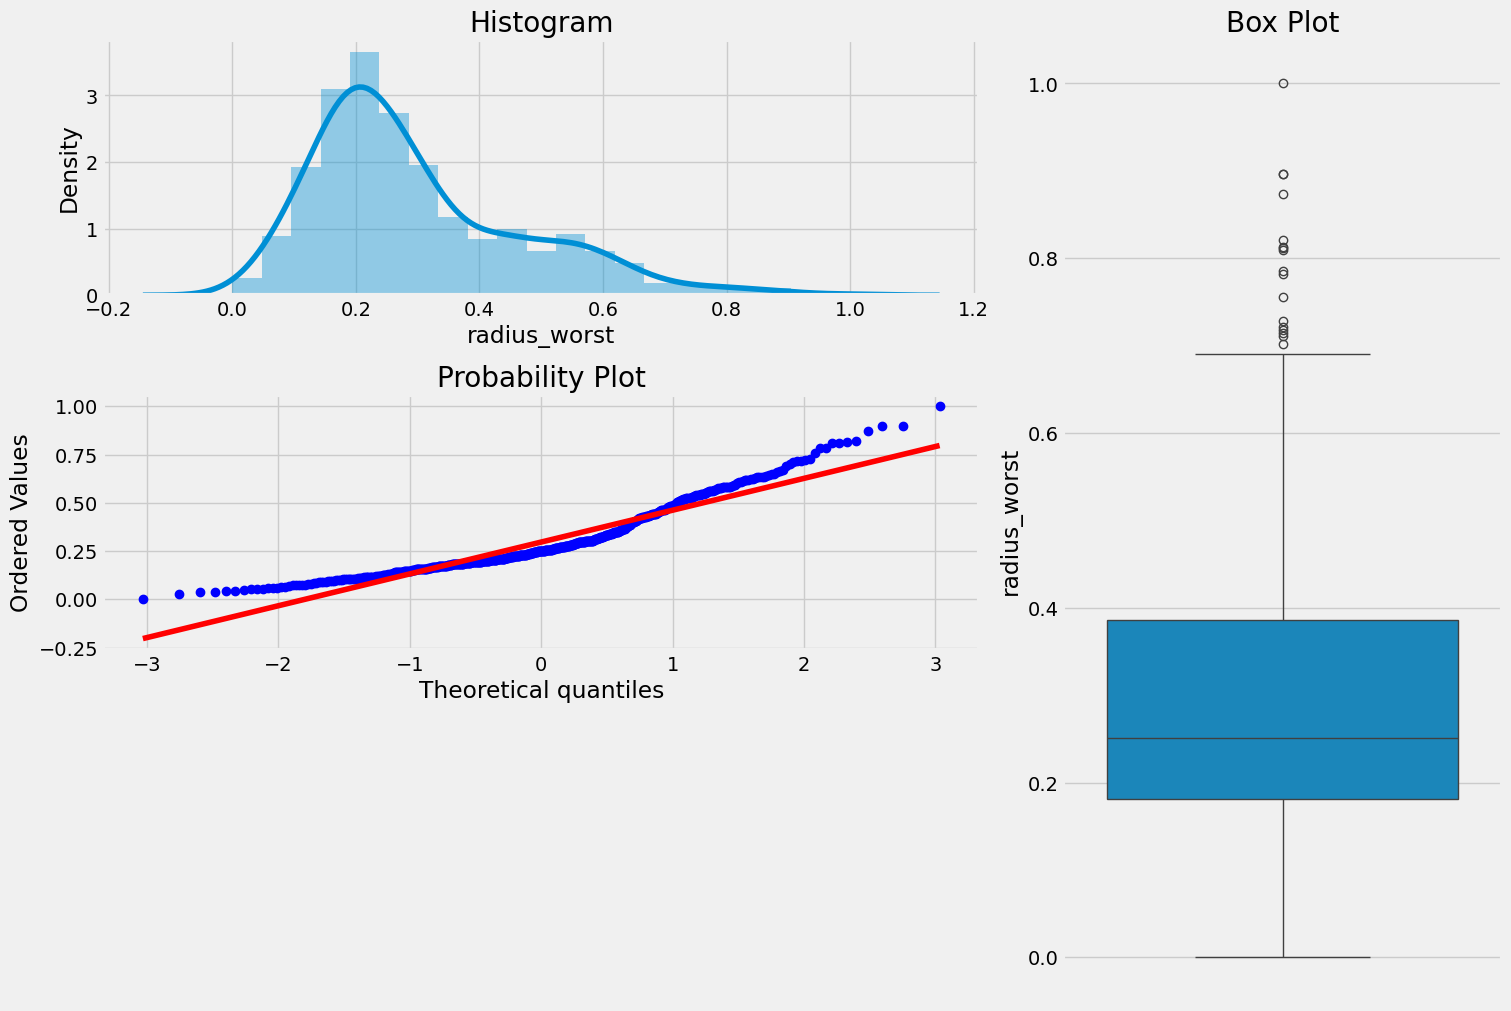

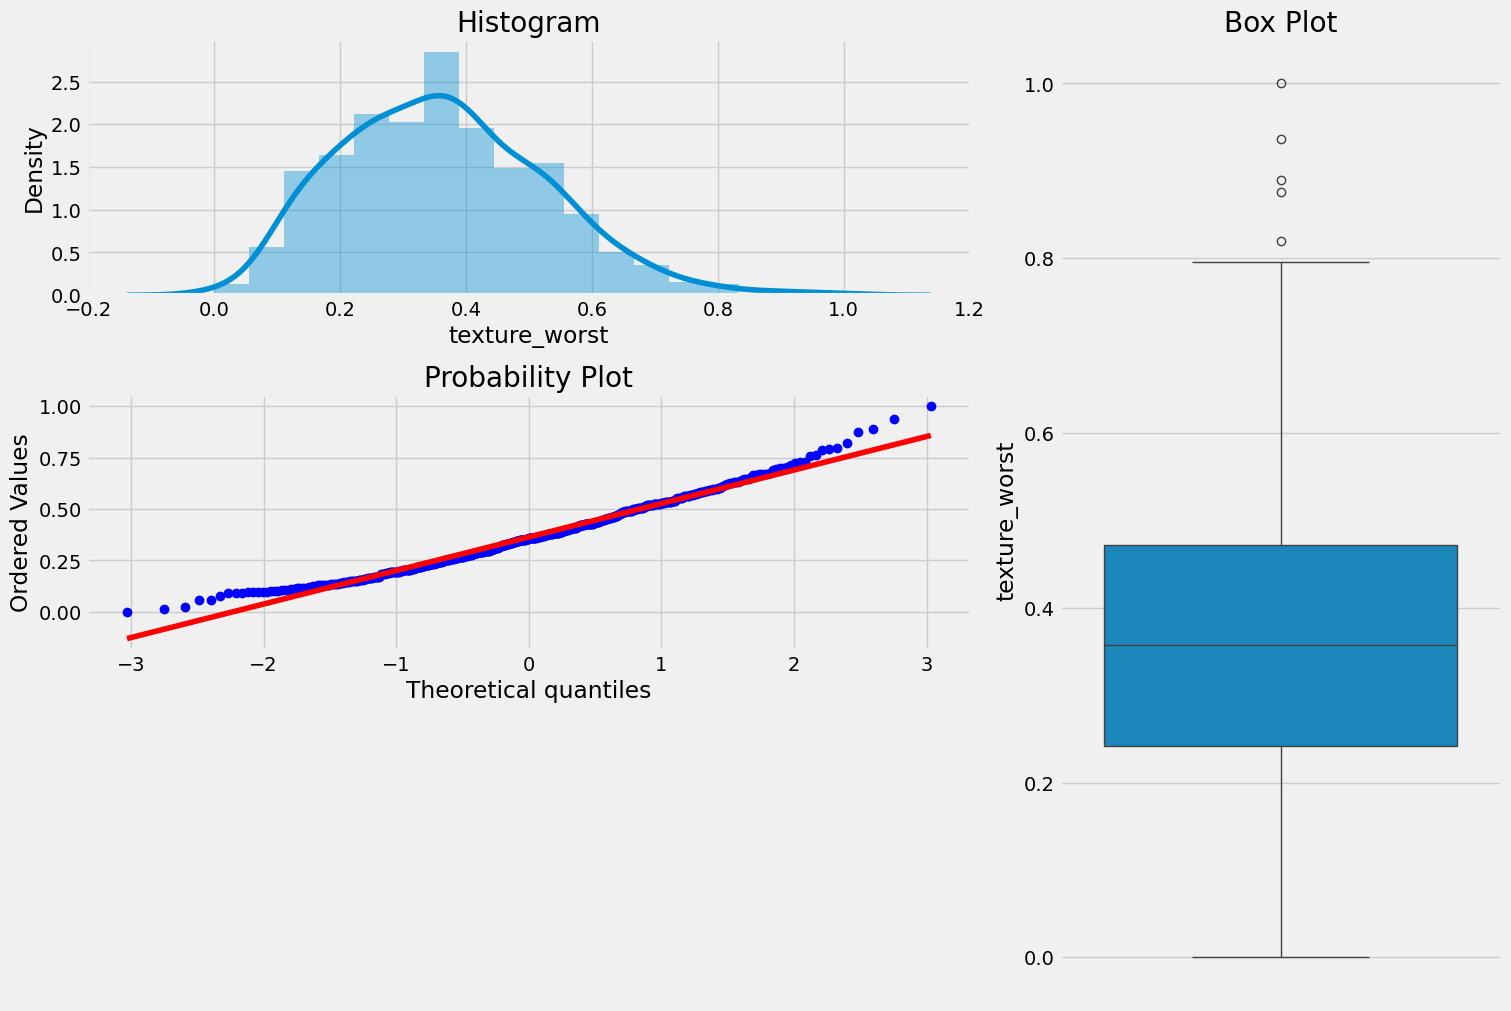

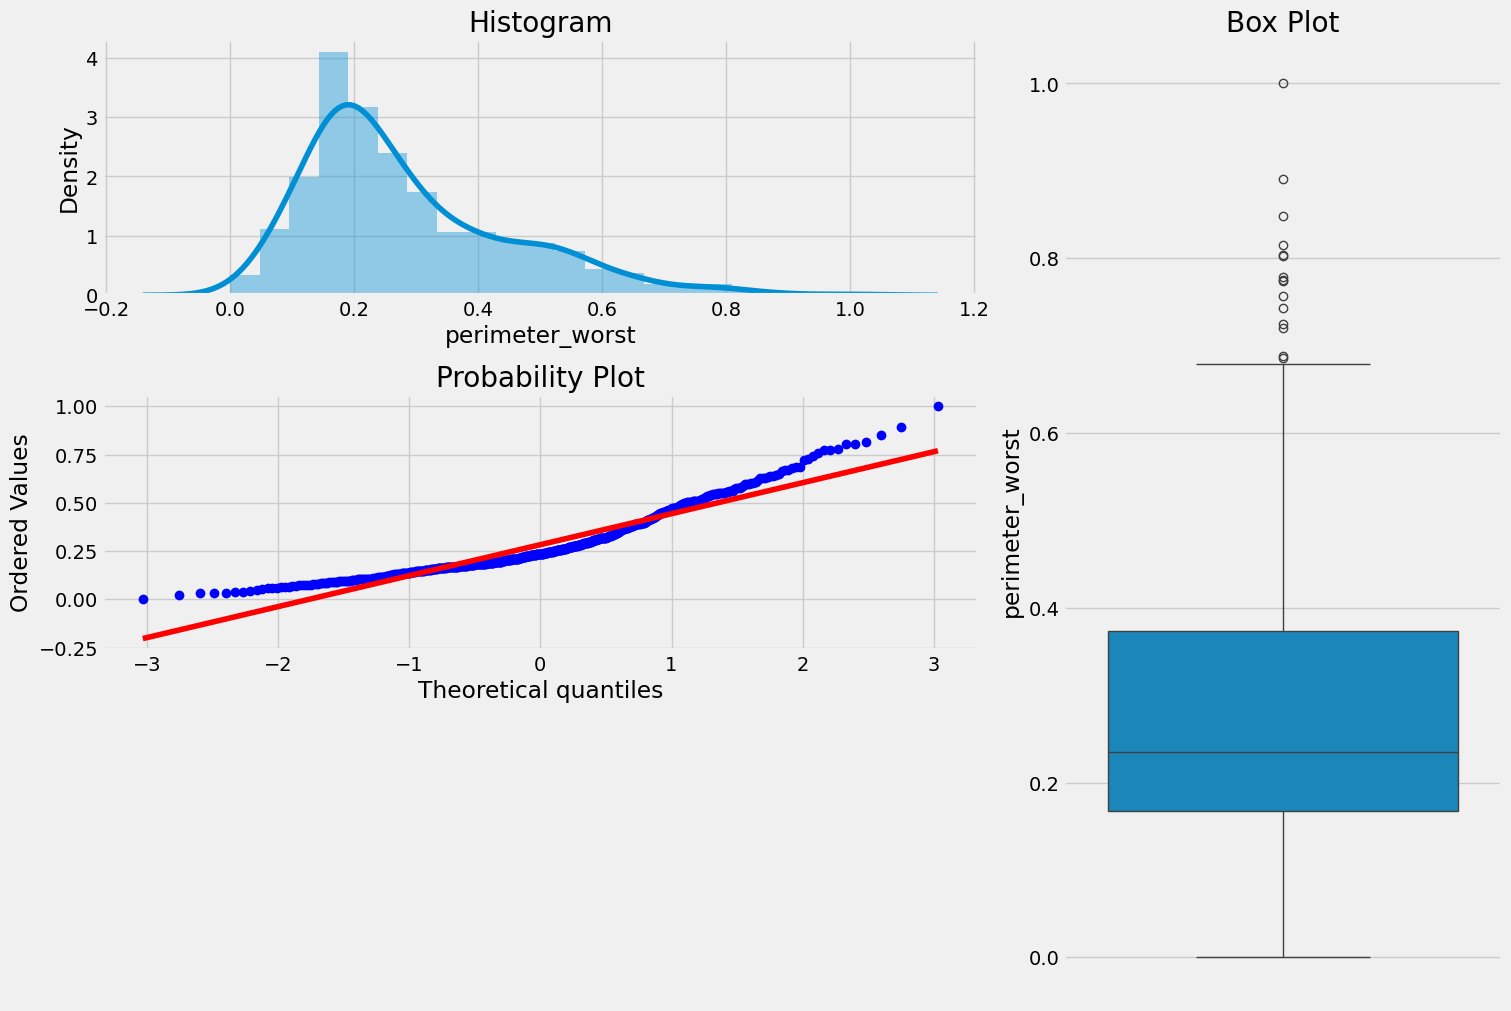

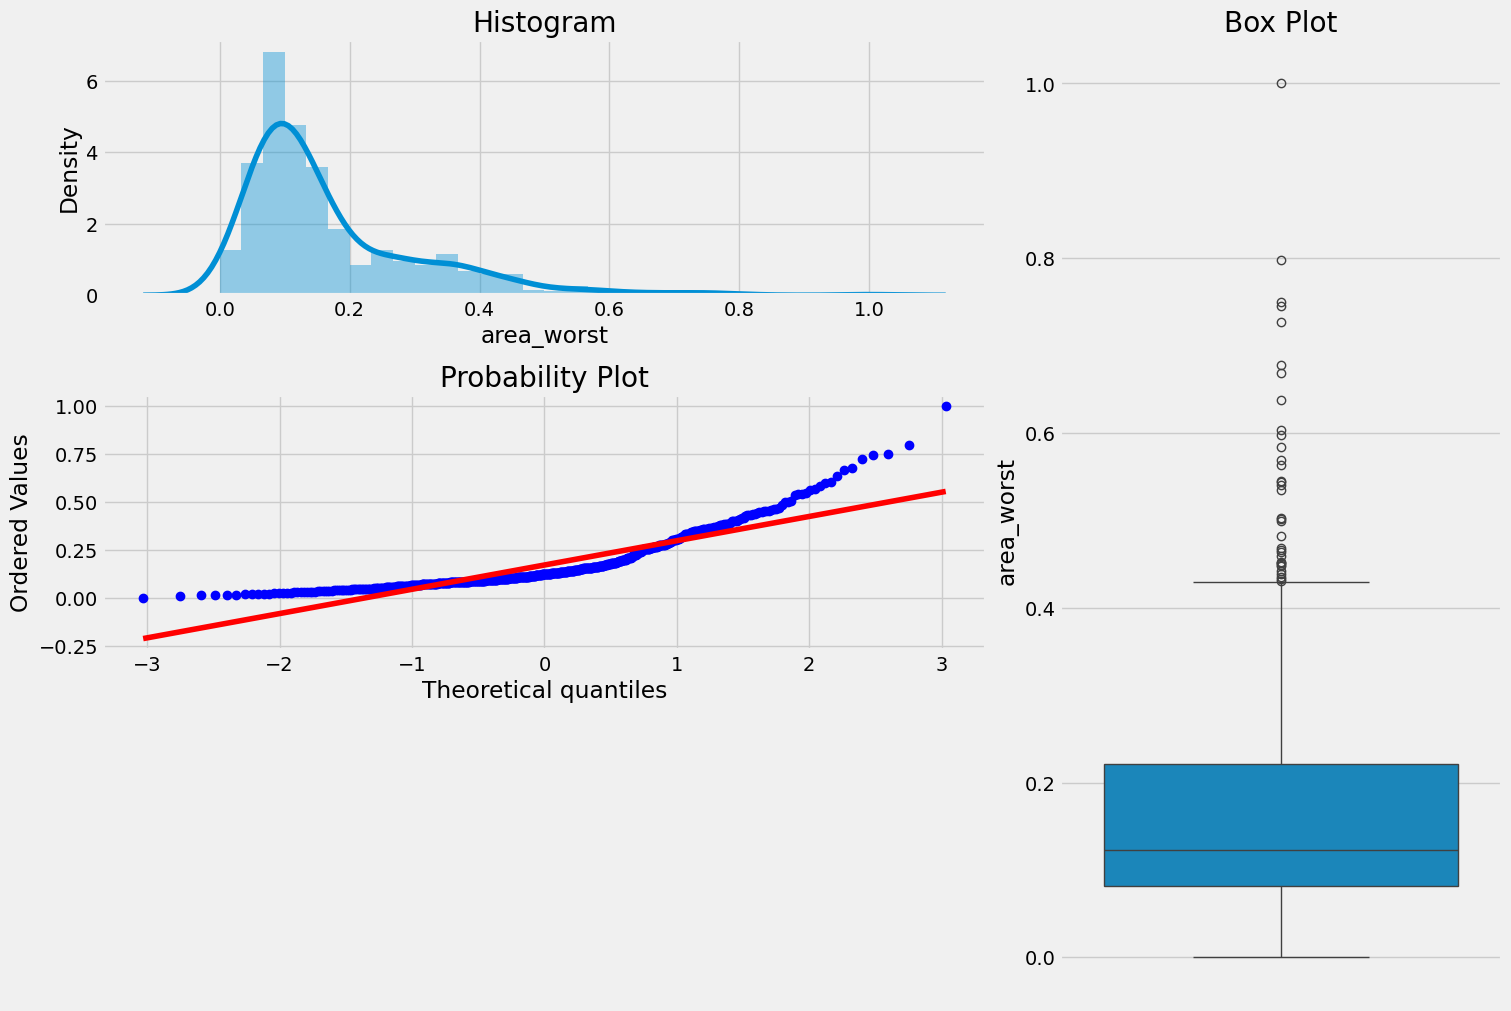

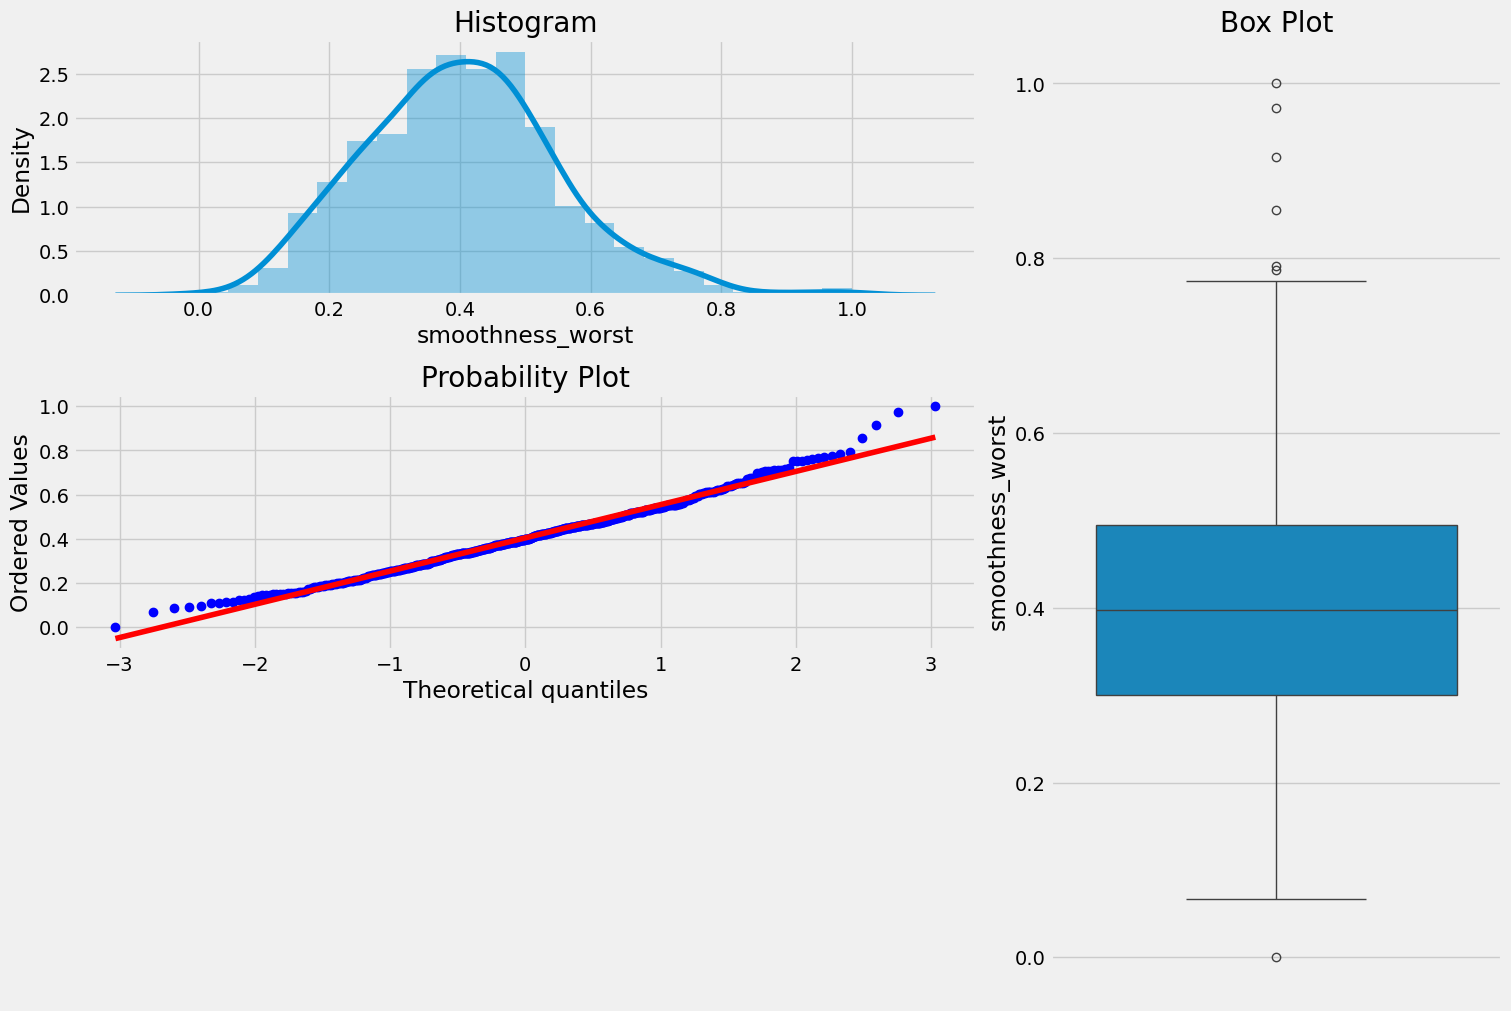

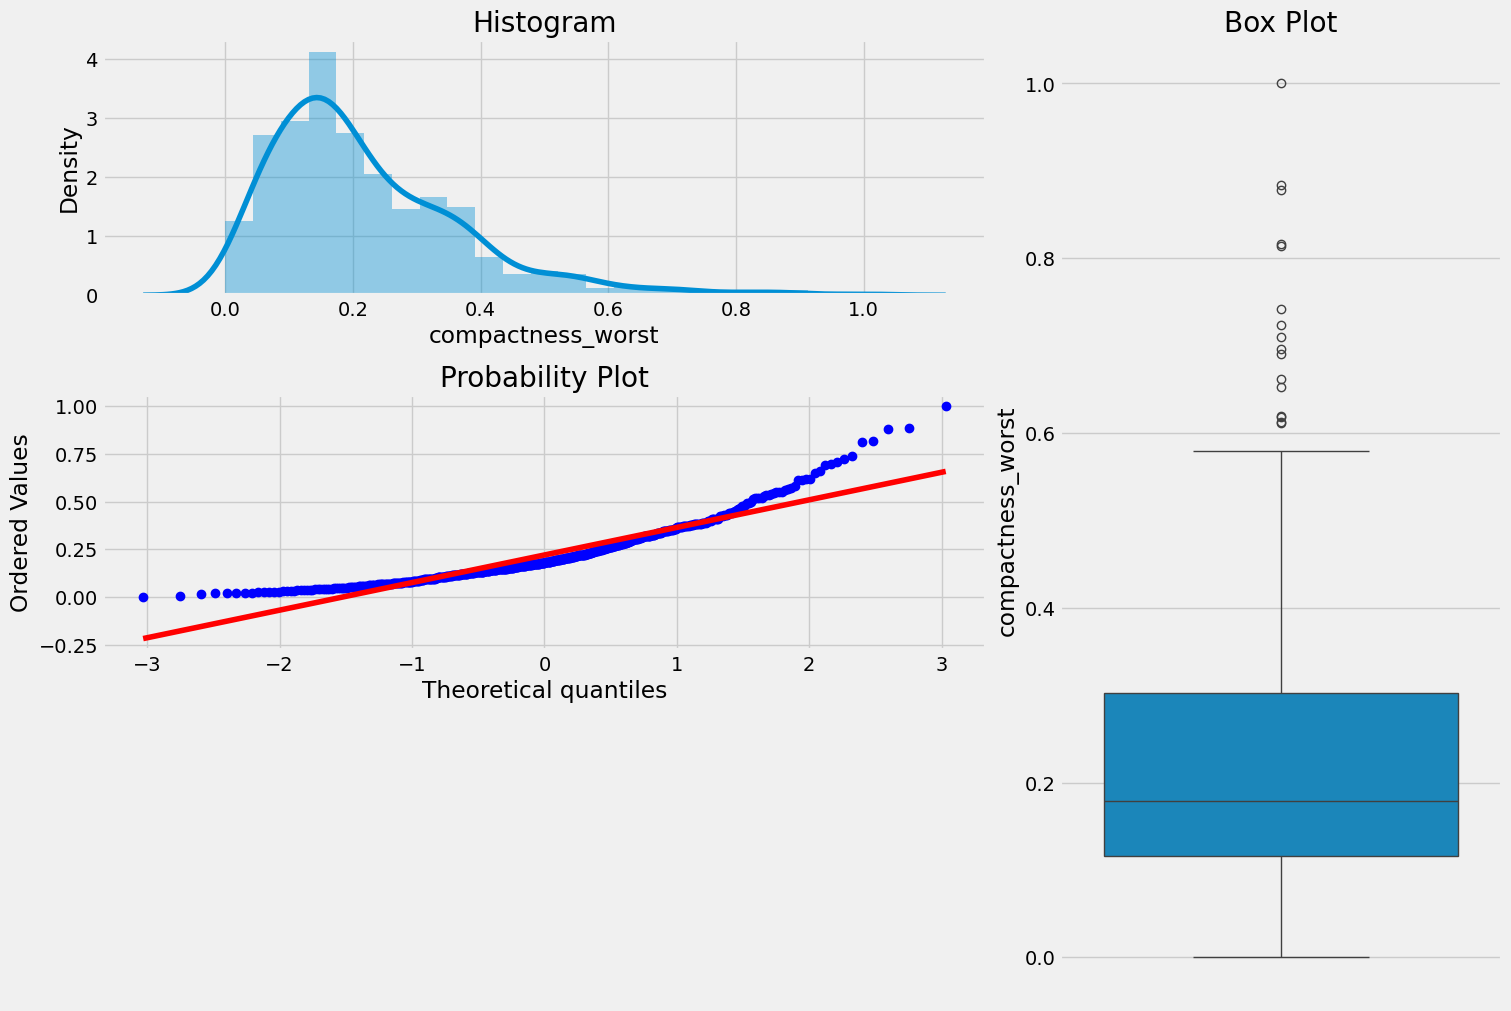

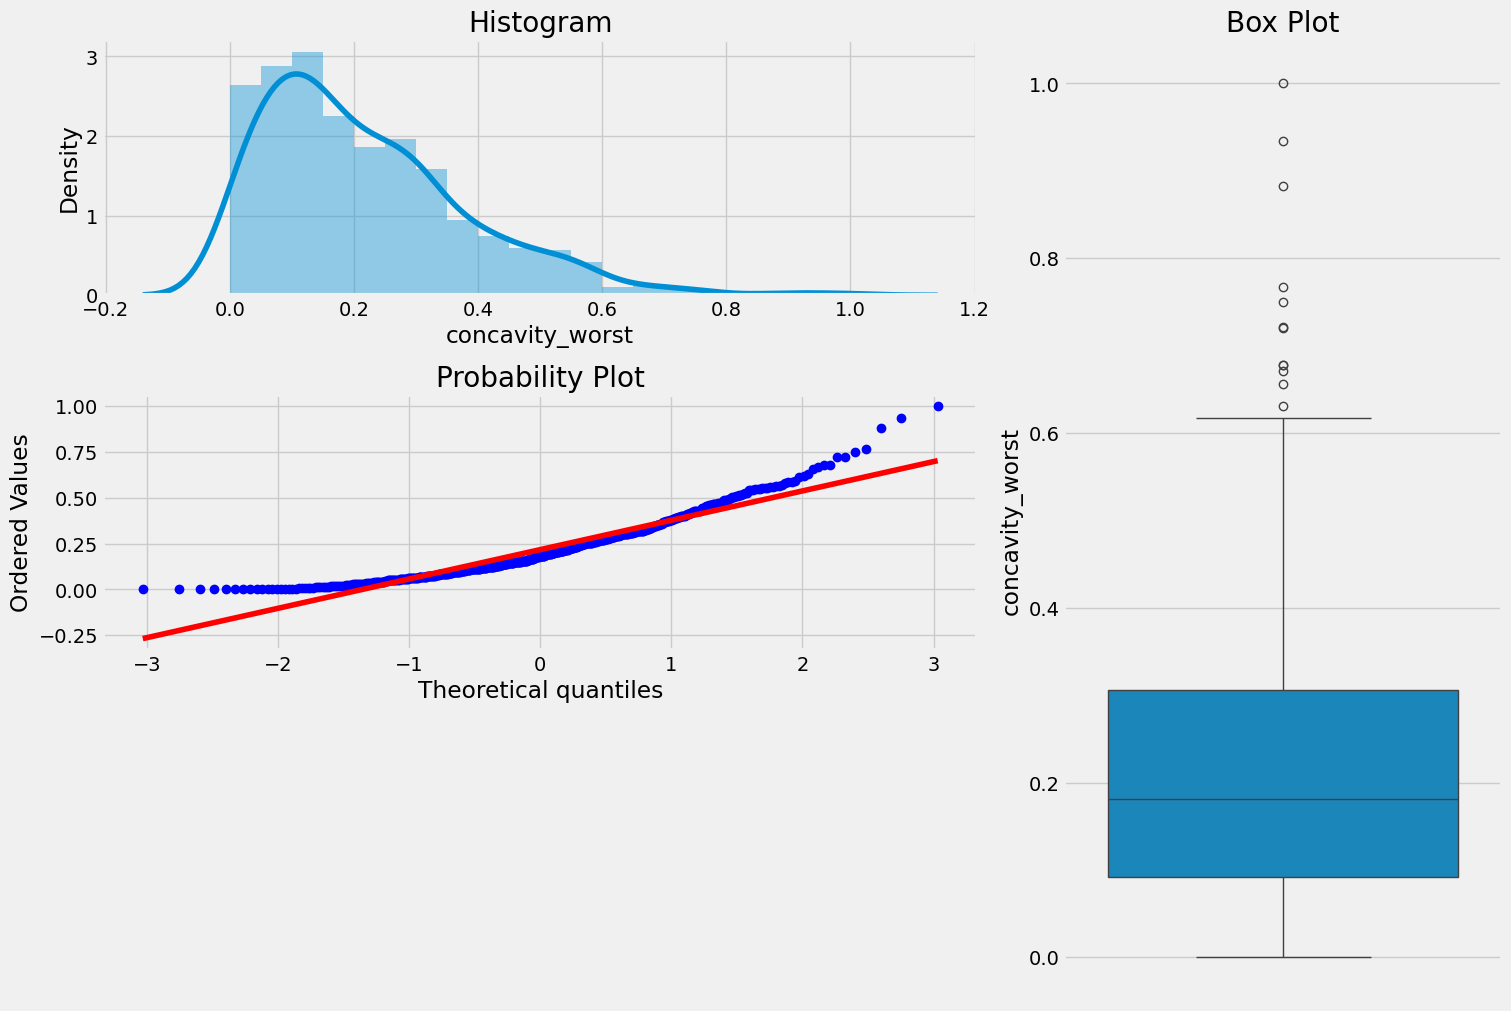

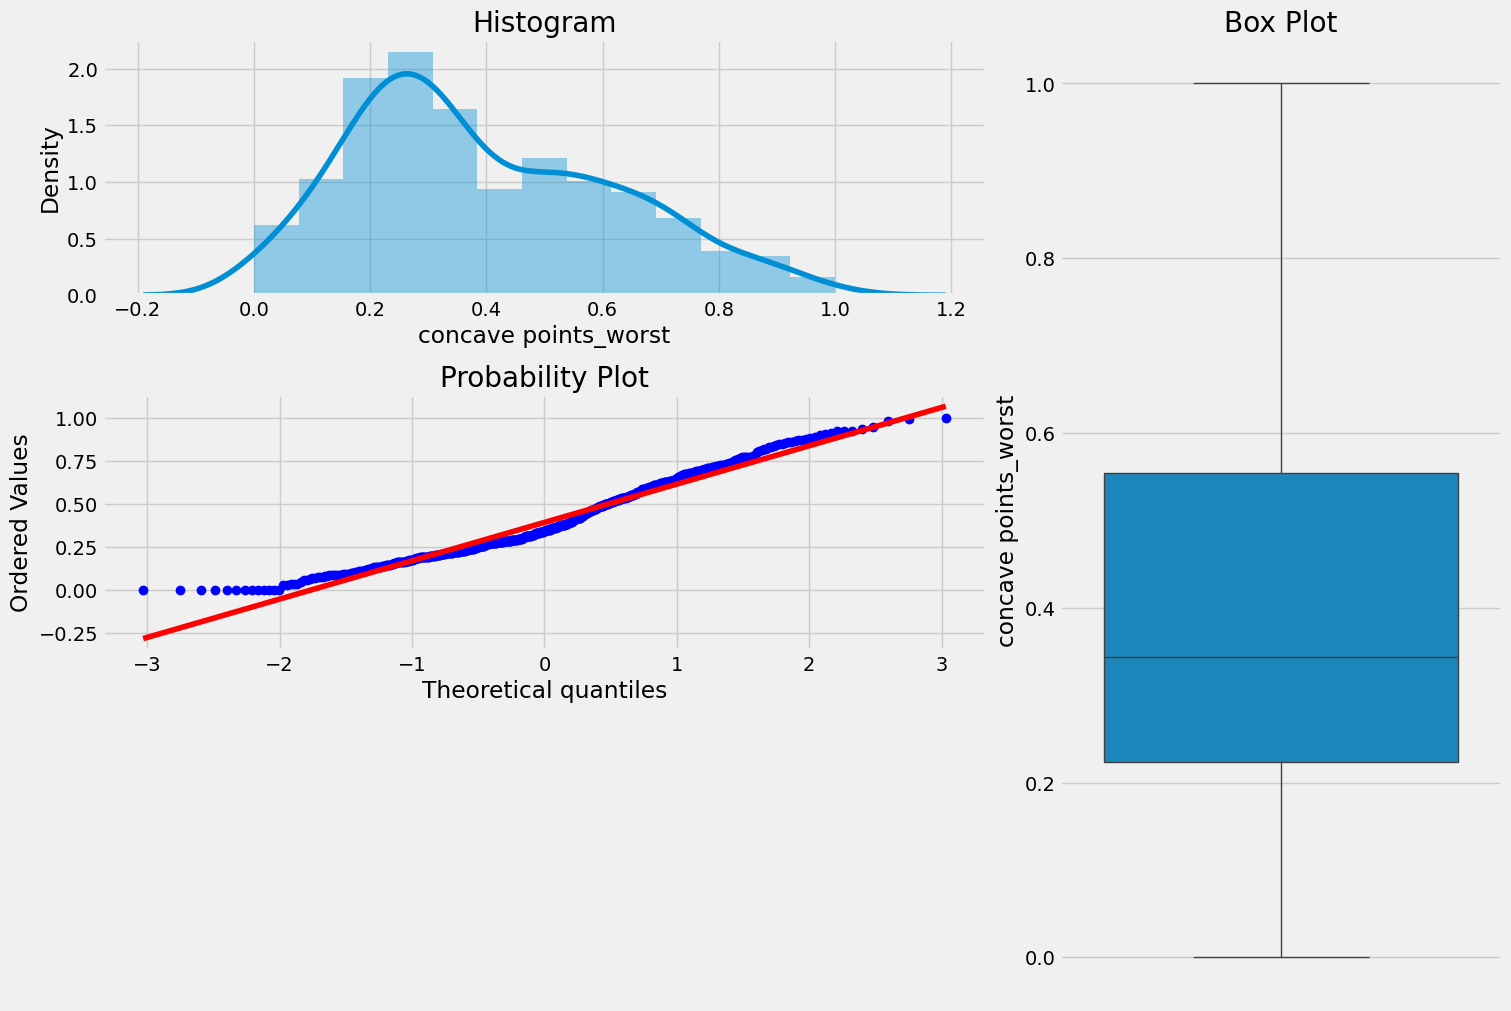

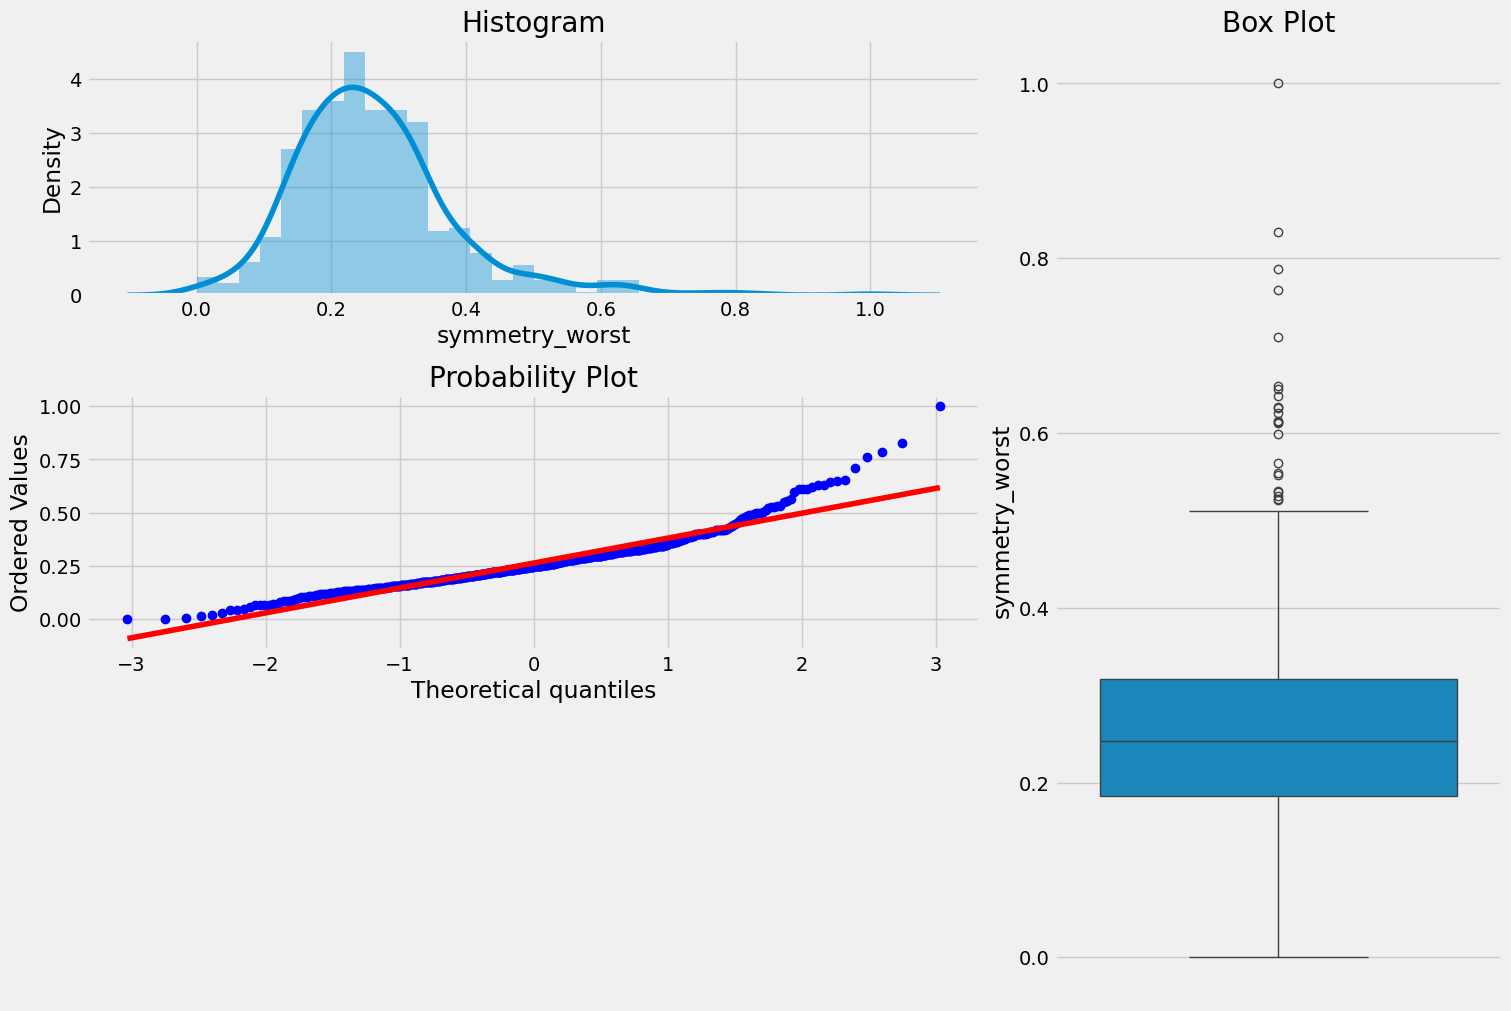

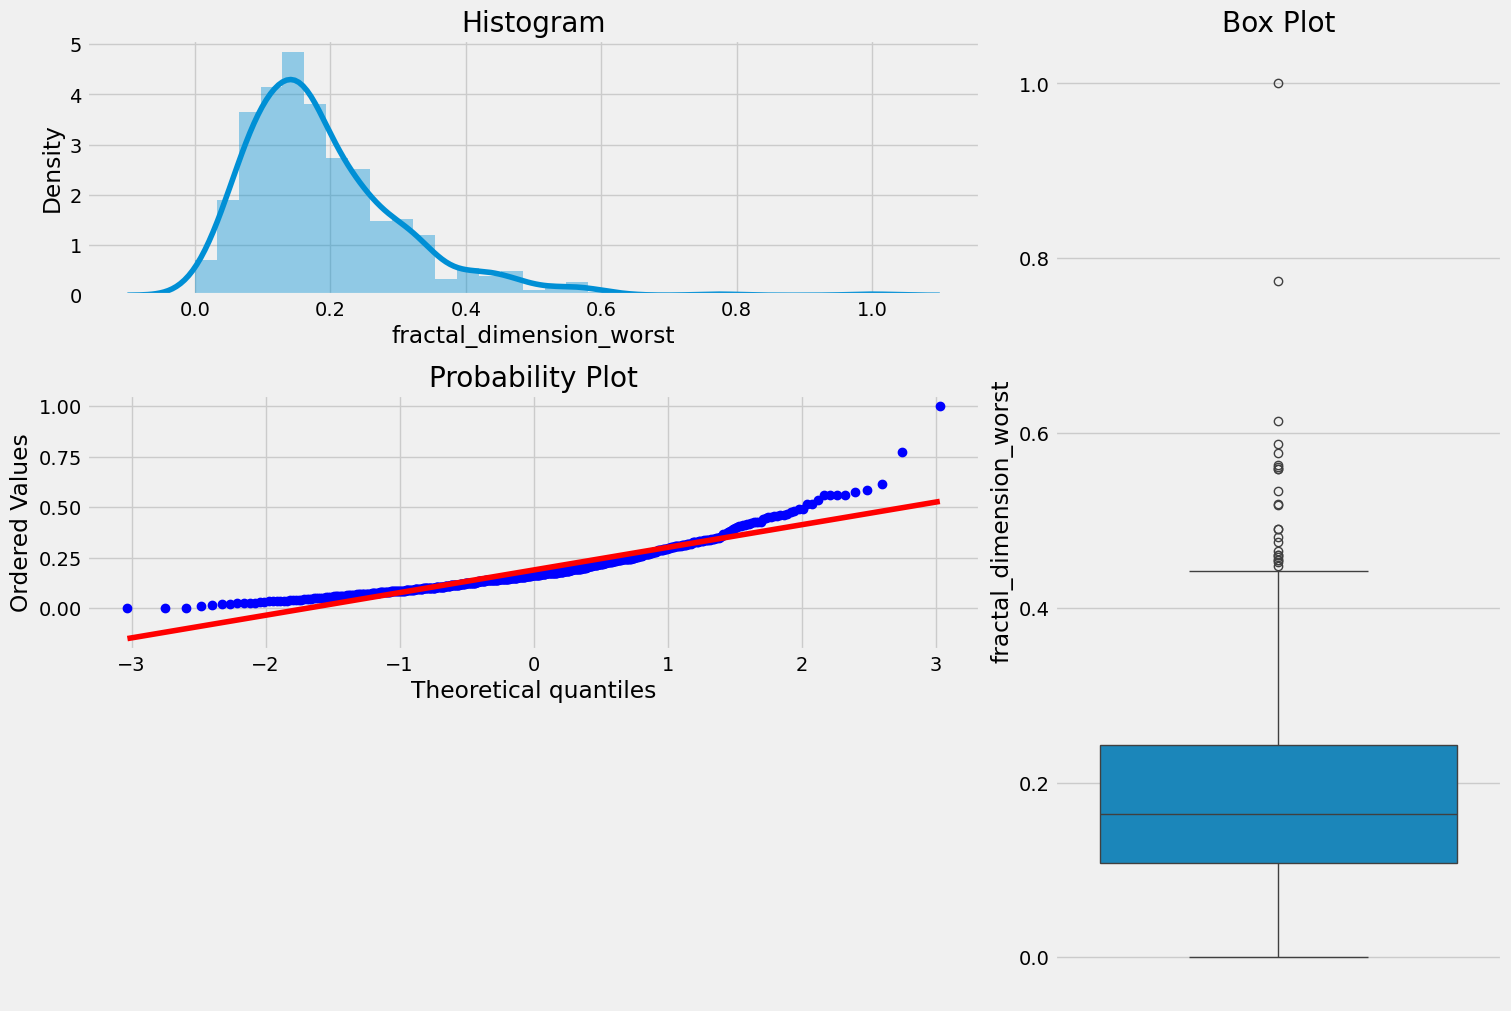

In [32]:
for i in dataset.columns[0:31]:
    plotting_3_chart(dataset,i)

# <font color=blue>Data splitting  </font> 

In [33]:
X_train, X_test, y_transformed, y_transformed1 = train_test_split(X_resampled,y_resampled, test_size=0.3, random_state=0)

## <font color=blue> Feature Selection </font> 

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import train_test_split

# Split your data (assuming you haven't split it yet)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the logistic regression model
clf = LogisticRegression(solver='liblinear', max_iter=1000)

# Apply forward feature selection
selector = SequentialFeatureSelector(clf, n_features_to_select=20, direction='forward', cv=5)
selector.fit(X_train, y_train)

# Get the selected feature names
selected_features = X_train.columns[selector.get_support()]

print("Selected features:", selected_features)


Selected features: Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'concavity_mean', 'symmetry_mean', 'radius_se',
       'area_se', 'compactness_se', 'concavity_se', 'concave points_se',
       'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'area_worst', 'smoothness_worst', 'concave points_worst',
       'fractal_dimension_worst'],
      dtype='object')


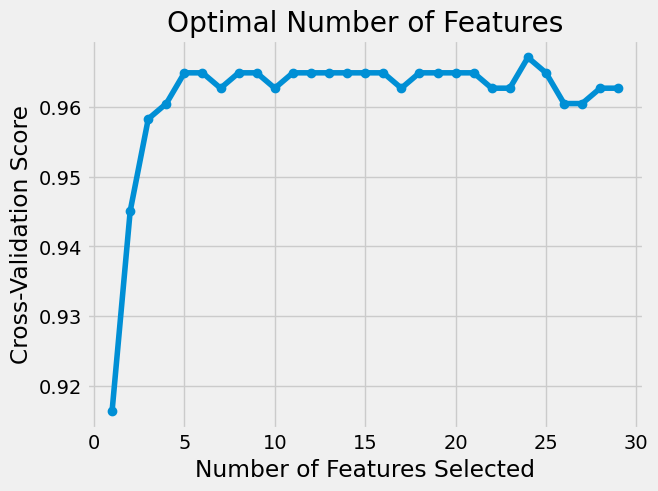

Optimal number of features: 24


In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Instantiate the logistic regression model
clf = LogisticRegression(solver='liblinear', max_iter=1000)

# Track performance for each number of features
scores = []
feature_counts = list(range(1, X_train.shape[1] ))

# Loop through each possible number of features
for k in feature_counts:
    selector = SequentialFeatureSelector(clf, n_features_to_select=k, direction='forward', cv=5)
    selector.fit(X_train, y_train)
    # Evaluate model performance with cross-validation
    score = cross_val_score(clf, selector.transform(X_train), y_train, cv=5).mean()
    scores.append(score)

# Plot the results
plt.plot(feature_counts, scores, marker='o')
plt.xlabel('Number of Features Selected')
plt.ylabel('Cross-Validation Score')
plt.title('Optimal Number of Features')
plt.show()

# Find the optimal number of features
optimal_num_features = feature_counts[scores.index(max(scores))]
print("Optimal number of features:", optimal_num_features)


In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# Instantiate the random forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
rf.fit(X_train, y_train)

# Use feature importances from the random forest to select features
selector = SelectFromModel(rf, threshold="mean", prefit=True)  # Use mean importance as threshold
selected_features = X_train.columns[selector.get_support()]

print("Selected features:", selected_features)


Selected features: Index(['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean',
       'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst',
       'concave points_worst'],
      dtype='object')


In [41]:
import numpy as np
from sklearn.model_selection import cross_val_score

# Test different thresholds
thresholds = np.linspace(0, rf.feature_importances_.max(), 10)
scores = []

for thresh in thresholds:
    selector = SelectFromModel(rf, threshold=thresh, prefit=True)
    X_selected = selector.transform(X_train)
    
    # Evaluate model performance with selected features
    score = cross_val_score(rf, X_selected, y_train, cv=5).mean()
    scores.append((thresh, score))

# Find the threshold with the best performance
best_threshold, best_score = max(scores, key=lambda x: x[1])
print("Optimal threshold:", best_threshold)
print("Best cross-validation score:", best_score)

# Select features with the optimal threshold
selector = SelectFromModel(rf, threshold=best_threshold, prefit=True)
optimal_features = X_train.columns[selector.get_support()]

print("Optimal features:", optimal_features)


Optimal threshold: 0.017099151625783772
Best cross-validation score: 0.9604395604395604
Optimal features: Index(['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean',
       'concave points_mean', 'radius_se', 'area_se', 'radius_worst',
       'texture_worst', 'perimeter_worst', 'area_worst', 'compactness_worst',
       'concavity_worst', 'concave points_worst'],
      dtype='object')


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

# Apply Logistic Regression with L1 regularization
clf_lasso = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)
clf_lasso.fit(X_train, y_transformed)

# Select important features using Lasso
selector = SelectFromModel(clf_lasso, prefit=True)
selected_features = X_train.columns[selector.get_support()]

print("Selected features:", selected_features)



## <font color=blue>Correlation Matrix </font> 

In [ ]:

X_train, X_test, y_transformed, y_transformed1 = train_test_split(X_resampled,y_resampled, test_size=0.3, random_state=0)

In [ ]:
# Transform X_train and X_test to only keep the selected features
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# If you want to convert them back to a DataFrame for easier handling
X_train_selected = pd.DataFrame(X_train_selected, columns=selected_features)
X_test_selected = pd.DataFrame(X_test_selected, columns=selected_features)

# Split the data into training and testing sets (if not already done)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=0)

In [ ]:
# Transform X_resampled to only keep the selected features
X_selected = selector.transform(X_resampled)

# Convert it back to a DataFrame for easier handling
X_selected = pd.DataFrame(X_selected, columns=selected_features)

# Split the selected feature set into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_resampled, test_size=0.3, random_state=0)

In [ ]:
correlation_matrix = X_selected.corr()

# Create a heatmap
plt.figure(figsize=(6 ,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Feature Correlation Heatmap')
plt.show()

# <font color=blue>Modeling  </font> 